In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
!pip install catboost
!pip install pytorch-tabnet

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import make_scorer
import catboost
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ASAC_4기_기업프로젝트_SK하이닉스/1. 데이터 전처리/5. 최종 데이터셋(2024.00.00 기준)/df_final_(1).csv')


In [ ]:
def mm_adj_rmse(y_true, y_pred):
    abs_errors = (y_pred - y_true)**2
    inv_y_true = 1 - y_true / max(y_true)
    # 가중치를 별도로 정의하고 가중 평균을 계산
    return np.sqrt(np.average(abs_errors, weights=inv_y_true))
def mm_adj_rmse2(y_true, y_pred):
    abs_errors = (y_pred - y_true)**2
    inv_y_true = y_true / max(y_true)
    # 가중치를 별도로 정의하고 가중 평균을 계산
    return np.sqrt(np.average(abs_errors, weights=inv_y_true))
        # sensor_agg_col = ['max_val_1','max_val_2','max_val_3','max_val_4','max_val_5','max_val_6','max_val_7','max_val_8','max_val_9','max_val_10','max_val_11','max_val_12','max_val_13','max_val_14','max_val_15','max_val_16','max_val_17','max_val_18','max_val_19','mean_val_1','mean_val_2','mean_val_3','mean_val_4','mean_val_5','mean_val_6','mean_val_7','mean_val_8','mean_val_9','mean_val_10','mean_val_11','mean_val_12','mean_val_13','mean_val_14','mean_val_15','mean_val_16','mean_val_17','mean_val_18','mean_val_19','median_val_1','median_val_2','median_val_3','median_val_4','median_val_5','median_val_6','median_val_7','median_val_8','median_val_9','median_val_10','median_val_11','median_val_12','median_val_13','median_val_14','median_val_15','median_val_16','median_val_17','median_val_18','median_val_19','min_val_1','min_val_2','min_val_3','min_val_4','min_val_5','min_val_6','min_val_7','min_val_8','min_val_9','min_val_10','min_val_11','min_val_12','min_val_13','min_val_14','min_val_15','min_val_16','min_val_17','min_val_18','min_val_19','range_val_1','range_val_2','range_val_3','range_val_4','range_val_5','range_val_6','range_val_7','range_val_8','range_val_9','range_val_10','range_val_11','range_val_12','range_val_13','range_val_14','range_val_15','range_val_16','range_val_17','range_val_18','range_val_19','stddev_val_1','stddev_val_2','stddev_val_3','stddev_val_4','stddev_val_5','stddev_val_6','stddev_val_7','stddev_val_8','stddev_val_9','stddev_val_10','stddev_val_11','stddev_val_12','stddev_val_13','stddev_val_14','stddev_val_15','stddev_val_16','stddev_val_17','stddev_val_18','stddev_val_19','max_val_pca','min_val_pca','stddev_val_pca','mean_val_pca','range_val_pca','median_val_pca']
    # step_oht_col = ['STEP_2','STEP_8','STEP_9','STEP_11','STEP_17','STEP_19','STEP_20','STEP_21','STEP_24','STEP_25','STEP_26','STEP_27','STEP_28','STEP_34','STEP_36','STEP_38']
    # standard_col = ['max_val_1','max_val_2','max_val_3','max_val_4','max_val_5','max_val_6','max_val_7','max_val_8','max_val_9','max_val_10','max_val_11','max_val_12','max_val_13','max_val_14','max_val_15','max_val_16','max_val_17','max_val_18','max_val_19','mean_val_1','mean_val_2','mean_val_3','mean_val_4','mean_val_5','mean_val_6','mean_val_7','mean_val_8','mean_val_9','mean_val_10','mean_val_11','mean_val_12','mean_val_13','mean_val_14','mean_val_15','mean_val_16','mean_val_17','mean_val_18','mean_val_19','median_val_1','median_val_2','median_val_3','median_val_4','median_val_5','median_val_6','median_val_7','median_val_8','median_val_9','median_val_10','median_val_11','median_val_12','median_val_13','median_val_14','median_val_15','median_val_16','median_val_17','median_val_18','median_val_19','min_val_1','min_val_2','min_val_3','min_val_4','min_val_5','min_val_6','min_val_7','min_val_8','min_val_9','min_val_10','min_val_11','min_val_12','min_val_13','min_val_14','min_val_15','min_val_16','min_val_17','min_val_18','min_val_19','range_val_1','range_val_2','range_val_3','range_val_4','range_val_5','range_val_6','range_val_7','range_val_8','range_val_9','range_val_10','range_val_11','range_val_12','range_val_13','range_val_14','range_val_15','range_val_16','range_val_17','range_val_18','range_val_19','stddev_val_1','stddev_val_2','stddev_val_3','stddev_val_4','stddev_val_5','stddev_val_6','stddev_val_7','stddev_val_8','stddev_val_9','stddev_val_10','stddev_val_11','stddev_val_12','stddev_val_13','stddev_val_14','stddev_val_15','stddev_val_16','stddev_val_17','stddev_val_18','stddev_val_19','max_val_pca','min_val_pca','stddev_val_pca','mean_val_pca','range_val_pca','median_val_pca','rep_hours','step_hours','sequence','last_hours']
    # drop_col = ['STEP_NM','TA_tm_before','start_dt_tm']

In [ ]:
def xy_split(df):
    global standard_li,drop_col,step_li
    sensor_agg_col = ['max_val_1','max_val_3','max_val_6','max_val_7','max_val_9','max_val_17','max_val_18','mean_val_1','mean_val_5','mean_val_6','mean_val_7','mean_val_8','mean_val_9','mean_val_17','mean_val_18','median_val_1','median_val_3','median_val_6','median_val_7','median_val_9','median_val_17','median_val_18','min_val_1','min_val_5','min_val_6','min_val_7','min_val_8','min_val_9','min_val_11','min_val_12','min_val_17','min_val_18','stddev_val_1','stddev_val_10','stddev_val_17','stddev_val_18']
    step_oht_col = ['STEP_2','STEP_8','STEP_9','STEP_11','STEP_17','STEP_19','STEP_20','STEP_21','STEP_24','STEP_25','STEP_26','STEP_27','STEP_28','STEP_34','STEP_36','STEP_38']
    standard_col = ['max_val_1','max_val_3','max_val_6','max_val_7','max_val_9','max_val_17','max_val_18','mean_val_1','mean_val_5','mean_val_6','mean_val_7','mean_val_8','mean_val_9','mean_val_17','mean_val_18','median_val_1','median_val_3','median_val_6','median_val_7','median_val_9','median_val_17','median_val_18','min_val_1','min_val_5','min_val_6','min_val_7','min_val_8','min_val_9','min_val_11','min_val_12','min_val_17','min_val_18','stddev_val_1','stddev_val_10','stddev_val_17','stddev_val_18','rep_hours','step_hours','sequence','last_hours']
    drop_col = ['STEP_NM','TA_tm_before','start_dt_tm']

    target = ['diff_hours']

    standard_li,step_li,target_li = [],[],[]
    for i in df.columns:
        if i in standard_col:
            standard_li.append(i)
        elif i in step_oht_col:
            step_li.append(i)
        elif i in target:
            target_li.append(i)
    new_li = drop_col+step_li+standard_li+target_li
    df = df[new_li]

    print(new_li)
    y = df[target]
    X = df.drop(columns=target)
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    return X,y

In [ ]:
X,y = xy_split(df)
X['TA_tm_before'].unique()[:5]

['STEP_NM', 'TA_tm_before', 'start_dt_tm', 'max_val_6', 'max_val_7', 'max_val_9', 'max_val_17', 'max_val_18', 'mean_val_5', 'mean_val_6', 'mean_val_7', 'mean_val_8', 'mean_val_9', 'mean_val_17', 'mean_val_18', 'median_val_6', 'median_val_7', 'median_val_9', 'median_val_17', 'median_val_18', 'min_val_5', 'min_val_6', 'min_val_7', 'min_val_8', 'min_val_9', 'min_val_11', 'min_val_12', 'min_val_17', 'min_val_18', 'stddev_val_10', 'stddev_val_17', 'stddev_val_18', 'rep_hours', 'step_hours', 'last_hours', 'sequence', 'diff_hours']


array(['2022-04-13 10:21:24', '2022-04-22 16:38:35',
       '2022-04-23 20:27:57', '2022-04-26 16:17:27',
       '2022-04-29 22:12:14'], dtype=object)

['STEP_NM', 'TA_tm_before', 'start_dt_tm', 'max_val_6', 'max_val_7', 'max_val_9', 'max_val_17', 'max_val_18', 'mean_val_5', 'mean_val_6', 'mean_val_7', 'mean_val_8', 'mean_val_9', 'mean_val_17', 'mean_val_18', 'median_val_6', 'median_val_7', 'median_val_9', 'median_val_17', 'median_val_18', 'min_val_5', 'min_val_6', 'min_val_7', 'min_val_8', 'min_val_9', 'min_val_11', 'min_val_12', 'min_val_17', 'min_val_18', 'stddev_val_10', 'stddev_val_17', 'stddev_val_18', 'rep_hours', 'step_hours', 'last_hours', 'sequence', 'diff_hours']
[0,0]
(6605, 33) (6605, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8427.99747| val_0_mse: 8026.87078|  0:00:00s
epoch 1  | loss: 7414.20625| val_0_mse: 6412.93163|  0:00:00s
epoch 2  | loss: 6095.14006| val_0_mse: 4265.4178|  0:00:01s
epoch 3  | loss: 4626.07012| val_0_mse: 2647.03684|  0:00:01s
epoch 4  | loss: 3122.40597| val_0_mse: 1483.99637|  0:00:02s
epoch 5  | loss: 1738.15915| val_0_mse: 525.94645|  0:00:02s
epoch 6  | loss: 685.67632| val_0_mse: 308.55367|  0:00:03s
epoch 7  | loss: 144.44087| val_0_mse: 172.51049|  0:00:03s
epoch 8  | loss: 87.72939| val_0_mse: 233.7415|  0:00:04s
epoch 9  | loss: 62.72316| val_0_mse: 53.80296|  0:00:04s
epoch 10 | loss: 36.17347| val_0_mse: 18.56377|  0:00:04s
epoch 11 | loss: 32.05881| val_0_mse: 22.32075|  0:00:05s
epoch 12 | loss: 26.93965| val_0_mse: 11.33701|  0:00:06s
epoch 13 | loss: 37.57231| val_0_mse: 11.61487|  0:00:06s
epoch 14 | loss: 29.12567| val_0_mse: 11.65664|  0:00:07s
epoch 15 | loss: 30.38408| val_0_mse: 5.14993 |  0:00:08s
epoch 16 | loss: 23.2814 | val_0_mse: 10.94834

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab_rmse: 110.52951432798483
tab_rmse1: 8.615409900343264
tab_rmse2: 13.671765670542516


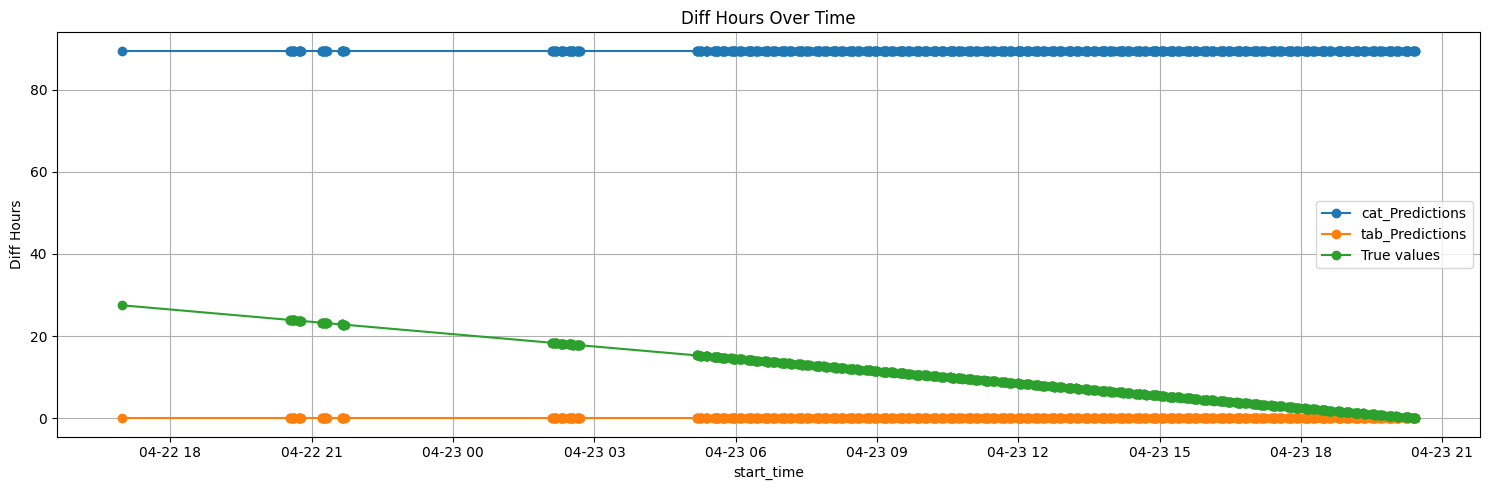

[0,1]
(7410, 33) (7410, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7451.42676| val_0_mse: 7193.48363|  0:00:00s
epoch 1  | loss: 6301.49279| val_0_mse: 4954.66354|  0:00:00s
epoch 2  | loss: 4890.18112| val_0_mse: 2873.50943|  0:00:01s
epoch 3  | loss: 3227.47215| val_0_mse: 1669.30035|  0:00:01s
epoch 4  | loss: 1639.94214| val_0_mse: 646.11867|  0:00:02s
epoch 5  | loss: 503.08024| val_0_mse: 231.44081|  0:00:02s
epoch 6  | loss: 121.13063| val_0_mse: 139.31434|  0:00:03s
epoch 7  | loss: 88.5715 | val_0_mse: 102.04213|  0:00:03s
epoch 8  | loss: 65.99277| val_0_mse: 32.00448|  0:00:04s
epoch 9  | loss: 37.46037| val_0_mse: 31.84952|  0:00:05s
epoch 10 | loss: 40.84521| val_0_mse: 44.69875|  0:00:05s
epoch 11 | loss: 36.44584| val_0_mse: 15.79538|  0:00:06s
epoch 12 | loss: 25.94378| val_0_mse: 10.12671|  0:00:06s
epoch 13 | loss: 28.36728| val_0_mse: 28.62339|  0:00:07s
epoch 14 | loss: 31.82069| val_0_mse: 9.95723 |  0:00:07s
epoch 15 | loss: 22.51637| val_0_mse: 6.30022 |  0:00:08s
epoch 16 | loss: 17.89974| val_0_mse: 5.76234 | 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 12439.979762926085
cat_rmse1: 111.4549226859837
cat_rmse2: 111.63739548187252
tab_rmse: 17125.905127730268
tab_rmse1: 132.11462233590797
tab_rmse2: 129.2379786072341


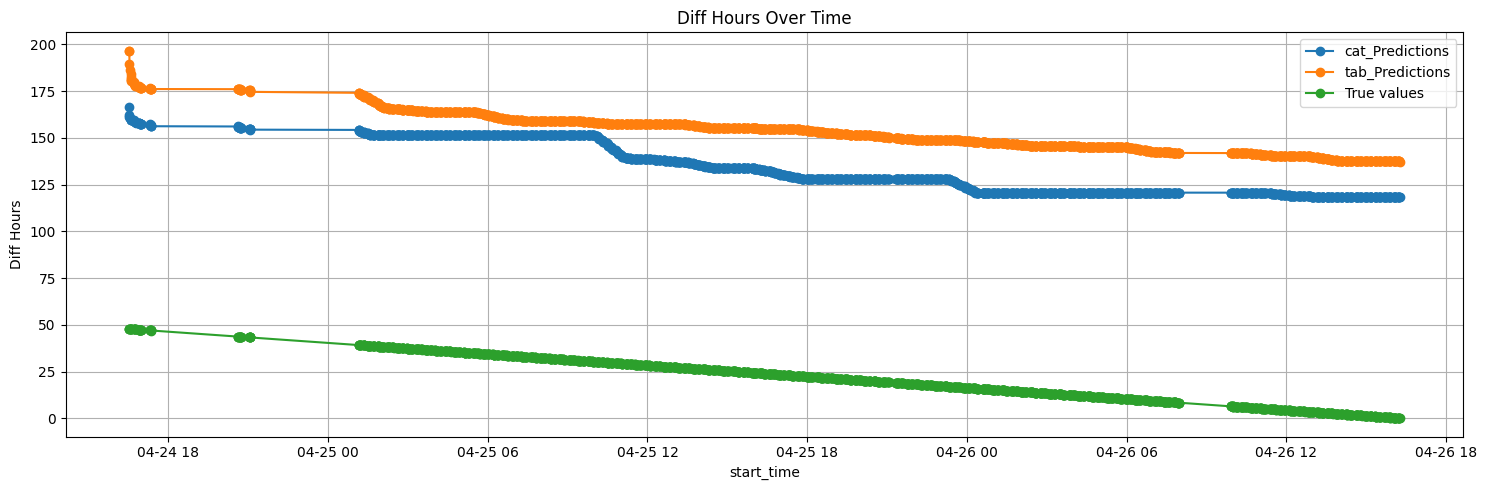

[0,2]
(9186, 33) (9186, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5994.7117| val_0_mse: 5740.05675|  0:00:00s
epoch 1  | loss: 4715.27191| val_0_mse: 3479.63731|  0:00:01s
epoch 2  | loss: 3188.95402| val_0_mse: 1882.73083|  0:00:01s
epoch 3  | loss: 1629.24924| val_0_mse: 822.54508|  0:00:02s
epoch 4  | loss: 532.90002| val_0_mse: 515.95689|  0:00:02s
epoch 5  | loss: 173.22423| val_0_mse: 108.94376|  0:00:03s
epoch 6  | loss: 74.88483| val_0_mse: 71.8532 |  0:00:04s
epoch 7  | loss: 66.37026| val_0_mse: 42.44173|  0:00:04s
epoch 8  | loss: 56.59157| val_0_mse: 29.43148|  0:00:05s
epoch 9  | loss: 59.88024| val_0_mse: 29.37321|  0:00:06s
epoch 10 | loss: 43.63183| val_0_mse: 17.91682|  0:00:06s
epoch 11 | loss: 38.56473| val_0_mse: 14.27731|  0:00:07s
epoch 12 | loss: 49.66298| val_0_mse: 16.5624 |  0:00:07s
epoch 13 | loss: 38.52664| val_0_mse: 14.35378|  0:00:08s
epoch 14 | loss: 40.58131| val_0_mse: 11.58298|  0:00:09s
epoch 15 | loss: 41.52989| val_0_mse: 12.37365|  0:00:10s
epoch 16 | loss: 34.43731| val_0_mse: 17.99306|  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


(2725, 33) (2725, 1)
cat_rmse: 441.45677149018974
cat_rmse1: 17.015600270182336
cat_rmse2: 24.928780505705884
tab_rmse: 1261.422731469199
tab_rmse1: 27.26856720160471
tab_rmse2: 43.30033221944319


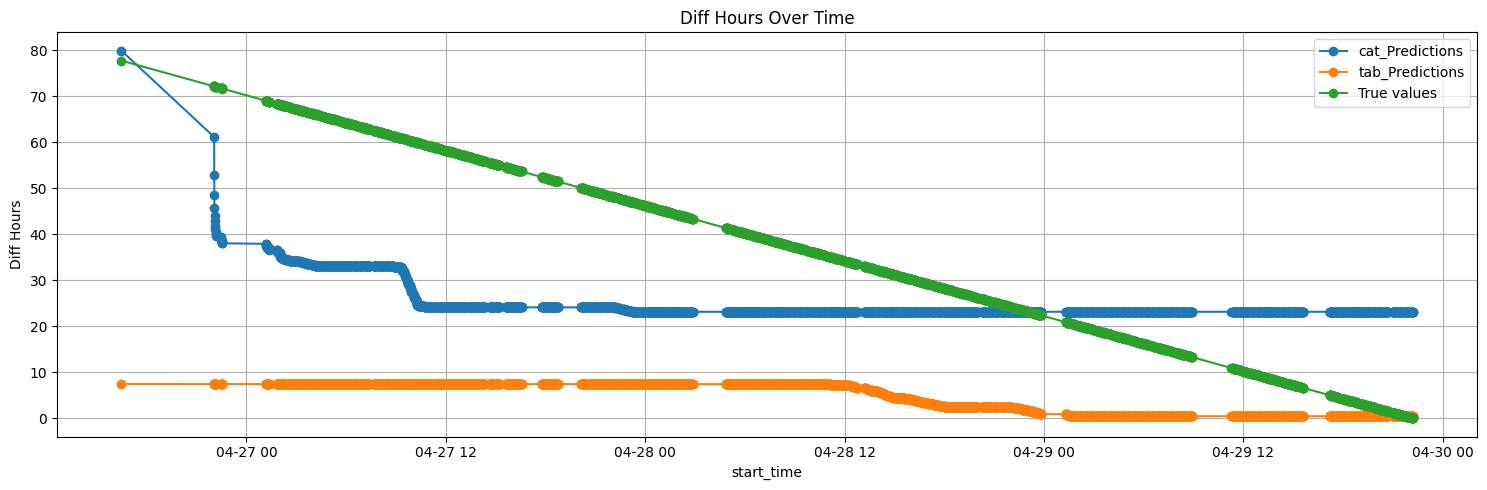

[0,3]
(11911, 33) (11911, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4740.62698| val_0_mse: 4120.14705|  0:00:00s
epoch 1  | loss: 3100.69229| val_0_mse: 1604.44768|  0:00:01s
epoch 2  | loss: 1312.57073| val_0_mse: 568.13386|  0:00:02s
epoch 3  | loss: 382.30835| val_0_mse: 263.58455|  0:00:03s
epoch 4  | loss: 156.21152| val_0_mse: 213.86555|  0:00:03s
epoch 5  | loss: 81.31202| val_0_mse: 61.90796|  0:00:04s
epoch 6  | loss: 67.79612| val_0_mse: 58.29616|  0:00:05s
epoch 7  | loss: 57.60958| val_0_mse: 27.12231|  0:00:06s
epoch 8  | loss: 47.64074| val_0_mse: 24.14797|  0:00:07s
epoch 9  | loss: 46.57702| val_0_mse: 20.68172|  0:00:08s
epoch 10 | loss: 40.3296 | val_0_mse: 20.50651|  0:00:09s
epoch 11 | loss: 28.84564| val_0_mse: 20.14987|  0:00:11s
epoch 12 | loss: 28.04508| val_0_mse: 15.1843 |  0:00:11s
epoch 13 | loss: 24.26982| val_0_mse: 11.68847|  0:00:12s
epoch 14 | loss: 25.98548| val_0_mse: 6.28963 |  0:00:13s
epoch 15 | loss: 28.76913| val_0_mse: 9.93044 |  0:00:14s
epoch 16 | loss: 25.09849| val_0_mse: 14.51461|  0:00:15s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
3
(223, 33) (223, 1)
cat_rmse: 422.62531186211567
cat_rmse1: 20.8763898622294
cat_rmse2: 19.44412164383034
tab_rmse: 1413.008648440506
tab_rmse1: 37.62065174773224
tab_rmse2: 37.486380917021975


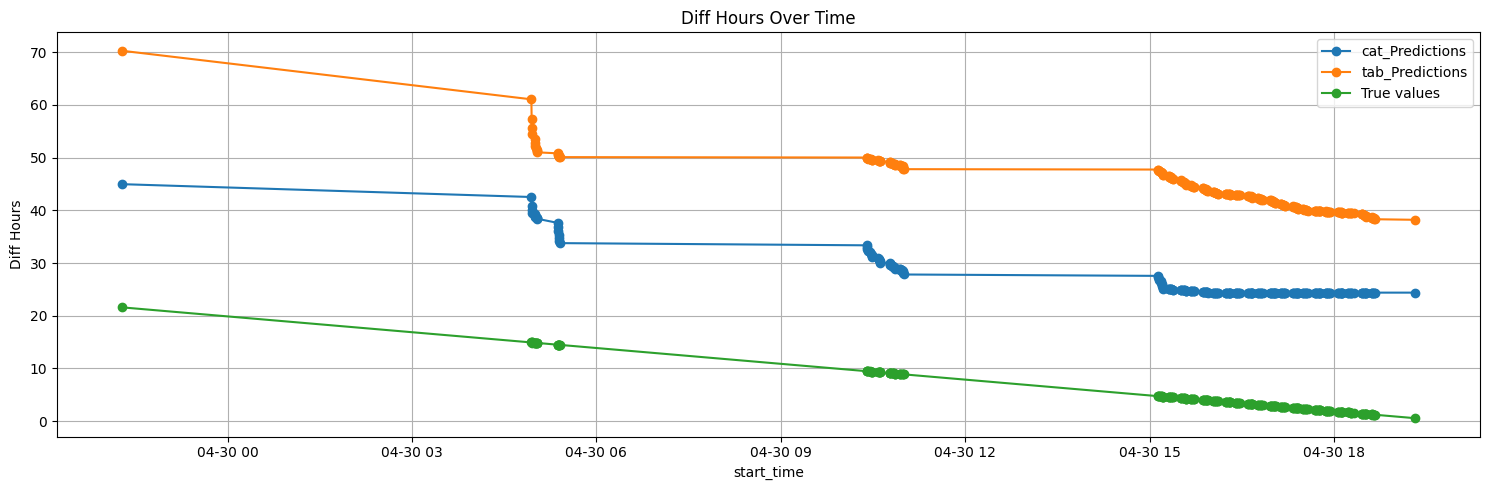

[0,4]
(12134, 33) (12134, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4696.58833| val_0_mse: 4268.24064|  0:00:00s
epoch 1  | loss: 3105.89839| val_0_mse: 2109.41484|  0:00:01s
epoch 2  | loss: 1381.43698| val_0_mse: 587.58993|  0:00:02s
epoch 3  | loss: 355.31977| val_0_mse: 637.86548|  0:00:03s
epoch 4  | loss: 125.79039| val_0_mse: 176.23336|  0:00:04s
epoch 5  | loss: 71.98927| val_0_mse: 44.37562|  0:00:04s
epoch 6  | loss: 54.50714| val_0_mse: 22.82597|  0:00:05s
epoch 7  | loss: 45.50676| val_0_mse: 17.28114|  0:00:07s
epoch 8  | loss: 33.54432| val_0_mse: 11.38821|  0:00:08s
epoch 9  | loss: 32.09285| val_0_mse: 32.10115|  0:00:09s
epoch 10 | loss: 28.826  | val_0_mse: 8.18383 |  0:00:10s
epoch 11 | loss: 23.78435| val_0_mse: 12.7929 |  0:00:12s
epoch 12 | loss: 19.39966| val_0_mse: 13.61743|  0:00:15s
epoch 13 | loss: 26.9139 | val_0_mse: 12.16498|  0:00:16s
epoch 14 | loss: 23.64864| val_0_mse: 10.95533|  0:00:18s
epoch 15 | loss: 24.43961| val_0_mse: 7.70652 |  0:00:20s
epoch 16 | loss: 25.49712| val_0_mse: 6.67817 |  0:00:21s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
4
(1071, 33) (1071, 1)
cat_rmse: 184.49069466755287
cat_rmse1: 9.96519631065879
cat_rmse2: 16.162588057746017
tab_rmse: 115.77311361011522
tab_rmse1: 7.777762561613734
tab_rmse2: 12.86744417998607


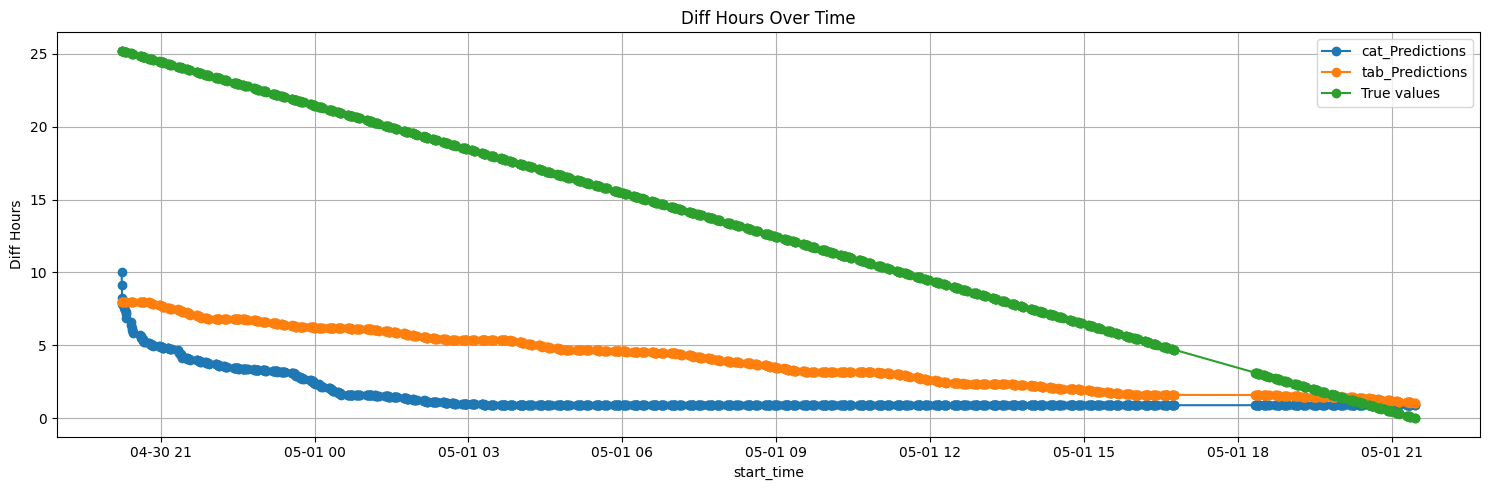

[1,5]
(6600, 33) (6600, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 760.70623| val_0_mse: 709.46561|  0:00:00s
epoch 1  | loss: 519.1893| val_0_mse: 414.30039|  0:00:00s
epoch 2  | loss: 313.26549| val_0_mse: 204.98967|  0:00:01s
epoch 3  | loss: 172.16725| val_0_mse: 130.98586|  0:00:02s
epoch 4  | loss: 110.02526| val_0_mse: 87.39055|  0:00:02s
epoch 5  | loss: 59.19416| val_0_mse: 45.19047|  0:00:03s
epoch 6  | loss: 39.87363| val_0_mse: 33.79867|  0:00:03s
epoch 7  | loss: 26.48091| val_0_mse: 19.3252 |  0:00:04s
epoch 8  | loss: 20.51221| val_0_mse: 23.47123|  0:00:05s
epoch 9  | loss: 17.07793| val_0_mse: 11.69395|  0:00:05s
epoch 10 | loss: 13.19375| val_0_mse: 13.61836|  0:00:06s
epoch 11 | loss: 11.98778| val_0_mse: 24.63207|  0:00:06s
epoch 12 | loss: 10.04521| val_0_mse: 16.0883 |  0:00:07s
epoch 13 | loss: 8.89556 | val_0_mse: 5.60616 |  0:00:07s
epoch 14 | loss: 8.34881 | val_0_mse: 11.79567|  0:00:08s
epoch 15 | loss: 6.97998 | val_0_mse: 3.40737 |  0:00:08s
epoch 16 | loss: 7.56768 | val_0_mse: 3.02244 |  0:00:09s
epoch 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 11030.91646069989
cat_rmse1: 61.98692655041211
cat_rmse2: 138.77262762164185
tab_rmse: 11152.99081524014
tab_rmse1: 62.38344430975228
tab_rmse2: 139.5105227096204


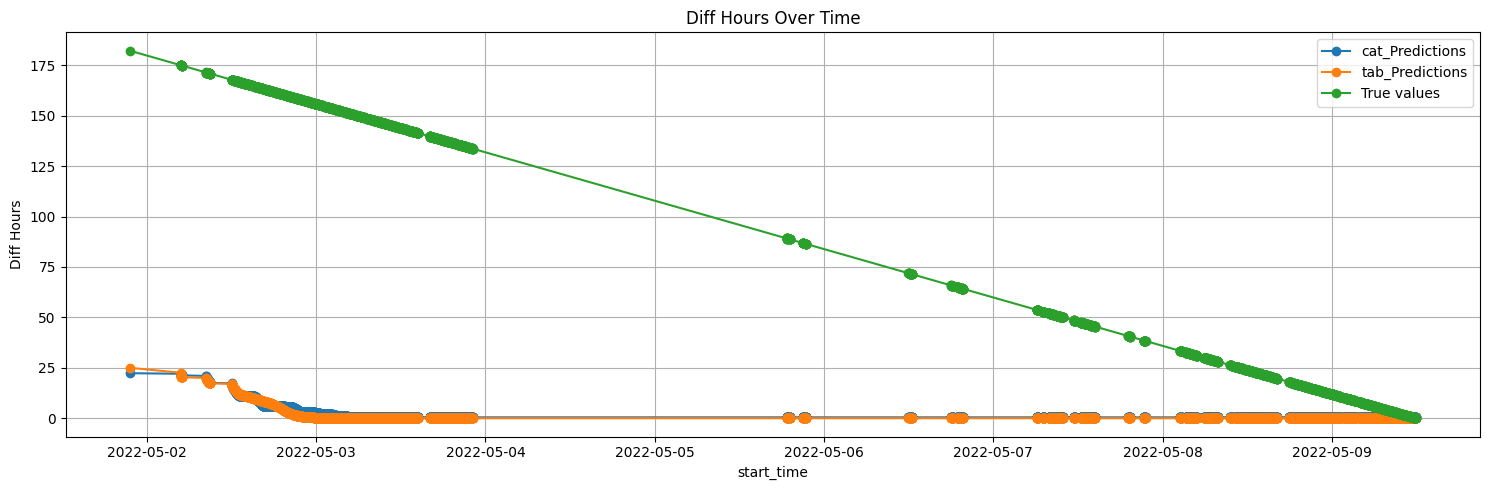

[2,6]
(9053, 33) (9053, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4423.13268| val_0_mse: 4119.09921|  0:00:00s
epoch 1  | loss: 3671.61464| val_0_mse: 3011.76936|  0:00:01s
epoch 2  | loss: 2771.26012| val_0_mse: 1950.39749|  0:00:02s
epoch 3  | loss: 1933.35571| val_0_mse: 1638.69698|  0:00:02s
epoch 4  | loss: 1392.98066| val_0_mse: 1020.23158|  0:00:03s
epoch 5  | loss: 913.90993| val_0_mse: 644.28708|  0:00:03s
epoch 6  | loss: 567.20267| val_0_mse: 396.86137|  0:00:04s
epoch 7  | loss: 466.69534| val_0_mse: 335.93703|  0:00:05s
epoch 8  | loss: 326.33198| val_0_mse: 195.33819|  0:00:05s
epoch 9  | loss: 209.17415| val_0_mse: 134.86165|  0:00:06s
epoch 10 | loss: 144.09157| val_0_mse: 78.17886|  0:00:06s
epoch 11 | loss: 91.41485| val_0_mse: 70.11247|  0:00:07s
epoch 12 | loss: 76.67443| val_0_mse: 35.69494|  0:00:08s
epoch 13 | loss: 52.57081| val_0_mse: 43.54576|  0:00:08s
epoch 14 | loss: 56.21623| val_0_mse: 29.78688|  0:00:09s
epoch 15 | loss: 51.53901| val_0_mse: 26.23643|  0:00:09s
epoch 16 | loss: 43.47469| val_0_mse: 51.

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
6
(66, 33) (66, 1)
cat_rmse: 4872.083346653371
cat_rmse1: 59.804263162020206
cat_rmse2: 72.82717771173478
tab_rmse: 23246.918116270837
tab_rmse1: 153.13069813674787
tab_rmse2: 152.2483963773721


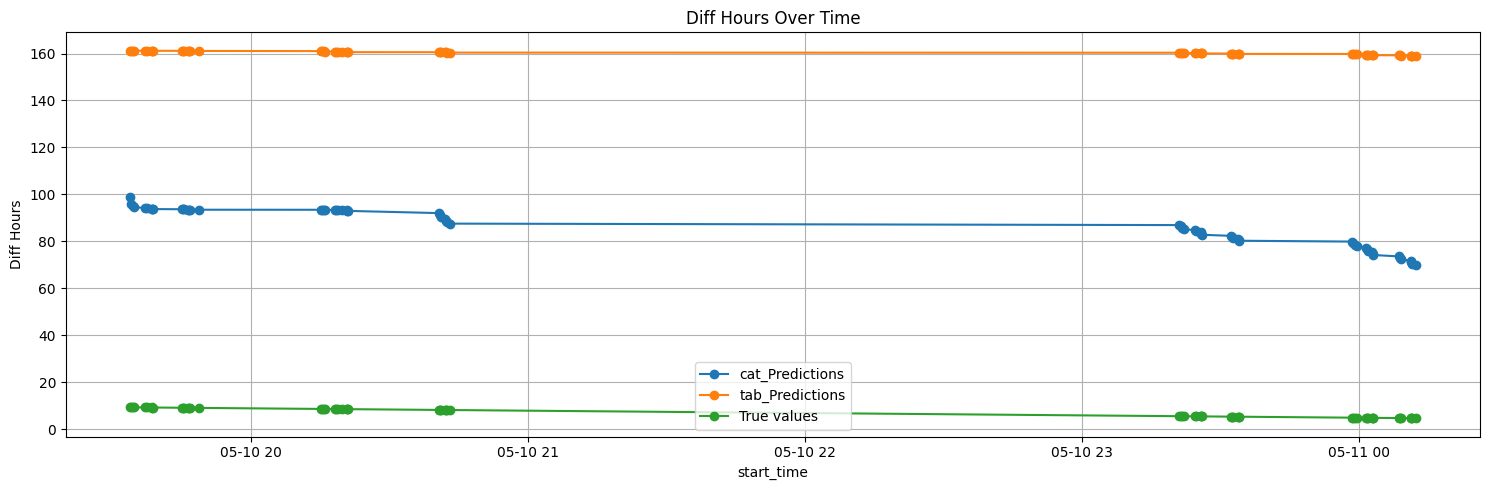

[3,7]
(7343, 33) (7343, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5436.79075| val_0_mse: 5233.75245|  0:00:00s
epoch 1  | loss: 4772.5783| val_0_mse: 4239.53728|  0:00:01s
epoch 2  | loss: 3871.45807| val_0_mse: 2903.42073|  0:00:01s
epoch 3  | loss: 2940.85178| val_0_mse: 2102.61504|  0:00:02s
epoch 4  | loss: 2088.33596| val_0_mse: 1738.39777|  0:00:02s
epoch 5  | loss: 1291.47172| val_0_mse: 897.88061|  0:00:03s
epoch 6  | loss: 751.58907| val_0_mse: 827.84495|  0:00:03s
epoch 7  | loss: 487.07551| val_0_mse: 442.4784|  0:00:04s
epoch 8  | loss: 359.71015| val_0_mse: 257.95092|  0:00:04s
epoch 9  | loss: 249.00687| val_0_mse: 198.02575|  0:00:05s
epoch 10 | loss: 220.84856| val_0_mse: 222.89964|  0:00:05s
epoch 11 | loss: 213.31563| val_0_mse: 146.46564|  0:00:06s
epoch 12 | loss: 168.39356| val_0_mse: 92.1457 |  0:00:06s
epoch 13 | loss: 118.68571| val_0_mse: 124.35761|  0:00:07s
epoch 14 | loss: 118.73002| val_0_mse: 70.29441|  0:00:07s
epoch 15 | loss: 114.27647| val_0_mse: 74.38333|  0:00:08s
epoch 16 | loss: 92.97513| val_0_m

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
7
(597, 33) (597, 1)
cat_rmse: 551.7229132078403
cat_rmse1: 25.740149536491792
cat_rmse2: 21.429325375149393
tab_rmse: 55.2030796171135
tab_rmse1: 5.199437646538992
tab_rmse2: 8.872116279076819


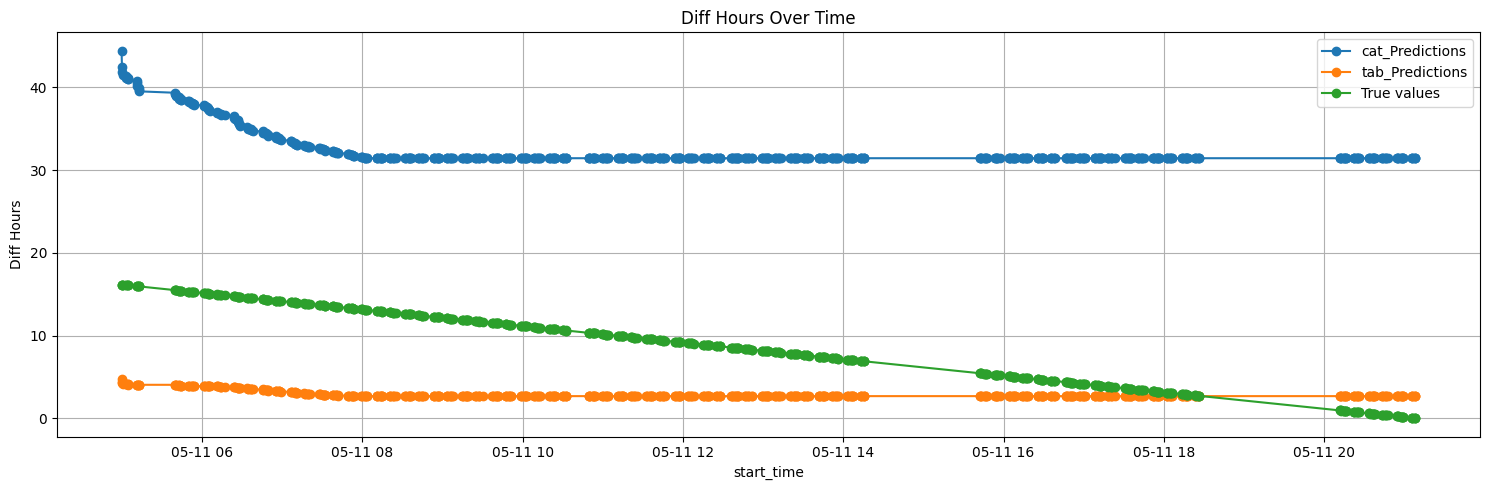

[4,8]
(5215, 33) (5215, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6965.05098| val_0_mse: 6846.92581|  0:00:00s
epoch 1  | loss: 6360.0918| val_0_mse: 6007.32389|  0:00:00s
epoch 2  | loss: 5592.91568| val_0_mse: 4799.183|  0:00:01s
epoch 3  | loss: 4763.70522| val_0_mse: 3735.52203|  0:00:01s
epoch 4  | loss: 3937.88403| val_0_mse: 3071.64671|  0:00:01s
epoch 5  | loss: 3145.41373| val_0_mse: 2567.02495|  0:00:02s
epoch 6  | loss: 2362.39489| val_0_mse: 2765.61119|  0:00:02s
epoch 7  | loss: 1537.41579| val_0_mse: 2160.6218|  0:00:02s
epoch 8  | loss: 747.73657| val_0_mse: 1158.75646|  0:00:03s
epoch 9  | loss: 494.16145| val_0_mse: 924.3284|  0:00:03s
epoch 10 | loss: 267.73175| val_0_mse: 269.05526|  0:00:04s
epoch 11 | loss: 171.88986| val_0_mse: 114.47804|  0:00:04s
epoch 12 | loss: 113.69506| val_0_mse: 76.93913|  0:00:05s
epoch 13 | loss: 98.85191| val_0_mse: 65.29061|  0:00:05s
epoch 14 | loss: 76.66246| val_0_mse: 80.22729|  0:00:06s
epoch 15 | loss: 99.55559| val_0_mse: 44.22026|  0:00:07s
epoch 16 | loss: 78.9477 | val_0_ms

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 707.5285439239167
cat_rmse1: 22.181158950986354
cat_rmse2: 31.110288474320544
tab_rmse: 626.0724154955831
tab_rmse1: 20.761586828072527
tab_rmse2: 29.353672139769035


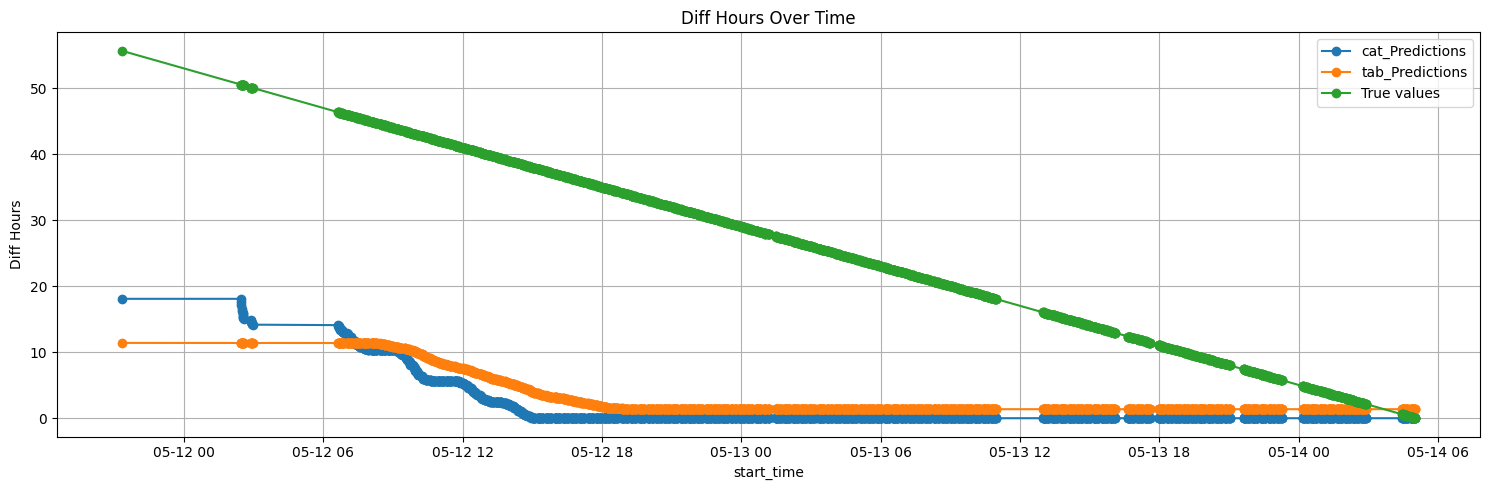

[5,9]
(6971, 33) (6971, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5306.47557| val_0_mse: 5187.57277|  0:00:00s
epoch 1  | loss: 4591.53156| val_0_mse: 4007.78083|  0:00:00s
epoch 2  | loss: 3755.07499| val_0_mse: 2945.57873|  0:00:01s
epoch 3  | loss: 2935.37795| val_0_mse: 2237.9092|  0:00:01s
epoch 4  | loss: 2180.18418| val_0_mse: 2013.43326|  0:00:02s
epoch 5  | loss: 1542.28454| val_0_mse: 1699.33253|  0:00:02s
epoch 6  | loss: 1066.30632| val_0_mse: 1211.17336|  0:00:03s
epoch 7  | loss: 820.49306| val_0_mse: 713.54237|  0:00:03s
epoch 8  | loss: 666.44566| val_0_mse: 1754.28705|  0:00:04s
epoch 9  | loss: 550.26498| val_0_mse: 722.88516|  0:00:05s
epoch 10 | loss: 348.88536| val_0_mse: 475.70384|  0:00:05s
epoch 11 | loss: 234.13656| val_0_mse: 538.73743|  0:00:05s
epoch 12 | loss: 187.54835| val_0_mse: 101.82957|  0:00:06s
epoch 13 | loss: 161.87213| val_0_mse: 140.4178|  0:00:07s
epoch 14 | loss: 148.33049| val_0_mse: 122.04871|  0:00:07s
epoch 15 | loss: 116.30015| val_0_mse: 81.70372|  0:00:08s
epoch 16 | loss: 119.92587| 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 2677.1761909945403
cat_rmse1: 36.02067599236702
cat_rmse2: 65.10329827250804
tab_rmse: 5748.060794390114
tab_rmse1: 56.242088976640325
tab_rmse2: 93.12968274468633


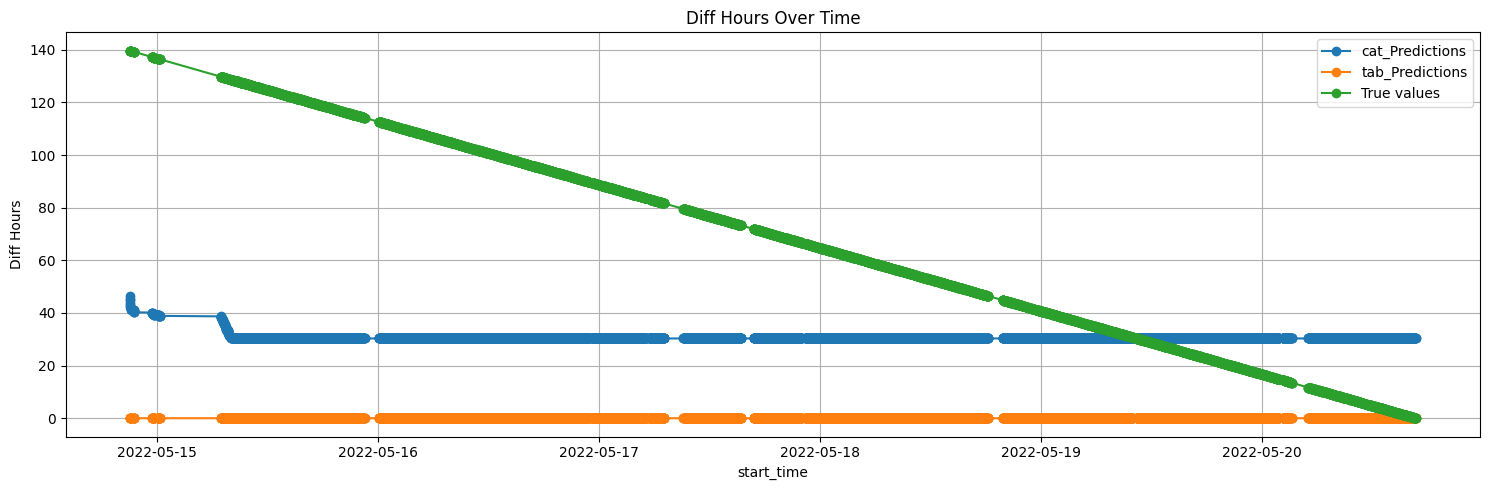

[6,10]
(11578, 33) (11578, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5519.55146| val_0_mse: 4856.82454|  0:00:00s
epoch 1  | loss: 3747.08891| val_0_mse: 1548.52565|  0:00:01s
epoch 2  | loss: 1693.7986| val_0_mse: 503.84717|  0:00:02s
epoch 3  | loss: 441.25999| val_0_mse: 325.91171|  0:00:03s
epoch 4  | loss: 210.15219| val_0_mse: 144.7154|  0:00:04s
epoch 5  | loss: 144.24607| val_0_mse: 121.88456|  0:00:05s
epoch 6  | loss: 108.64579| val_0_mse: 73.7909 |  0:00:06s
epoch 7  | loss: 91.32187| val_0_mse: 67.81015|  0:00:07s
epoch 8  | loss: 71.46814| val_0_mse: 45.86789|  0:00:08s
epoch 9  | loss: 54.79531| val_0_mse: 33.00448|  0:00:09s
epoch 10 | loss: 47.57547| val_0_mse: 25.08293|  0:00:09s
epoch 11 | loss: 35.77853| val_0_mse: 49.65386|  0:00:10s
epoch 12 | loss: 30.16688| val_0_mse: 29.39836|  0:00:11s
epoch 13 | loss: 28.74131| val_0_mse: 22.15925|  0:00:12s
epoch 14 | loss: 26.38227| val_0_mse: 11.67231|  0:00:12s
epoch 15 | loss: 23.77087| val_0_mse: 26.73115|  0:00:13s
epoch 16 | loss: 18.46583| val_0_mse: 14.69488|  0:00:14

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
10
(1062, 33) (1062, 1)
cat_rmse: 7439.4774491349635
cat_rmse1: 86.35333592050097
cat_rmse2: 86.07263250060971
tab_rmse: 14733.02850786329
tab_rmse1: 121.4272988444287
tab_rmse2: 121.29497563364052


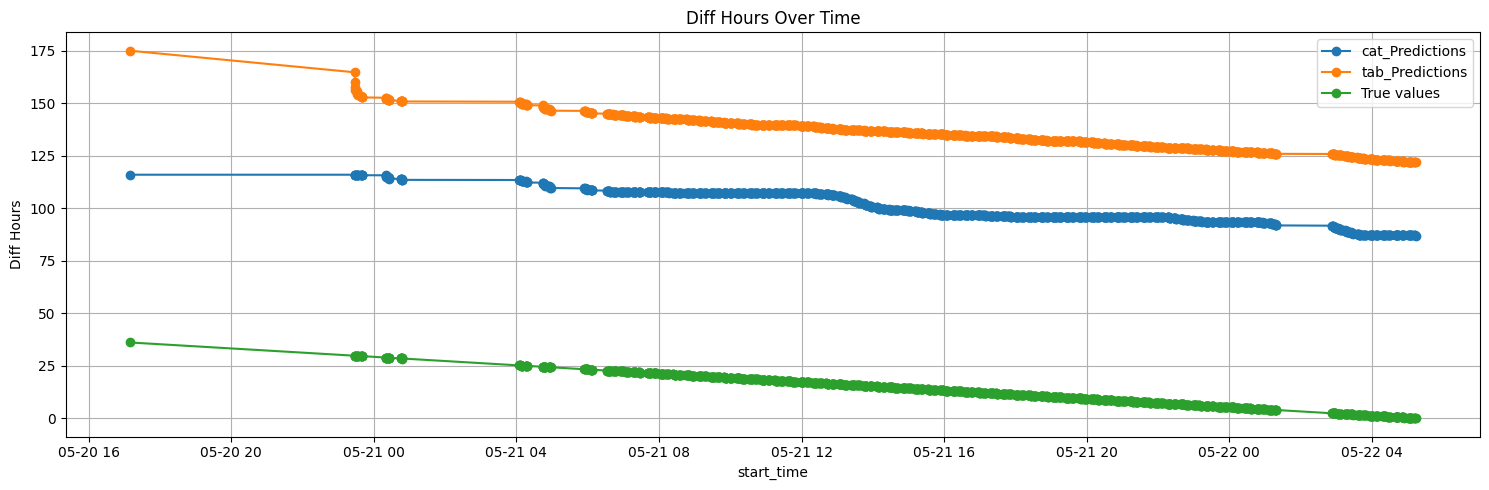

[7,11]
(9382, 33) (9382, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3290.45708| val_0_mse: 2942.44721|  0:00:00s
epoch 1  | loss: 2366.93305| val_0_mse: 1406.19456|  0:00:01s
epoch 2  | loss: 1317.09437| val_0_mse: 556.1862|  0:00:02s
epoch 3  | loss: 394.39686| val_0_mse: 1416.97473|  0:00:03s
epoch 4  | loss: 129.65219| val_0_mse: 206.26102|  0:00:03s
epoch 5  | loss: 89.59051| val_0_mse: 76.49675|  0:00:04s
epoch 6  | loss: 79.6092 | val_0_mse: 92.89792|  0:00:05s
epoch 7  | loss: 70.93997| val_0_mse: 55.96453|  0:00:05s
epoch 8  | loss: 64.78964| val_0_mse: 47.39181|  0:00:06s
epoch 9  | loss: 67.3155 | val_0_mse: 45.52693|  0:00:06s
epoch 10 | loss: 58.96814| val_0_mse: 47.61602|  0:00:07s
epoch 11 | loss: 58.35775| val_0_mse: 41.61777|  0:00:08s
epoch 12 | loss: 54.88852| val_0_mse: 41.26095|  0:00:08s
epoch 13 | loss: 58.35741| val_0_mse: 38.08804|  0:00:09s
epoch 14 | loss: 53.76249| val_0_mse: 47.38721|  0:00:10s
epoch 15 | loss: 48.12712| val_0_mse: 43.67209|  0:00:11s
epoch 16 | loss: 48.90968| val_0_mse: 36.40325|  0:00:12s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
11
(668, 33) (668, 1)
cat_rmse: 47.03959889910804
cat_rmse1: 7.230915984059806
cat_rmse2: 5.908018017255799
tab_rmse: 1.3114370103240054
tab_rmse1: 1.238279525471296
tab_rmse2: 0.8934196445388848


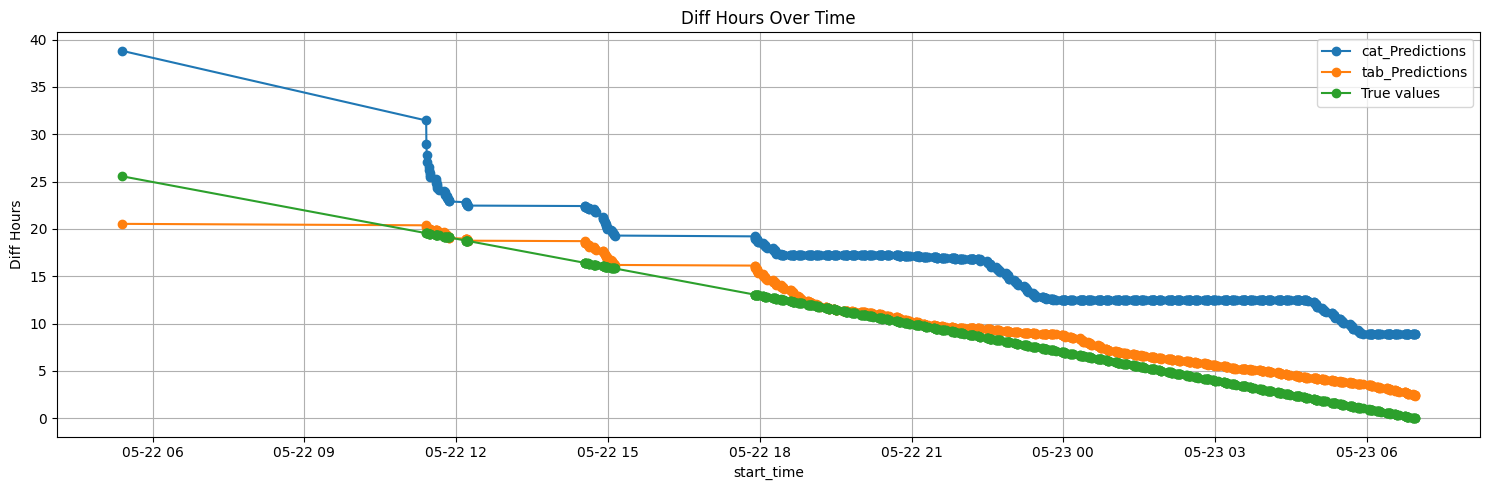

[8,12]
(9984, 33) (9984, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3059.71799| val_0_mse: 2681.51698|  0:00:00s
epoch 1  | loss: 2121.3331| val_0_mse: 905.22843|  0:00:02s
epoch 2  | loss: 925.30133| val_0_mse: 387.07964|  0:00:03s
epoch 3  | loss: 246.07174| val_0_mse: 163.73575|  0:00:04s
epoch 4  | loss: 120.43469| val_0_mse: 93.26318|  0:00:04s
epoch 5  | loss: 80.44638| val_0_mse: 67.6533 |  0:00:05s
epoch 6  | loss: 70.80832| val_0_mse: 64.67245|  0:00:06s
epoch 7  | loss: 59.75133| val_0_mse: 40.59295|  0:00:07s
epoch 8  | loss: 56.38568| val_0_mse: 48.51898|  0:00:07s
epoch 9  | loss: 52.85332| val_0_mse: 78.76442|  0:00:08s
epoch 10 | loss: 54.65905| val_0_mse: 38.81853|  0:00:09s
epoch 11 | loss: 46.1995 | val_0_mse: 28.40778|  0:00:10s
epoch 12 | loss: 46.82958| val_0_mse: 29.98157|  0:00:10s
epoch 13 | loss: 49.29314| val_0_mse: 34.47003|  0:00:11s
epoch 14 | loss: 47.82353| val_0_mse: 25.97181|  0:00:12s
epoch 15 | loss: 43.77922| val_0_mse: 53.65242|  0:00:13s
epoch 16 | loss: 31.48829| val_0_mse: 29.1169 |  0:00:13s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
12
(5242, 33) (5242, 1)
cat_rmse: 4296.503260021181
cat_rmse1: 55.64007472481571
cat_rmse2: 88.9340075600198
tab_rmse: 5927.0348909945205
tab_rmse1: 67.59133206530271
tab_rmse2: 100.07236957803798


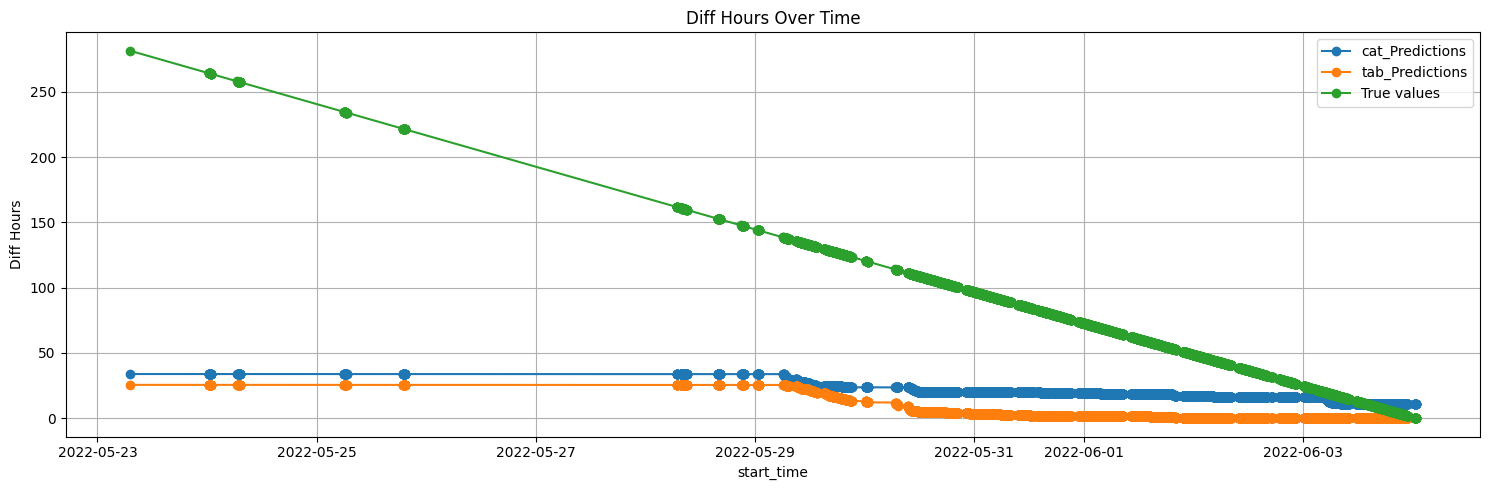

[9,13]
(14629, 33) (14629, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4193.70098| val_0_mse: 3370.25498|  0:00:00s
epoch 1  | loss: 2475.04217| val_0_mse: 829.55646|  0:00:01s
epoch 2  | loss: 747.97739| val_0_mse: 434.3424|  0:00:02s
epoch 3  | loss: 204.68835| val_0_mse: 215.57576|  0:00:03s
epoch 4  | loss: 99.01909| val_0_mse: 63.04935|  0:00:04s
epoch 5  | loss: 64.8447 | val_0_mse: 26.99786|  0:00:06s
epoch 6  | loss: 53.39334| val_0_mse: 28.01386|  0:00:08s
epoch 7  | loss: 47.52433| val_0_mse: 28.24948|  0:00:09s
epoch 8  | loss: 42.38947| val_0_mse: 20.21902|  0:00:10s
epoch 9  | loss: 41.10655| val_0_mse: 21.33447|  0:00:11s
epoch 10 | loss: 35.28438| val_0_mse: 20.00204|  0:00:12s
epoch 11 | loss: 37.07982| val_0_mse: 11.57091|  0:00:13s
epoch 12 | loss: 36.70442| val_0_mse: 26.91993|  0:00:14s
epoch 13 | loss: 27.12371| val_0_mse: 19.67967|  0:00:15s
epoch 14 | loss: 27.06553| val_0_mse: 15.96449|  0:00:16s
epoch 15 | loss: 25.96999| val_0_mse: 16.61698|  0:00:17s
epoch 16 | loss: 26.58865| val_0_mse: 17.28453|  0:00:18s
epoc

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
13
(1328, 33) (1328, 1)
cat_rmse: 431.79507815471914
cat_rmse1: 20.962454834082287
cat_rmse2: 20.070067087403412
tab_rmse: 566.6168012962514
tab_rmse1: 18.949287664022908
tab_rmse2: 36.81242956683423


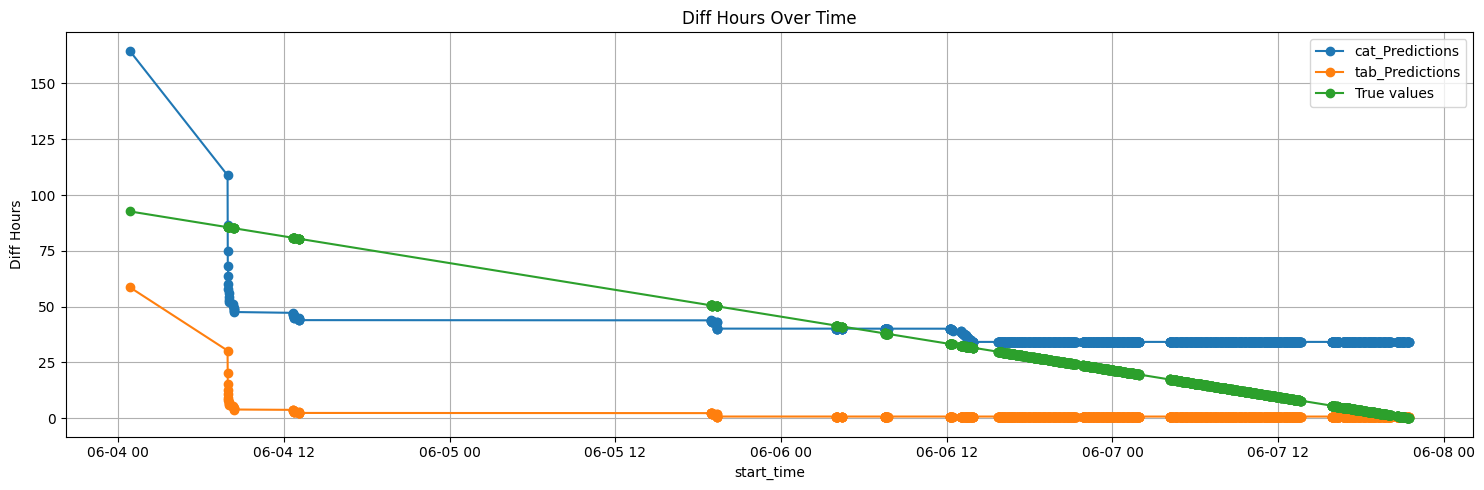

[10,14]
(13978, 33) (13978, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4409.82344| val_0_mse: 3808.25774|  0:00:01s
epoch 1  | loss: 2925.73798| val_0_mse: 1287.85895|  0:00:02s
epoch 2  | loss: 1123.59426| val_0_mse: 553.6706|  0:00:03s
epoch 3  | loss: 356.26118| val_0_mse: 265.57434|  0:00:04s
epoch 4  | loss: 218.13337| val_0_mse: 175.76661|  0:00:05s
epoch 5  | loss: 164.18402| val_0_mse: 119.37894|  0:00:06s
epoch 6  | loss: 137.82544| val_0_mse: 90.86376|  0:00:07s
epoch 7  | loss: 109.30378| val_0_mse: 80.9021 |  0:00:08s
epoch 8  | loss: 104.71678| val_0_mse: 56.89522|  0:00:09s
epoch 9  | loss: 83.29829| val_0_mse: 42.1311 |  0:00:10s
epoch 10 | loss: 68.01567| val_0_mse: 40.41239|  0:00:11s
epoch 11 | loss: 65.88925| val_0_mse: 47.06011|  0:00:12s
epoch 12 | loss: 58.15874| val_0_mse: 28.13324|  0:00:13s
epoch 13 | loss: 53.3454 | val_0_mse: 46.09394|  0:00:14s
epoch 14 | loss: 50.17767| val_0_mse: 25.64181|  0:00:16s
epoch 15 | loss: 44.92679| val_0_mse: 28.58936|  0:00:17s
epoch 16 | loss: 39.35938| val_0_mse: 23.8589 |  0:00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
14
(622, 33) (622, 1)
cat_rmse: 1105.0052775841746
cat_rmse1: 32.743525859468484
cat_rmse2: 34.52364032280674
tab_rmse: 1017.2701000099735
tab_rmse1: 29.8075535731275
tab_rmse2: 36.84660899787359


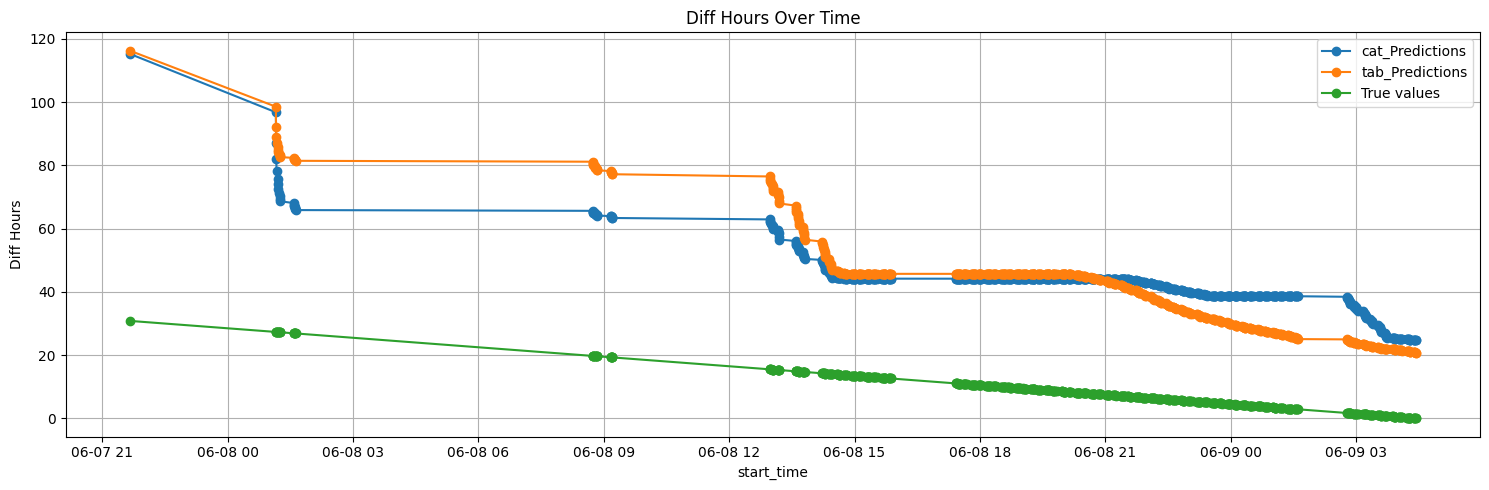

[11,15]
(8922, 33) (8922, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3874.04632| val_0_mse: 3566.81854|  0:00:00s
epoch 1  | loss: 3042.68395| val_0_mse: 2043.72511|  0:00:01s
epoch 2  | loss: 1924.58633| val_0_mse: 886.75075|  0:00:02s
epoch 3  | loss: 818.57998| val_0_mse: 559.19785|  0:00:02s
epoch 4  | loss: 252.90253| val_0_mse: 405.35389|  0:00:03s
epoch 5  | loss: 150.28311| val_0_mse: 178.87882|  0:00:03s
epoch 6  | loss: 115.88954| val_0_mse: 96.76236|  0:00:04s
epoch 7  | loss: 109.5693| val_0_mse: 117.3995|  0:00:05s
epoch 8  | loss: 93.28505| val_0_mse: 67.24047|  0:00:05s
epoch 9  | loss: 98.37616| val_0_mse: 60.18516|  0:00:06s
epoch 10 | loss: 77.34937| val_0_mse: 47.89353|  0:00:06s
epoch 11 | loss: 81.64135| val_0_mse: 43.39024|  0:00:07s
epoch 12 | loss: 67.60399| val_0_mse: 49.18086|  0:00:08s
epoch 13 | loss: 64.90764| val_0_mse: 63.76082|  0:00:08s
epoch 14 | loss: 70.16565| val_0_mse: 42.48279|  0:00:09s
epoch 15 | loss: 58.08462| val_0_mse: 46.02761|  0:00:10s
epoch 16 | loss: 53.89247| val_0_mse: 51.42105|  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
15
(5195, 33) (5195, 1)
cat_rmse: 5057.737314263941
cat_rmse1: 54.210034881592485
cat_rmse2: 87.41684144166983
tab_rmse: 5438.502105247899
tab_rmse1: 56.053759690436465
tab_rmse2: 90.76826650170216


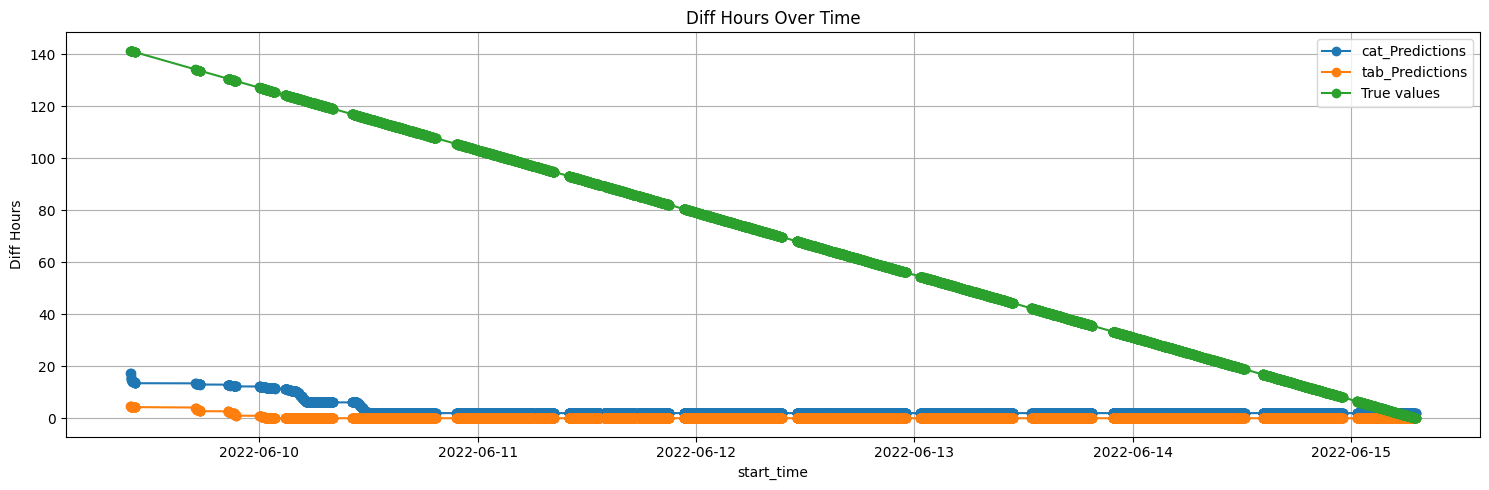

[12,16]
(13055, 33) (13055, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4521.43487| val_0_mse: 4071.09669|  0:00:01s
epoch 1  | loss: 3303.71713| val_0_mse: 2281.41302|  0:00:02s
epoch 2  | loss: 1818.87324| val_0_mse: 951.36032|  0:00:03s
epoch 3  | loss: 858.22572| val_0_mse: 609.44759|  0:00:04s
epoch 4  | loss: 586.91923| val_0_mse: 479.44077|  0:00:05s
epoch 5  | loss: 381.58947| val_0_mse: 290.242 |  0:00:06s
epoch 6  | loss: 282.64533| val_0_mse: 184.73127|  0:00:07s
epoch 7  | loss: 229.80336| val_0_mse: 149.61893|  0:00:08s
epoch 8  | loss: 224.76343| val_0_mse: 131.04281|  0:00:08s
epoch 9  | loss: 189.06789| val_0_mse: 104.62248|  0:00:09s
epoch 10 | loss: 140.96659| val_0_mse: 63.28566|  0:00:10s
epoch 11 | loss: 124.59134| val_0_mse: 54.01957|  0:00:11s
epoch 12 | loss: 105.7166| val_0_mse: 116.34631|  0:00:12s
epoch 13 | loss: 93.68217| val_0_mse: 75.42073|  0:00:13s
epoch 14 | loss: 93.5255 | val_0_mse: 53.07913|  0:00:14s
epoch 15 | loss: 105.59707| val_0_mse: 59.4497 |  0:00:16s
epoch 16 | loss: 92.495  | val_0_mse: 77.298

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
16
(2348, 33) (2348, 1)
cat_rmse: 2808.0174700938187
cat_rmse1: 54.66009919548672
cat_rmse2: 46.778076464578206
tab_rmse: 2510.4023863859857
tab_rmse1: 47.057795482826705
tab_rmse2: 59.423994341599624


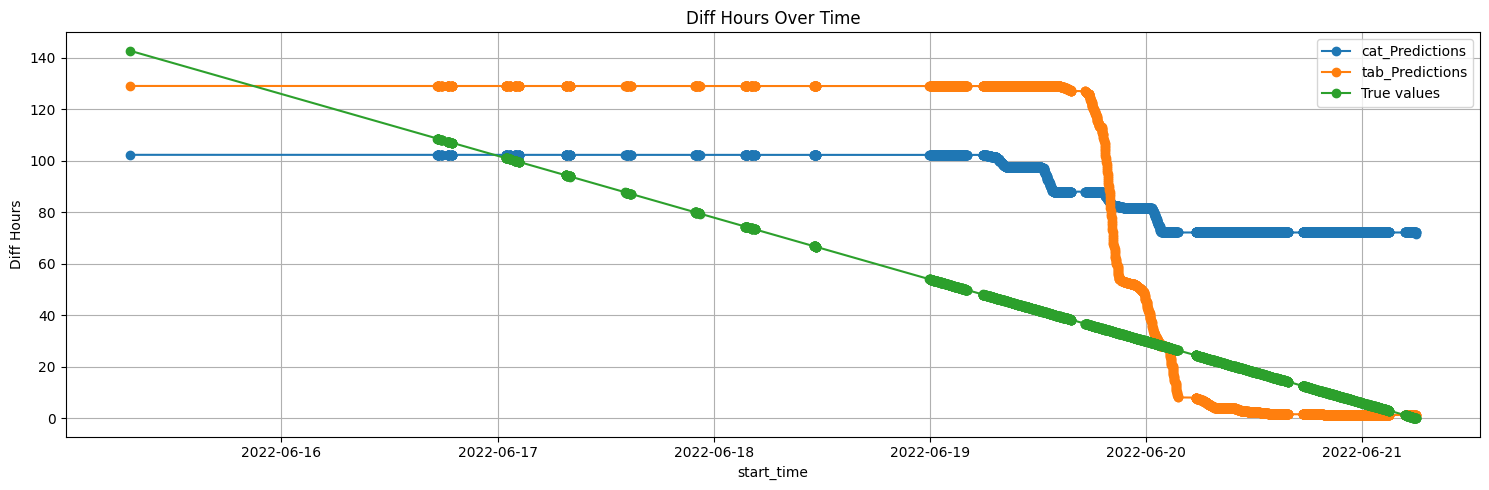

[13,17]
(14735, 33) (14735, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4078.30814| val_0_mse: 3332.4671|  0:00:00s
epoch 1  | loss: 2547.19645| val_0_mse: 1370.18742|  0:00:02s
epoch 2  | loss: 1164.36366| val_0_mse: 722.0077|  0:00:03s
epoch 3  | loss: 595.05395| val_0_mse: 604.67653|  0:00:04s
epoch 4  | loss: 434.43031| val_0_mse: 313.67764|  0:00:05s
epoch 5  | loss: 319.41216| val_0_mse: 204.1837|  0:00:06s
epoch 6  | loss: 250.73524| val_0_mse: 142.68563|  0:00:08s
epoch 7  | loss: 199.21377| val_0_mse: 103.85845|  0:00:09s
epoch 8  | loss: 176.56634| val_0_mse: 70.21882|  0:00:10s
epoch 9  | loss: 172.71874| val_0_mse: 154.21972|  0:00:11s
epoch 10 | loss: 146.60704| val_0_mse: 81.77964|  0:00:12s
epoch 11 | loss: 106.12531| val_0_mse: 248.05201|  0:00:13s
epoch 12 | loss: 130.339 | val_0_mse: 154.4043|  0:00:14s
epoch 13 | loss: 99.08168| val_0_mse: 81.8044 |  0:00:15s
epoch 14 | loss: 95.72271| val_0_mse: 47.20364|  0:00:16s
epoch 15 | loss: 77.51508| val_0_mse: 40.82954|  0:00:17s
epoch 16 | loss: 77.80544| val_0_mse: 44.55319| 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
17
(199, 33) (199, 1)
cat_rmse: 4441.484939236423
cat_rmse1: 65.6591939246761
cat_rmse2: 69.06879369778063
tab_rmse: 2789.5038329723934
tab_rmse1: 51.66087435862253
tab_rmse2: 55.624108180108664


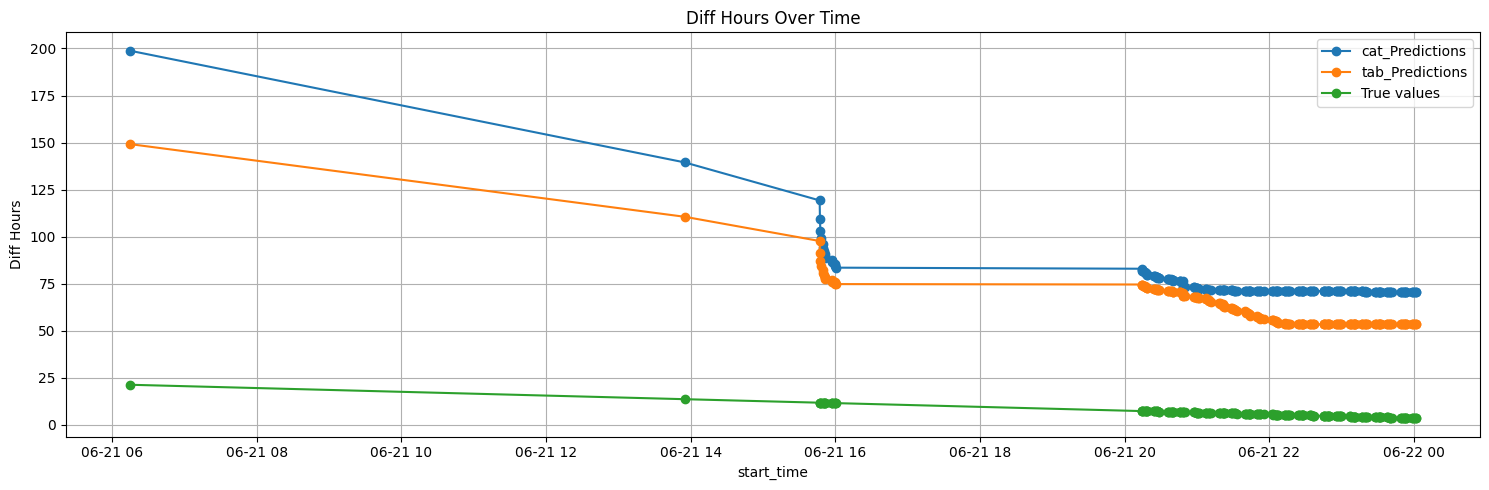

[14,18]
(9692, 33) (9692, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3018.63084| val_0_mse: 2566.98675|  0:00:00s
epoch 1  | loss: 2279.66059| val_0_mse: 1695.14928|  0:00:01s
epoch 2  | loss: 1518.53873| val_0_mse: 1127.42944|  0:00:01s
epoch 3  | loss: 872.34809| val_0_mse: 551.48315|  0:00:02s
epoch 4  | loss: 475.37934| val_0_mse: 365.43062|  0:00:03s
epoch 5  | loss: 331.2134| val_0_mse: 360.38931|  0:00:03s
epoch 6  | loss: 244.47958| val_0_mse: 324.91753|  0:00:04s
epoch 7  | loss: 196.6429| val_0_mse: 184.78097|  0:00:05s
epoch 8  | loss: 169.5218| val_0_mse: 141.77374|  0:00:05s
epoch 9  | loss: 156.25784| val_0_mse: 121.89982|  0:00:06s
epoch 10 | loss: 128.30506| val_0_mse: 159.11672|  0:00:07s
epoch 11 | loss: 133.01908| val_0_mse: 201.3131|  0:00:07s
epoch 12 | loss: 105.96823| val_0_mse: 101.43448|  0:00:08s
epoch 13 | loss: 90.6302 | val_0_mse: 53.91616|  0:00:09s
epoch 14 | loss: 81.42279| val_0_mse: 79.49734|  0:00:10s
epoch 15 | loss: 65.34682| val_0_mse: 40.15565|  0:00:11s
epoch 16 | loss: 48.65744| val_0_mse: 31.334

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
18
(267, 33) (267, 1)
cat_rmse: 3.243650423278104
cat_rmse1: 1.89624498907157
cat_rmse2: 1.7014155261430837
tab_rmse: 6.443292017023583
tab_rmse1: 3.242854224828512
tab_rmse2: 1.5518307403830545


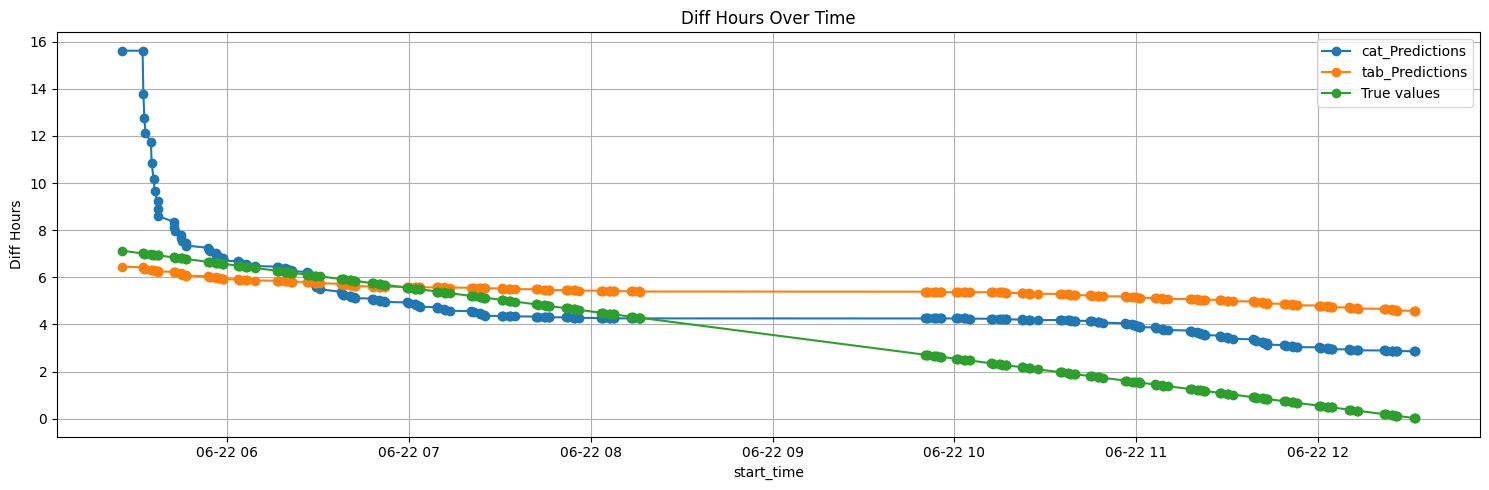

[15,19]
(8631, 33) (8631, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3351.21392| val_0_mse: 3119.57901|  0:00:00s
epoch 1  | loss: 2582.0388| val_0_mse: 1810.19441|  0:00:01s
epoch 2  | loss: 1753.24385| val_0_mse: 1124.58521|  0:00:01s
epoch 3  | loss: 1005.04813| val_0_mse: 644.50537|  0:00:02s
epoch 4  | loss: 575.14849| val_0_mse: 522.89204|  0:00:02s
epoch 5  | loss: 455.53726| val_0_mse: 436.21362|  0:00:03s
epoch 6  | loss: 380.51583| val_0_mse: 359.49543|  0:00:04s
epoch 7  | loss: 314.14929| val_0_mse: 248.31584|  0:00:04s
epoch 8  | loss: 238.21777| val_0_mse: 165.02432|  0:00:05s
epoch 9  | loss: 192.8341| val_0_mse: 320.63622|  0:00:06s
epoch 10 | loss: 126.00052| val_0_mse: 77.6802 |  0:00:06s
epoch 11 | loss: 130.73913| val_0_mse: 117.02206|  0:00:07s
epoch 12 | loss: 82.17937| val_0_mse: 32.21348|  0:00:09s
epoch 13 | loss: 62.01017| val_0_mse: 46.07996|  0:00:09s
epoch 14 | loss: 53.01161| val_0_mse: 26.034  |  0:00:10s
epoch 15 | loss: 41.88681| val_0_mse: 109.91396|  0:00:10s
epoch 16 | loss: 58.92669| val_0_mse: 36.70

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
19
(3443, 33) (3443, 1)
cat_rmse: 1051.2256658784477
cat_rmse1: 25.83344394789366
cat_rmse2: 41.64952368601617
tab_rmse: 2406.580644159563
tab_rmse1: 40.023166581502664
tab_rmse2: 61.96280599098571


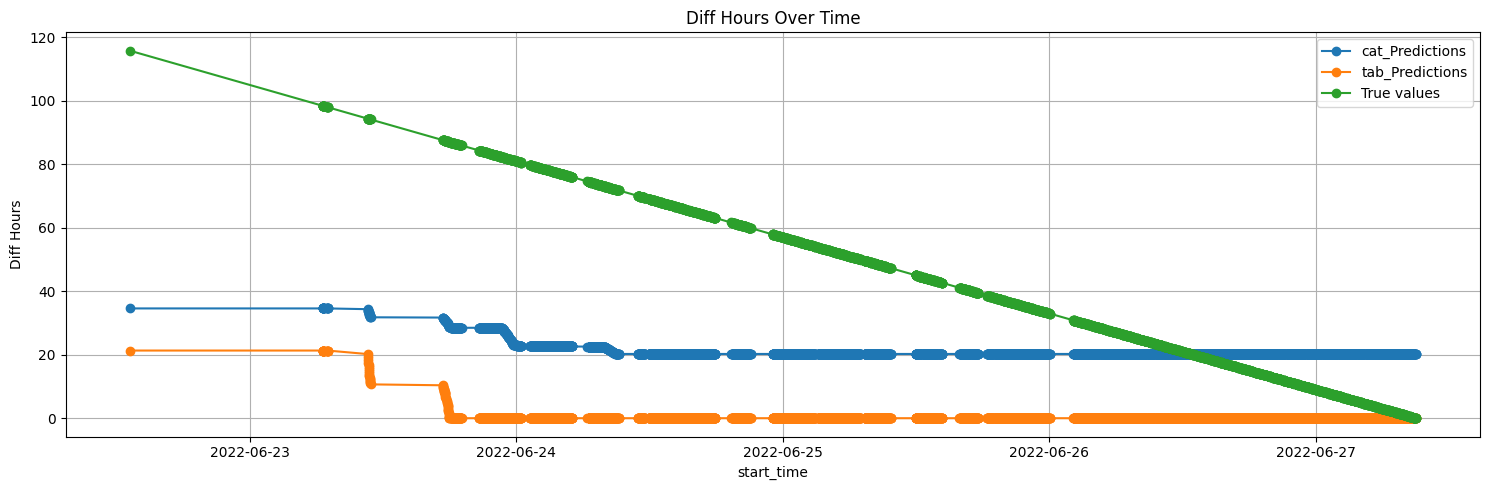

[16,20]
(11452, 33) (11452, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3044.30619| val_0_mse: 2568.26832|  0:00:00s
epoch 1  | loss: 1977.20506| val_0_mse: 1122.87555|  0:00:01s
epoch 2  | loss: 866.54533| val_0_mse: 332.64301|  0:00:02s
epoch 3  | loss: 262.28818| val_0_mse: 210.07898|  0:00:03s
epoch 4  | loss: 148.29965| val_0_mse: 108.98861|  0:00:04s
epoch 5  | loss: 95.12487| val_0_mse: 71.17587|  0:00:05s
epoch 6  | loss: 68.21266| val_0_mse: 48.34402|  0:00:06s
epoch 7  | loss: 50.70838| val_0_mse: 31.6302 |  0:00:07s
epoch 8  | loss: 35.7114 | val_0_mse: 32.66673|  0:00:08s
epoch 9  | loss: 29.2674 | val_0_mse: 26.07681|  0:00:09s
epoch 10 | loss: 22.86994| val_0_mse: 15.31463|  0:00:10s
epoch 11 | loss: 26.15412| val_0_mse: 11.32218|  0:00:10s
epoch 12 | loss: 21.32898| val_0_mse: 8.76433 |  0:00:11s
epoch 13 | loss: 19.72195| val_0_mse: 6.89956 |  0:00:12s
epoch 14 | loss: 19.09   | val_0_mse: 6.83529 |  0:00:13s
epoch 15 | loss: 16.32611| val_0_mse: 7.81203 |  0:00:13s
epoch 16 | loss: 14.84075| val_0_mse: 6.04849 |  0:00:14s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
20
(3117, 33) (3117, 1)
cat_rmse: 419.9843300163817
cat_rmse1: 15.349324207711371
cat_rmse2: 24.715979638113424
tab_rmse: 78.56504482861483
tab_rmse1: 9.028722489119355
tab_rmse2: 8.689531741950608


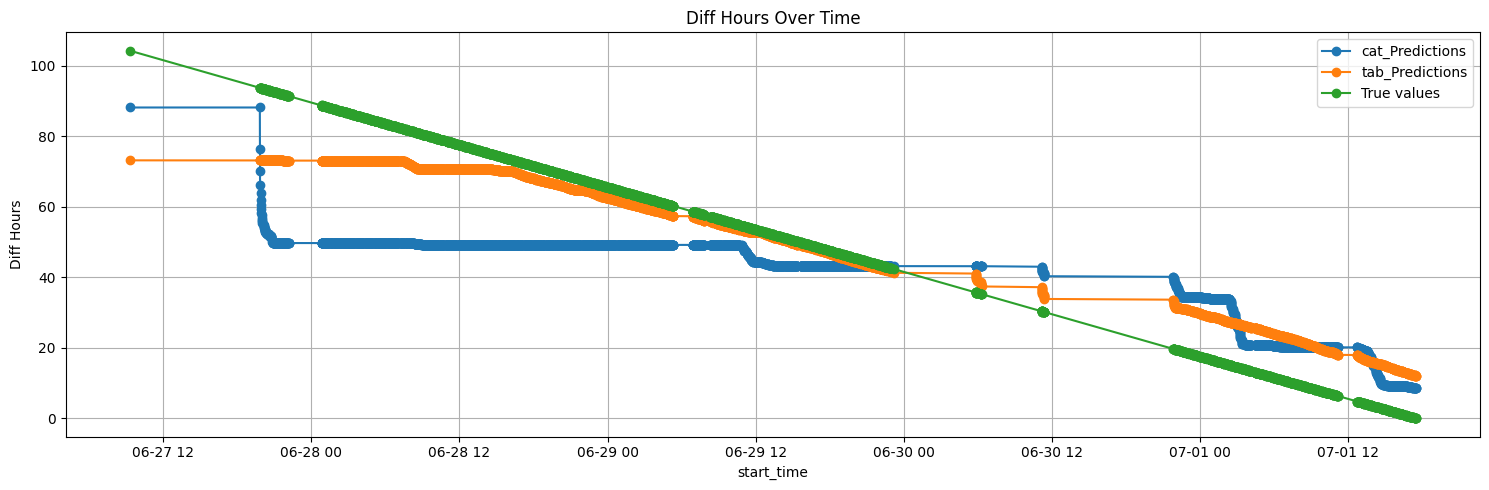

[17,21]
(9374, 33) (9374, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2114.43078| val_0_mse: 1928.17136|  0:00:00s
epoch 1  | loss: 1471.22329| val_0_mse: 960.98278|  0:00:01s
epoch 2  | loss: 752.55061| val_0_mse: 363.27473|  0:00:02s
epoch 3  | loss: 268.02659| val_0_mse: 190.61678|  0:00:02s
epoch 4  | loss: 118.03075| val_0_mse: 122.12394|  0:00:03s
epoch 5  | loss: 68.12956| val_0_mse: 80.59499|  0:00:04s
epoch 6  | loss: 39.48496| val_0_mse: 45.39533|  0:00:04s
epoch 7  | loss: 30.37188| val_0_mse: 20.36255|  0:00:05s
epoch 8  | loss: 28.10052| val_0_mse: 21.04974|  0:00:06s
epoch 9  | loss: 25.4154 | val_0_mse: 13.37138|  0:00:07s
epoch 10 | loss: 20.28572| val_0_mse: 19.44506|  0:00:08s
epoch 11 | loss: 16.21422| val_0_mse: 11.8794 |  0:00:08s
epoch 12 | loss: 15.80633| val_0_mse: 14.28326|  0:00:09s
epoch 13 | loss: 16.00708| val_0_mse: 9.14865 |  0:00:10s
epoch 14 | loss: 17.66801| val_0_mse: 9.74509 |  0:00:11s
epoch 15 | loss: 17.16962| val_0_mse: 6.93144 |  0:00:11s
epoch 16 | loss: 15.27224| val_0_mse: 6.4558  |  0:00:12s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
21
(1, 33) (1, 1)
[18,22]
(7027, 33) (7027, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2451.80665| val_0_mse: 2370.56766|  0:00:00s
epoch 1  | loss: 2018.29974| val_0_mse: 1716.96215|  0:00:00s
epoch 2  | loss: 1510.73476| val_0_mse: 1054.62869|  0:00:01s
epoch 3  | loss: 984.60417| val_0_mse: 654.11677|  0:00:01s
epoch 4  | loss: 506.81625| val_0_mse: 246.43159|  0:00:02s
epoch 5  | loss: 206.49145| val_0_mse: 196.26766|  0:00:02s
epoch 6  | loss: 116.73544| val_0_mse: 128.43832|  0:00:03s
epoch 7  | loss: 80.4992 | val_0_mse: 55.3224 |  0:00:03s
epoch 8  | loss: 43.1273 | val_0_mse: 40.57245|  0:00:04s
epoch 9  | loss: 33.87764| val_0_mse: 26.85338|  0:00:05s
epoch 10 | loss: 33.79539| val_0_mse: 15.06969|  0:00:05s
epoch 11 | loss: 25.72341| val_0_mse: 19.40449|  0:00:06s
epoch 12 | loss: 24.2952 | val_0_mse: 23.0303 |  0:00:07s
epoch 13 | loss: 20.98123| val_0_mse: 8.18058 |  0:00:07s
epoch 14 | loss: 17.73019| val_0_mse: 12.48596|  0:00:08s
epoch 15 | loss: 19.14896| val_0_mse: 6.57316 |  0:00:09s
epoch 16 | loss: 15.47796| val_0_mse: 9.36649 |  0:0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab_rmse: 5881.470327320665
tab_rmse1: 77.0438475460157
tab_rmse2: 76.10106412194403


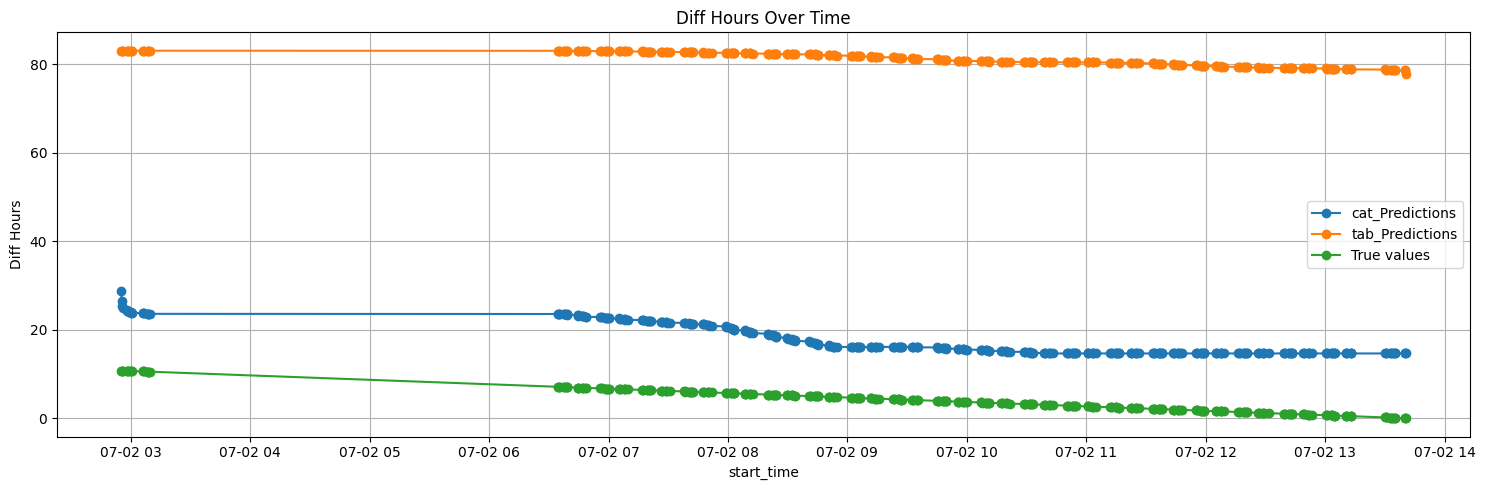

[19,23]
(7168, 33) (7168, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2394.46882| val_0_mse: 2367.43375|  0:00:00s
epoch 1  | loss: 1974.4698| val_0_mse: 1770.89961|  0:00:01s
epoch 2  | loss: 1473.39343| val_0_mse: 1132.13023|  0:00:02s
epoch 3  | loss: 932.17376| val_0_mse: 593.35918|  0:00:02s
epoch 4  | loss: 441.98197| val_0_mse: 226.818 |  0:00:03s
epoch 5  | loss: 149.26131| val_0_mse: 125.70174|  0:00:04s
epoch 6  | loss: 65.47612| val_0_mse: 45.0464 |  0:00:04s
epoch 7  | loss: 44.42145| val_0_mse: 60.50332|  0:00:05s
epoch 8  | loss: 28.76236| val_0_mse: 17.13616|  0:00:05s
epoch 9  | loss: 23.45121| val_0_mse: 16.01532|  0:00:05s
epoch 10 | loss: 19.09624| val_0_mse: 8.26481 |  0:00:06s
epoch 11 | loss: 17.22085| val_0_mse: 9.52799 |  0:00:06s
epoch 12 | loss: 16.91596| val_0_mse: 7.60161 |  0:00:07s
epoch 13 | loss: 12.18   | val_0_mse: 4.76061 |  0:00:07s
epoch 14 | loss: 11.43579| val_0_mse: 4.54727 |  0:00:08s
epoch 15 | loss: 10.67286| val_0_mse: 6.20589 |  0:00:08s
epoch 16 | loss: 9.82809 | val_0_mse: 3.35327 |  0:00:09

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


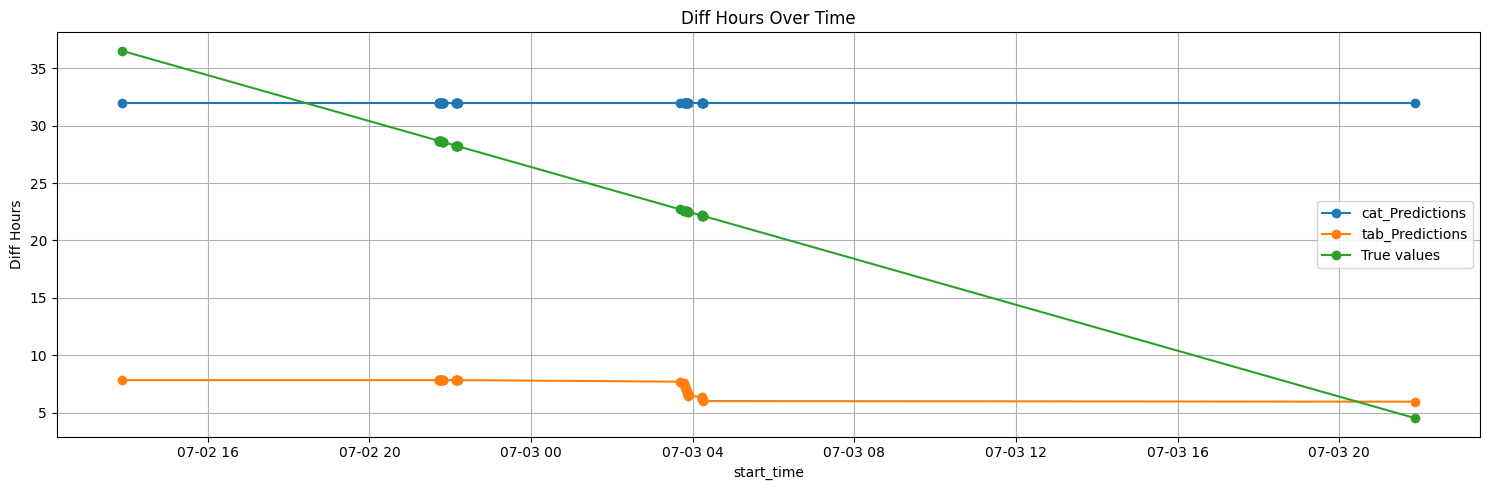

[20,24]
(6940, 33) (6940, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2499.07554| val_0_mse: 2441.98354|  0:00:00s
epoch 1  | loss: 2035.83989| val_0_mse: 1710.10647|  0:00:01s
epoch 2  | loss: 1491.39865| val_0_mse: 944.57972|  0:00:01s
epoch 3  | loss: 934.40582| val_0_mse: 519.87763|  0:00:02s
epoch 4  | loss: 452.85577| val_0_mse: 317.23422|  0:00:02s
epoch 5  | loss: 196.72456| val_0_mse: 153.45216|  0:00:03s
epoch 6  | loss: 98.00919| val_0_mse: 86.05138|  0:00:04s
epoch 7  | loss: 51.51476| val_0_mse: 48.85488|  0:00:04s
epoch 8  | loss: 30.93352| val_0_mse: 22.38611|  0:00:05s
epoch 9  | loss: 23.52885| val_0_mse: 19.03133|  0:00:06s
epoch 10 | loss: 20.05231| val_0_mse: 15.00698|  0:00:06s
epoch 11 | loss: 16.79768| val_0_mse: 11.17206|  0:00:07s
epoch 12 | loss: 12.79205| val_0_mse: 9.52745 |  0:00:07s
epoch 13 | loss: 16.42718| val_0_mse: 9.42829 |  0:00:08s
epoch 14 | loss: 17.42263| val_0_mse: 7.42742 |  0:00:08s
epoch 15 | loss: 13.79894| val_0_mse: 5.39273 |  0:00:09s
epoch 16 | loss: 15.08812| val_0_mse: 5.26302 |  0:00:0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
import torch
params = {'border_count': 8,
 'depth': 10,
 'learning_rate': 0.01,
 'l2_leaf_reg': 9,
 'iterations': 6000}

params_tab = {
    'n_d': 10,
    'n_a': 10,
    'n_steps': 3,
    'gamma': 1.3,
    'cat_dims': [],  # 범주형 변수가 없음을 나타냄
    'cat_emb_dim': 1,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': "entmax",
    'scheduler_params': dict(mode="min",
                             patience=5,
                             min_lr=1e-5,
                             factor=0.9,),
    'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
    'verbose': 1
}
def ml_model(train_size):
    X,y = xy_split(df)
    for x in range(X['TA_tm_before'].nunique()-1):
        scaler = StandardScaler()
        k = x-train_size
        if k <= 0:
            k = 0
        print(f'[{k},{x}]')
        X_Train = X.loc[X[X['TA_tm_before'] == X['TA_tm_before'].unique()[k]].head(1).index.item():X[X['TA_tm_before'] == X['TA_tm_before'].unique()[x]].tail(1).index.item(),:]
        train_drop = X_Train[drop_col]
        X_Train= X_Train.drop(columns = drop_col)
        X_Train[standard_li] = scaler.fit_transform(X_Train[standard_li])
        Y_Train = y[y.index.isin(X_Train.index)]
        X_Train.reset_index(drop=True, inplace=True)
        Y_Train.reset_index(drop=True, inplace=True)
        print(X_Train.shape,Y_Train.shape)
        if len(X_Train) > 1:
            cat_f = CatBoostRegressor(**params)
            print('cat train start')
            cat_f.fit(X_Train,Y_Train,verbose = 1)
            print('cat train finish')
            print('tab train start')
            model = TabNetRegressor(**params_tab)
            model.fit(
                X_Train.values,
                Y_Train.values,
                eval_set=[(X_Train.values, Y_Train.values)],
                eval_metric=['mse'],
                max_epochs=300,
                patience=20,
                batch_size=1024,
                virtual_batch_size=128,
                num_workers=0,
                drop_last=False,
                from_unsupervised=None,
            )
            print('tab train start')

        print(x)
        X_Test = X[X['TA_tm_before'] == X['TA_tm_before'].unique()[x+1]]
        test_drop = X_Test[drop_col]
        X_Test= X_Test.drop(columns = drop_col)
        test_drop.reset_index(drop = True, inplace = True)
        X_Test[standard_li] = scaler.transform(X_Test[standard_li])
        Y_Test = y[y.index.isin(X_Test.index)]

        X_Test.reset_index(drop=True, inplace=True)
        Y_Test.reset_index(drop=True, inplace=True)
        print(X_Test.shape,Y_Test.shape)
        if len(X_Test)>25:
            catf_pred = cat_f.predict(X_Test)
            Y_Test_series = Y_Test['diff_hours']
            catf_pred_series = pd.Series(catf_pred)
            for i in range(0, len(catf_pred_series)-1):
                if catf_pred_series[i+1] > catf_pred_series[i]:
                    catf_pred_series[i+1] = catf_pred_series[i]
            catf_pred_series[catf_pred_series < 0] = 0
            catf_rmse1 = mm_adj_rmse(Y_Test_series, catf_pred_series)
            catf_rmse2 = mm_adj_rmse2(Y_Test_series, catf_pred_series)
            catf_rmse = mean_squared_error(Y_Test_series, catf_pred_series)

            print('cat_rmse:',catf_rmse)
            print('cat_rmse1:',catf_rmse1)
            print('cat_rmse2:',catf_rmse2)
            tab_pred = model.predict(X_Test.values)
            Y_Test_series = Y_Test['diff_hours']
            tab_pred_series = pd.Series(tab_pred.flatten())
            for i in range(0, len(tab_pred_series)-1):
                if tab_pred_series[i+1] > tab_pred_series[i]:
                    tab_pred_series[i+1] = tab_pred_series[i]
            tab_pred_series[tab_pred_series < 0] = 0
            tab_rmse1 = mm_adj_rmse(Y_Test_series, tab_pred_series)
            tab_rmse2 = mm_adj_rmse2(Y_Test_series, tab_pred_series)
            tab_rmse = mean_squared_error(Y_Test_series, tab_pred_series)


            final_pred_series = []
            for tab_pred, cat_pred in zip(tab_pred_series, catf_pred_series):
                if min(tab_pred, cat_pred) > 25:
                    final_pred_series.append((tab_pred + cat_pred) / 2)
                else:
                    final_pred_series.append(min(tab_pred, cat_pred))

            final_pred_series = pd.Series(final_pred_series)
            final_pred_series[final_pred_series < 0] = 0
            ml_ensemble_rmse1 = mm_adj_rmse(Y_Test_series, final_pred_series)
            ml_ensemble_rmse2 = mm_adj_rmse2(Y_Test_series, final_pred_series)

            print('tab_rmse:',tab_rmse)
            print('tab_rmse1:',tab_rmse1)
            print('tab_rmse2:',tab_rmse2)
            print('ensemble_rmse1:',ml_ensemble_rmse1)
            print('ensemble_rmse2:',ml_ensemble_rmse2)

            test_drop['start_dt_tm'] = pd.to_datetime(test_drop['start_dt_tm'])
            test_drop.sort_values('start_dt_tm', inplace=True)
            plt.figure(figsize=(15, 5))
            catf_pred_series = catf_pred_series.rolling(window=25, min_periods=1).mean()
            tab_pred_series = tab_pred_series.rolling(window=25, min_periods=1).mean()
            # plt.plot(test_drop.loc[25:,'start_dt_tm'], catf_pred_series[25:], marker='o',linestyle='-', label='Predictions')
            # plt.plot(test_drop.loc[25:,'start_dt_tm'], Y_Test_series[25:], marker='o',linestyle='-', label='True values')
            plt.plot(test_drop.loc[:,'start_dt_tm'], catf_pred_series[:], marker='o',linestyle='-', label='cat_Predictions')
            plt.plot(test_drop.loc[:,'start_dt_tm'], tab_pred_series[:], marker='o',linestyle='-', label='tab_Predictions')
            plt.plot(test_drop.loc[:,'start_dt_tm'], Y_Test_series[:], marker='o',linestyle='-', label='True values')
            plt.title(f'Diff Hours Over Time')
            plt.xlabel('start_time')
            plt.ylabel('Diff Hours')

            plt.grid(True)
            plt.legend()

            plt.tight_layout()
            plt.show()

['STEP_NM', 'TA_tm_before', 'start_dt_tm', 'max_val_6', 'max_val_7', 'max_val_9', 'max_val_17', 'max_val_18', 'mean_val_5', 'mean_val_6', 'mean_val_7', 'mean_val_8', 'mean_val_9', 'mean_val_17', 'mean_val_18', 'median_val_6', 'median_val_7', 'median_val_9', 'median_val_17', 'median_val_18', 'min_val_5', 'min_val_6', 'min_val_7', 'min_val_8', 'min_val_9', 'min_val_11', 'min_val_12', 'min_val_17', 'min_val_18', 'stddev_val_10', 'stddev_val_17', 'stddev_val_18', 'rep_hours', 'step_hours', 'last_hours', 'sequence', 'diff_hours']
[0,0]
(6605, 33) (6605, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8427.99747| val_0_mse: 8026.87078|  0:00:01s
epoch 1  | loss: 7414.20625| val_0_mse: 6412.93163|  0:00:02s
epoch 2  | loss: 6095.14006| val_0_mse: 4265.4178|  0:00:02s
epoch 3  | loss: 4626.07012| val_0_mse: 2647.03684|  0:00:03s
epoch 4  | loss: 3122.40597| val_0_mse: 1483.99637|  0:00:03s
epoch 5  | loss: 1738.15915| val_0_mse: 525.94645|  0:00:03s
epoch 6  | loss: 685.67632| val_0_mse: 308.55367|  0:00:04s
epoch 7  | loss: 144.44087| val_0_mse: 172.51049|  0:00:04s
epoch 8  | loss: 87.72939| val_0_mse: 233.7415|  0:00:05s
epoch 9  | loss: 62.72316| val_0_mse: 53.80296|  0:00:06s
epoch 10 | loss: 36.17347| val_0_mse: 18.56377|  0:00:07s
epoch 11 | loss: 32.05881| val_0_mse: 22.32075|  0:00:07s
epoch 12 | loss: 26.93965| val_0_mse: 11.33701|  0:00:08s
epoch 13 | loss: 37.57231| val_0_mse: 11.61487|  0:00:08s
epoch 14 | loss: 29.12567| val_0_mse: 11.65664|  0:00:09s
epoch 15 | loss: 30.38408| val_0_mse: 5.14993 |  0:00:09s
epoch 16 | loss: 23.2814 | val_0_mse: 10.94834

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
0
(805, 33) (805, 1)
cat_rmse: 6530.59012452727
cat_rmse1: 82.47204656986807
cat_rmse2: 77.20283521522433
tab_rmse: 110.52951432798483
tab_rmse1: 8.615409900343264
tab_rmse2: 13.671765670542516
ensemble_rmse1: 8.615409900343264
ensemble_rmse2: 13.671765670542516


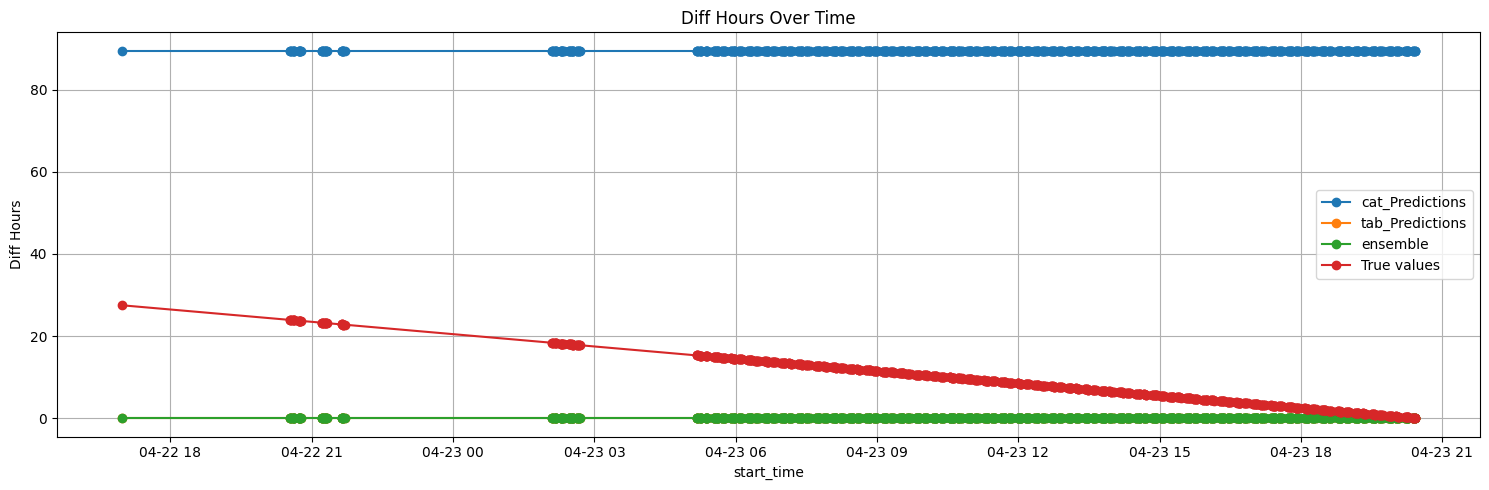

[0,1]
(7410, 33) (7410, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7451.42676| val_0_mse: 7193.48363|  0:00:01s
epoch 1  | loss: 6301.49279| val_0_mse: 4954.66354|  0:00:01s
epoch 2  | loss: 4890.18112| val_0_mse: 2873.50943|  0:00:01s
epoch 3  | loss: 3227.47215| val_0_mse: 1669.30035|  0:00:02s
epoch 4  | loss: 1639.94214| val_0_mse: 646.11867|  0:00:02s
epoch 5  | loss: 503.08024| val_0_mse: 231.44081|  0:00:03s
epoch 6  | loss: 121.13063| val_0_mse: 139.31434|  0:00:03s
epoch 7  | loss: 88.5715 | val_0_mse: 102.04213|  0:00:04s
epoch 8  | loss: 65.99277| val_0_mse: 32.00448|  0:00:04s
epoch 9  | loss: 37.46037| val_0_mse: 31.84952|  0:00:05s
epoch 10 | loss: 40.84521| val_0_mse: 44.69875|  0:00:05s
epoch 11 | loss: 36.44584| val_0_mse: 15.79538|  0:00:06s
epoch 12 | loss: 25.94378| val_0_mse: 10.12671|  0:00:07s
epoch 13 | loss: 28.36728| val_0_mse: 28.62339|  0:00:08s
epoch 14 | loss: 31.82069| val_0_mse: 9.95723 |  0:00:08s
epoch 15 | loss: 22.51637| val_0_mse: 6.30022 |  0:00:09s
epoch 16 | loss: 17.89974| val_0_mse: 5.76234 | 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
1
(1776, 33) (1776, 1)
cat_rmse: 12439.979762926085
cat_rmse1: 111.4549226859837
cat_rmse2: 111.63739548187252
tab_rmse: 17125.905127730268
tab_rmse1: 132.11462233590797
tab_rmse2: 129.2379786072341
ensemble_rmse1: 121.76010485187727
ensemble_rmse2: 120.39394141606505


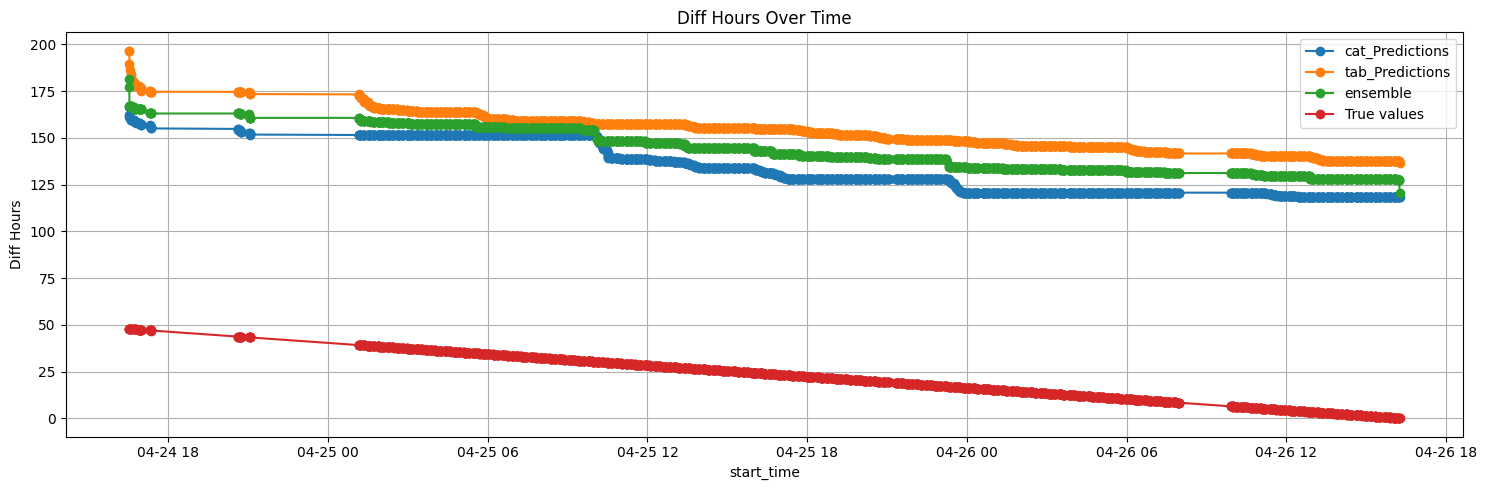

[0,2]
(9186, 33) (9186, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5994.7117| val_0_mse: 5740.05675|  0:00:00s
epoch 1  | loss: 4715.27191| val_0_mse: 3479.63731|  0:00:01s
epoch 2  | loss: 3188.95402| val_0_mse: 1882.73083|  0:00:01s
epoch 3  | loss: 1629.24924| val_0_mse: 822.54508|  0:00:02s
epoch 4  | loss: 532.90002| val_0_mse: 515.95689|  0:00:02s
epoch 5  | loss: 173.22423| val_0_mse: 108.94376|  0:00:03s
epoch 6  | loss: 74.88483| val_0_mse: 71.8532 |  0:00:05s
epoch 7  | loss: 66.37026| val_0_mse: 42.44173|  0:00:06s
epoch 8  | loss: 56.59157| val_0_mse: 29.43148|  0:00:07s
epoch 9  | loss: 59.88024| val_0_mse: 29.37321|  0:00:08s
epoch 10 | loss: 43.63183| val_0_mse: 17.91682|  0:00:08s
epoch 11 | loss: 38.56473| val_0_mse: 14.27731|  0:00:09s
epoch 12 | loss: 49.66298| val_0_mse: 16.5624 |  0:00:09s
epoch 13 | loss: 38.52664| val_0_mse: 14.35378|  0:00:10s
epoch 14 | loss: 40.58131| val_0_mse: 11.58298|  0:00:11s
epoch 15 | loss: 41.52989| val_0_mse: 12.37365|  0:00:11s
epoch 16 | loss: 34.43731| val_0_mse: 17.99306|  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


(2725, 33) (2725, 1)
cat_rmse: 441.45677149018974
cat_rmse1: 17.015600270182336
cat_rmse2: 24.928780505705884
tab_rmse: 1261.422731469199
tab_rmse1: 27.26856720160471
tab_rmse2: 43.30033221944319
ensemble_rmse1: 27.26856720160471
ensemble_rmse2: 43.30033221944319


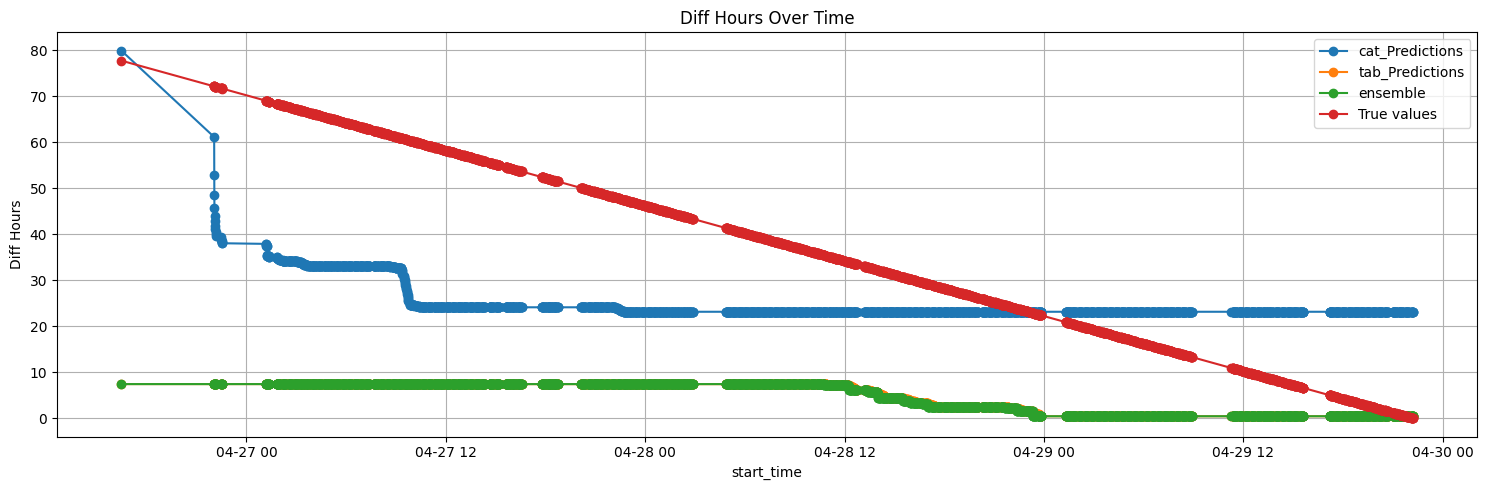

[0,3]
(11911, 33) (11911, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4740.62698| val_0_mse: 4120.14705|  0:00:00s
epoch 1  | loss: 3100.69229| val_0_mse: 1604.44768|  0:00:01s
epoch 2  | loss: 1312.57073| val_0_mse: 568.13386|  0:00:02s
epoch 3  | loss: 382.30835| val_0_mse: 263.58455|  0:00:03s
epoch 4  | loss: 156.21152| val_0_mse: 213.86555|  0:00:04s
epoch 5  | loss: 81.31202| val_0_mse: 61.90796|  0:00:05s
epoch 6  | loss: 67.79612| val_0_mse: 58.29616|  0:00:06s
epoch 7  | loss: 57.60958| val_0_mse: 27.12231|  0:00:07s
epoch 8  | loss: 47.64074| val_0_mse: 24.14797|  0:00:08s
epoch 9  | loss: 46.57702| val_0_mse: 20.68172|  0:00:09s
epoch 10 | loss: 40.3296 | val_0_mse: 20.50651|  0:00:09s
epoch 11 | loss: 28.84564| val_0_mse: 20.14987|  0:00:10s
epoch 12 | loss: 28.04508| val_0_mse: 15.1843 |  0:00:11s
epoch 13 | loss: 24.26982| val_0_mse: 11.68847|  0:00:12s
epoch 14 | loss: 25.98548| val_0_mse: 6.28963 |  0:00:13s
epoch 15 | loss: 28.76913| val_0_mse: 9.93044 |  0:00:13s
epoch 16 | loss: 25.09849| val_0_mse: 14.51461|  0:00:14s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
3
(223, 33) (223, 1)
cat_rmse: 422.62531186211567
cat_rmse1: 20.8763898622294
cat_rmse2: 19.44412164383034
tab_rmse: 1413.008648440506
tab_rmse1: 37.62065174773224
tab_rmse2: 37.486380917021975
ensemble_rmse1: 22.20559457408025
ensemble_rmse2: 24.254793307118383


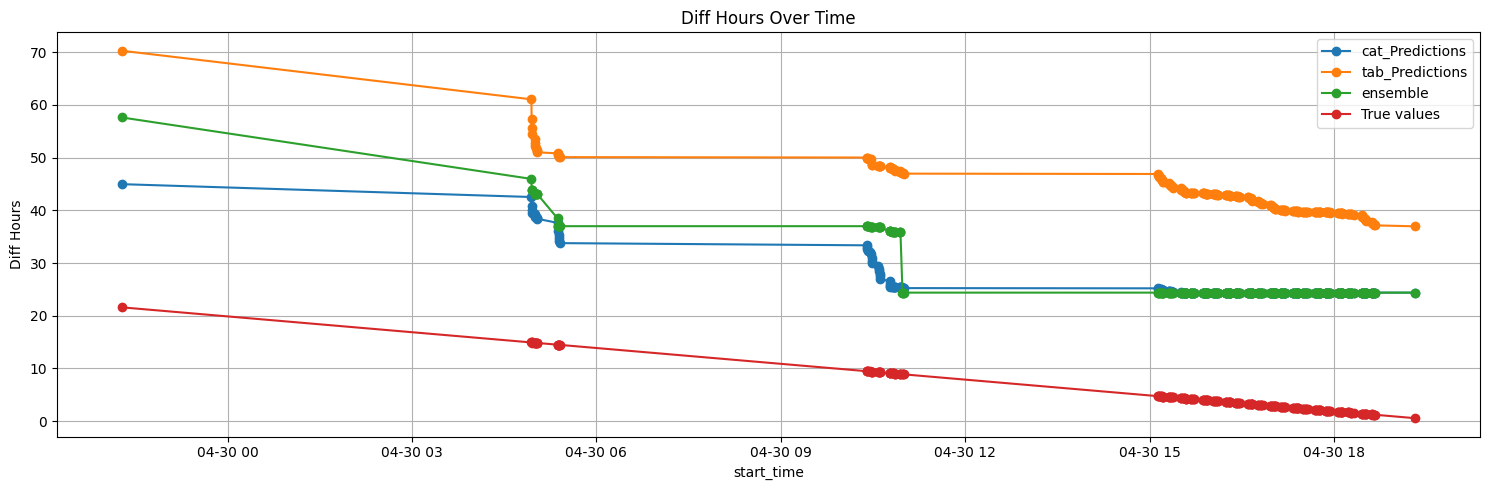

[0,4]
(12134, 33) (12134, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4696.58833| val_0_mse: 4268.24064|  0:00:00s
epoch 1  | loss: 3105.89839| val_0_mse: 2109.41484|  0:00:01s
epoch 2  | loss: 1381.43698| val_0_mse: 587.58993|  0:00:03s
epoch 3  | loss: 355.31977| val_0_mse: 637.86548|  0:00:04s
epoch 4  | loss: 125.79039| val_0_mse: 176.23336|  0:00:05s
epoch 5  | loss: 71.98927| val_0_mse: 44.37562|  0:00:06s
epoch 6  | loss: 54.50714| val_0_mse: 22.82597|  0:00:07s
epoch 7  | loss: 45.50676| val_0_mse: 17.28114|  0:00:08s
epoch 8  | loss: 33.54432| val_0_mse: 11.38821|  0:00:08s
epoch 9  | loss: 32.09285| val_0_mse: 32.10115|  0:00:09s
epoch 10 | loss: 28.826  | val_0_mse: 8.18383 |  0:00:10s
epoch 11 | loss: 23.78435| val_0_mse: 12.7929 |  0:00:11s
epoch 12 | loss: 19.39966| val_0_mse: 13.61743|  0:00:12s
epoch 13 | loss: 26.9139 | val_0_mse: 12.16498|  0:00:12s
epoch 14 | loss: 23.64864| val_0_mse: 10.95533|  0:00:13s
epoch 15 | loss: 24.43961| val_0_mse: 7.70652 |  0:00:14s
epoch 16 | loss: 25.49712| val_0_mse: 6.67817 |  0:00:15s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
4
(1071, 33) (1071, 1)
cat_rmse: 184.49069466755287
cat_rmse1: 9.96519631065879
cat_rmse2: 16.162588057746017
tab_rmse: 115.77311361011522
tab_rmse1: 7.777762561613734
tab_rmse2: 12.86744417998607
ensemble_rmse1: 9.965196441557296
ensemble_rmse2: 16.16661221823977


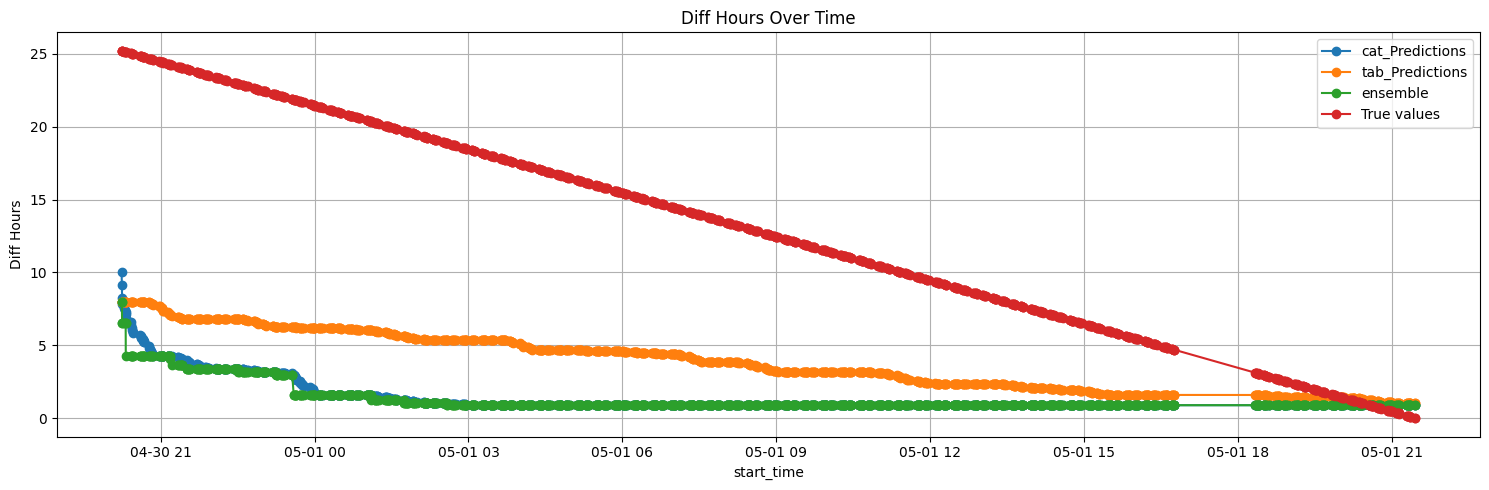

[0,5]
(13205, 33) (13205, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4189.59993| val_0_mse: 3240.85695|  0:00:00s
epoch 1  | loss: 2536.92157| val_0_mse: 1258.41809|  0:00:01s
epoch 2  | loss: 910.50511| val_0_mse: 378.85065|  0:00:03s
epoch 3  | loss: 229.36875| val_0_mse: 192.4063|  0:00:04s
epoch 4  | loss: 134.6646| val_0_mse: 89.55584|  0:00:05s
epoch 5  | loss: 80.24577| val_0_mse: 44.4856 |  0:00:06s
epoch 6  | loss: 56.05788| val_0_mse: 33.6888 |  0:00:07s
epoch 7  | loss: 50.47788| val_0_mse: 31.74517|  0:00:08s
epoch 8  | loss: 41.70777| val_0_mse: 26.88637|  0:00:09s
epoch 9  | loss: 34.15643| val_0_mse: 28.0309 |  0:00:09s
epoch 10 | loss: 33.8439 | val_0_mse: 19.42357|  0:00:10s
epoch 11 | loss: 35.09039| val_0_mse: 19.97921|  0:00:11s
epoch 12 | loss: 29.9047 | val_0_mse: 34.3031 |  0:00:12s
epoch 13 | loss: 31.61993| val_0_mse: 30.01406|  0:00:13s
epoch 14 | loss: 25.32002| val_0_mse: 14.96422|  0:00:14s
epoch 15 | loss: 22.02197| val_0_mse: 21.42285|  0:00:15s
epoch 16 | loss: 21.37837| val_0_mse: 22.38595|  0:00:16s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
5
(3258, 33) (3258, 1)
cat_rmse: 11115.903599227673
cat_rmse1: 62.09390872329875
cat_rmse2: 139.37324333314527
tab_rmse: 11097.674084611697
tab_rmse1: 62.28737025975225
tab_rmse2: 139.13399928767677
ensemble_rmse1: 62.40917868539351
ensemble_rmse2: 139.84650517440613


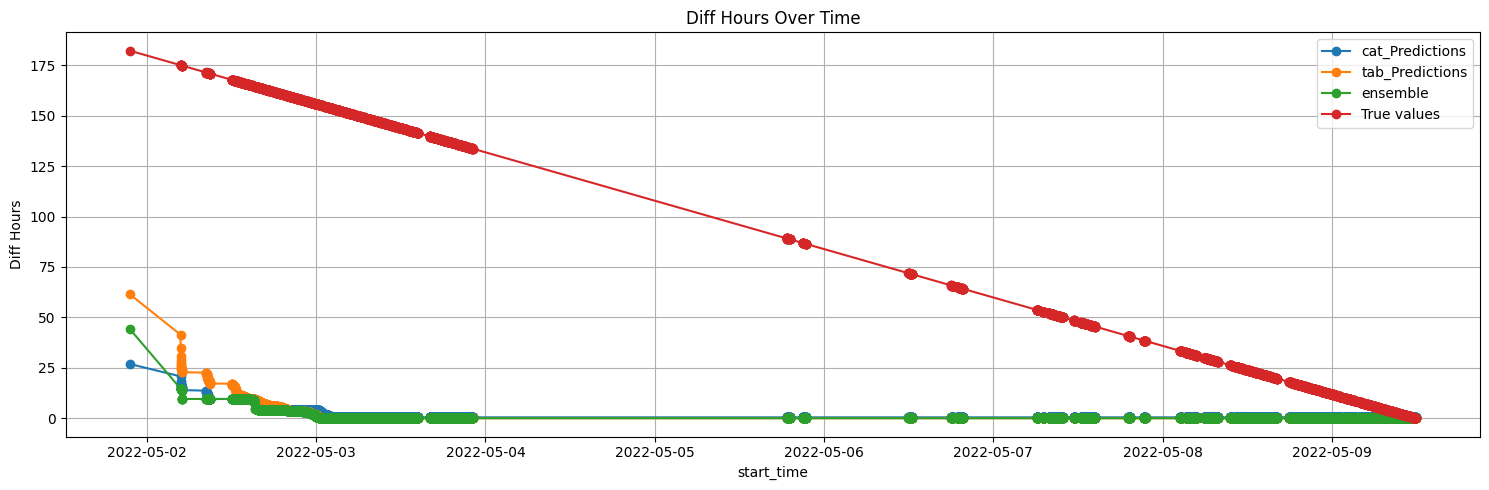

[0,6]
(16463, 33) (16463, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5307.83756| val_0_mse: 3803.37014|  0:00:01s
epoch 1  | loss: 3179.59129| val_0_mse: 1833.41894|  0:00:02s
epoch 2  | loss: 1470.00546| val_0_mse: 1083.26746|  0:00:03s
epoch 3  | loss: 960.64621| val_0_mse: 821.48663|  0:00:04s
epoch 4  | loss: 834.36325| val_0_mse: 788.29281|  0:00:05s
epoch 5  | loss: 758.80416| val_0_mse: 604.71146|  0:00:06s
epoch 6  | loss: 626.57855| val_0_mse: 504.42225|  0:00:07s
epoch 7  | loss: 518.6339| val_0_mse: 277.68323|  0:00:09s
epoch 8  | loss: 375.43294| val_0_mse: 300.05664|  0:00:10s
epoch 9  | loss: 218.34801| val_0_mse: 87.67013|  0:00:11s
epoch 10 | loss: 203.28043| val_0_mse: 158.18408|  0:00:13s
epoch 11 | loss: 235.56301| val_0_mse: 439.10986|  0:00:14s
epoch 12 | loss: 156.23118| val_0_mse: 158.31624|  0:00:15s
epoch 13 | loss: 101.14127| val_0_mse: 1036.85371|  0:00:17s
epoch 14 | loss: 118.22815| val_0_mse: 110.76056|  0:00:18s
epoch 15 | loss: 90.55867| val_0_mse: 52.8876 |  0:00:19s
epoch 16 | loss: 81.49981| val_0_mse:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
6
(66, 33) (66, 1)
cat_rmse: 3498.317613117553
cat_rmse1: 56.84623971784454
cat_rmse2: 59.893503121641004
tab_rmse: 52.01894992283951
tab_rmse1: 5.5463336226570155
tab_rmse2: 7.687816834168269
ensemble_rmse1: 5.5463336226570155
ensemble_rmse2: 7.687816834168269


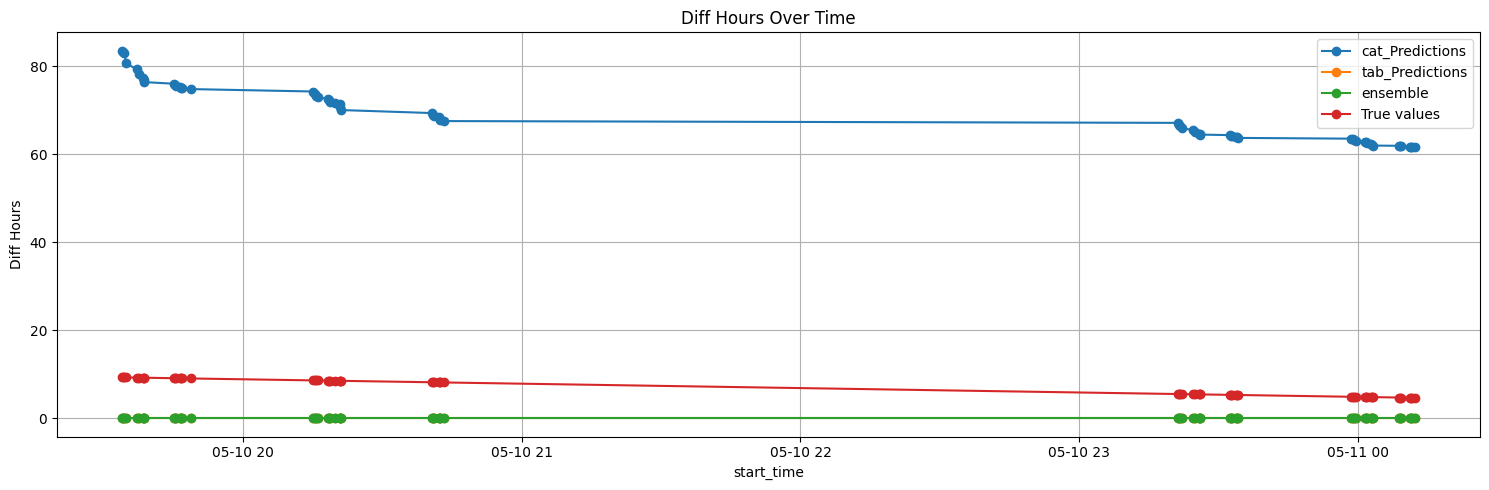

[0,7]
(16529, 33) (16529, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5320.80174| val_0_mse: 4274.88961|  0:00:01s
epoch 1  | loss: 3250.28057| val_0_mse: 1827.08754|  0:00:02s
epoch 2  | loss: 1561.41017| val_0_mse: 1191.73846|  0:00:03s
epoch 3  | loss: 986.43701| val_0_mse: 934.30161|  0:00:05s
epoch 4  | loss: 785.55122| val_0_mse: 941.65083|  0:00:06s
epoch 5  | loss: 725.90957| val_0_mse: 848.09327|  0:00:07s
epoch 6  | loss: 668.24068| val_0_mse: 808.67806|  0:00:08s
epoch 7  | loss: 582.2585| val_0_mse: 1091.52794|  0:00:10s
epoch 8  | loss: 555.72512| val_0_mse: 441.01492|  0:00:11s
epoch 9  | loss: 444.05743| val_0_mse: 584.33484|  0:00:12s
epoch 10 | loss: 339.4021| val_0_mse: 152.67991|  0:00:13s
epoch 11 | loss: 262.28104| val_0_mse: 293.88798|  0:00:14s
epoch 12 | loss: 187.34833| val_0_mse: 76.53162|  0:00:15s
epoch 13 | loss: 155.08755| val_0_mse: 240.98782|  0:00:16s
epoch 14 | loss: 152.13314| val_0_mse: 62.14079|  0:00:18s
epoch 15 | loss: 113.77268| val_0_mse: 152.55419|  0:00:19s
epoch 16 | loss: 96.08545| val_0_mse:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
7
(597, 33) (597, 1)
cat_rmse: 309.11828809830905
cat_rmse1: 19.460015512282215
cat_rmse2: 15.844494134677808
tab_rmse: 96.48417379197528
tab_rmse1: 7.244061623783886
tab_rmse2: 11.541902225554116
ensemble_rmse1: 7.244061623783886
ensemble_rmse2: 11.541902225554116


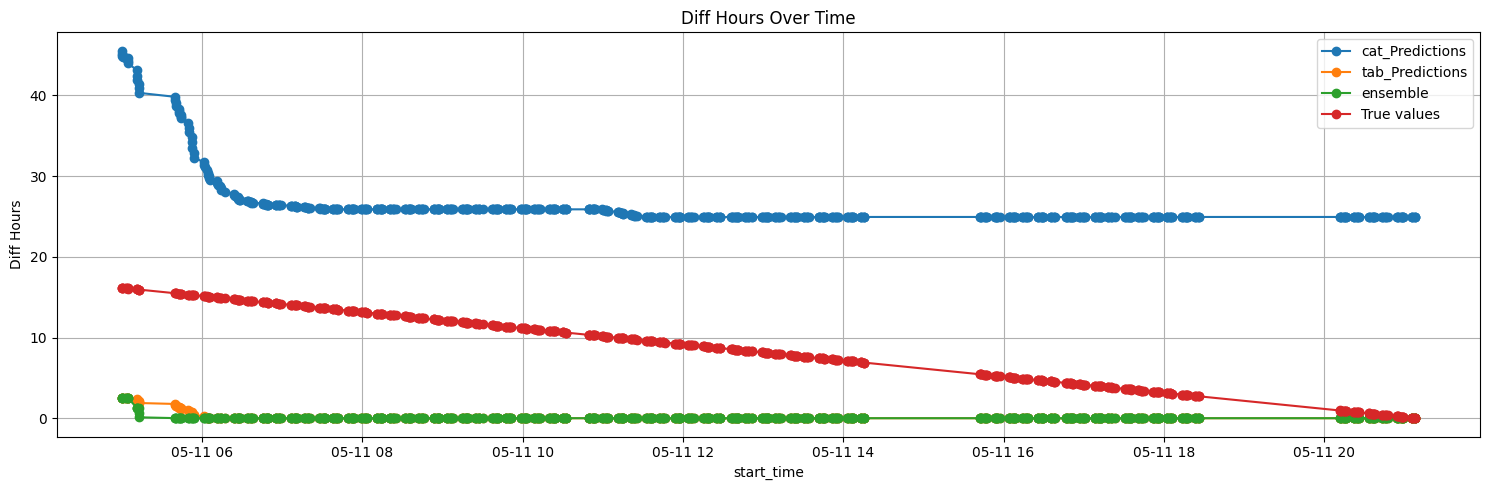

[0,8]
(17126, 33) (17126, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5097.97179| val_0_mse: 3842.80757|  0:00:01s
epoch 1  | loss: 2998.63366| val_0_mse: 1797.32738|  0:00:02s
epoch 2  | loss: 1507.52468| val_0_mse: 1149.05097|  0:00:03s
epoch 3  | loss: 1057.05991| val_0_mse: 924.45448|  0:00:04s
epoch 4  | loss: 810.58554| val_0_mse: 695.52459|  0:00:05s
epoch 5  | loss: 713.1648| val_0_mse: 685.19382|  0:00:06s
epoch 6  | loss: 628.37775| val_0_mse: 650.52553|  0:00:07s
epoch 7  | loss: 541.13108| val_0_mse: 393.2917|  0:00:08s
epoch 8  | loss: 484.02336| val_0_mse: 334.21945|  0:00:10s
epoch 9  | loss: 332.61761| val_0_mse: 513.44486|  0:00:12s
epoch 10 | loss: 260.61749| val_0_mse: 147.27447|  0:00:13s
epoch 11 | loss: 214.40064| val_0_mse: 448.39631|  0:00:14s
epoch 12 | loss: 215.47894| val_0_mse: 197.56261|  0:00:15s
epoch 13 | loss: 167.94889| val_0_mse: 45.78666|  0:00:17s
epoch 14 | loss: 171.18889| val_0_mse: 52.41474|  0:00:18s
epoch 15 | loss: 110.45973| val_0_mse: 70.07465|  0:00:19s
epoch 16 | loss: 81.97762| val_0_mse: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
8
(1979, 33) (1979, 1)
cat_rmse: 721.0878390695358
cat_rmse1: 22.041184057947742
cat_rmse2: 31.70589137398466
tab_rmse: 671.2214004504112
tab_rmse1: 20.820989469251145
tab_rmse2: 30.957014035371007
ensemble_rmse1: 22.20778682983691
ensemble_rmse2: 32.17726871828033


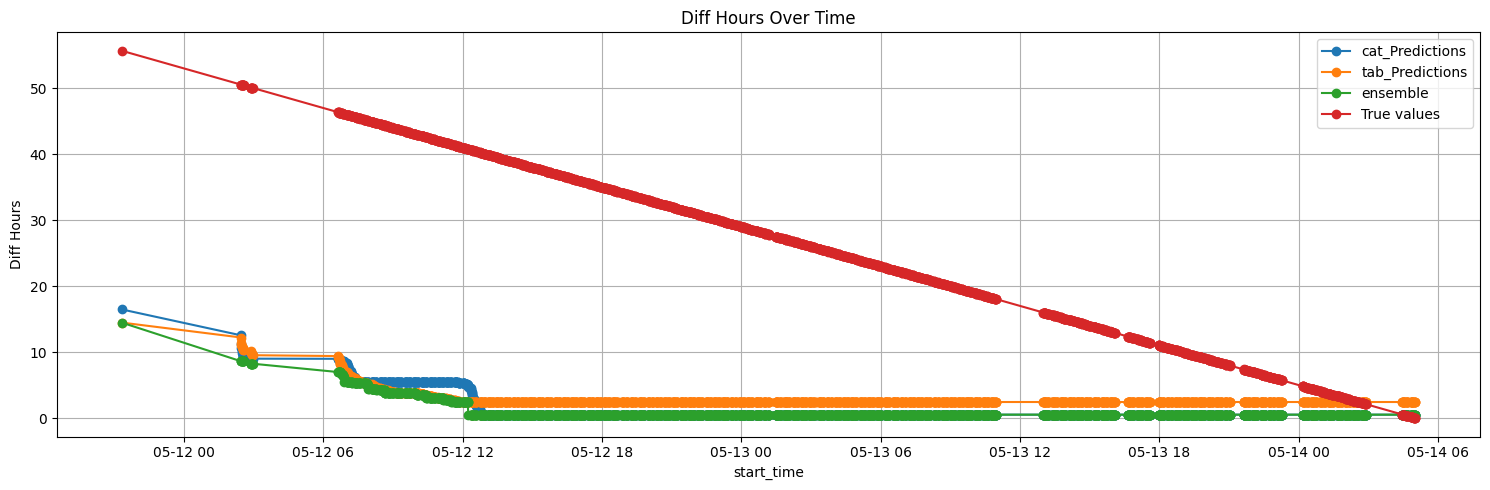

[0,9]
(19105, 33) (19105, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4455.29926| val_0_mse: 3032.41922|  0:00:01s
epoch 1  | loss: 2391.78918| val_0_mse: 1347.95412|  0:00:02s
epoch 2  | loss: 1134.12936| val_0_mse: 995.43536|  0:00:03s
epoch 3  | loss: 827.58297| val_0_mse: 669.70102|  0:00:04s
epoch 4  | loss: 699.381 | val_0_mse: 609.0064|  0:00:06s
epoch 5  | loss: 643.54043| val_0_mse: 629.93222|  0:00:07s
epoch 6  | loss: 601.75159| val_0_mse: 653.36997|  0:00:08s
epoch 7  | loss: 563.48313| val_0_mse: 457.52858|  0:00:10s
epoch 8  | loss: 494.96101| val_0_mse: 526.22897|  0:00:12s
epoch 9  | loss: 484.38756| val_0_mse: 640.59319|  0:00:13s
epoch 10 | loss: 459.38912| val_0_mse: 1106.82872|  0:00:14s
epoch 11 | loss: 413.31913| val_0_mse: 425.26465|  0:00:16s
epoch 12 | loss: 413.35195| val_0_mse: 430.81978|  0:00:17s
epoch 13 | loss: 352.52639| val_0_mse: 598.86366|  0:00:18s
epoch 14 | loss: 337.56237| val_0_mse: 208.84112|  0:00:20s
epoch 15 | loss: 246.76744| val_0_mse: 487.97062|  0:00:21s
epoch 16 | loss: 212.60568| val_0_ms

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
9
(5678, 33) (5678, 1)
cat_rmse: 3527.8637143534947
cat_rmse1: 43.35321526046251
cat_rmse2: 73.43814957682532
tab_rmse: 4337.744075007313
tab_rmse1: 52.66664759752057
tab_rmse2: 78.15075942842735
ensemble_rmse1: 52.94007993728636
ensemble_rmse2: 79.80778957033598


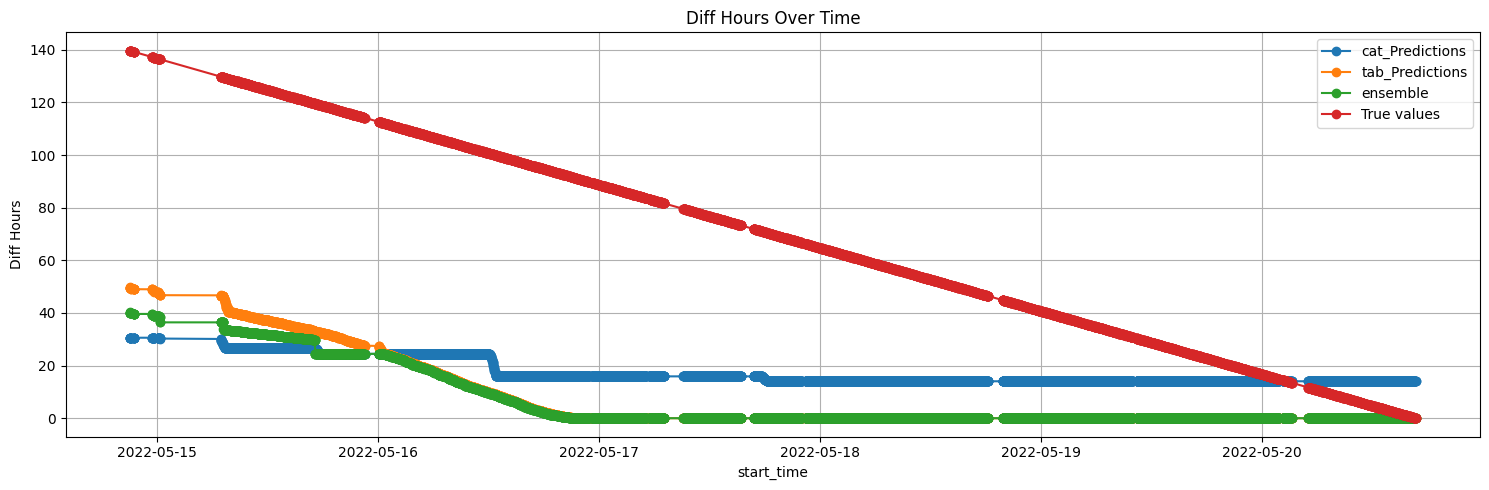

[0,10]
(24783, 33) (24783, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4160.92947| val_0_mse: 2083.21767|  0:00:01s
epoch 1  | loss: 1551.67519| val_0_mse: 983.1159|  0:00:03s
epoch 2  | loss: 853.91401| val_0_mse: 696.17276|  0:00:04s
epoch 3  | loss: 683.78001| val_0_mse: 569.48609|  0:00:06s
epoch 4  | loss: 575.78161| val_0_mse: 538.7801|  0:00:07s
epoch 5  | loss: 482.44572| val_0_mse: 427.77116|  0:00:09s
epoch 6  | loss: 438.53232| val_0_mse: 372.85762|  0:00:12s
epoch 7  | loss: 410.89321| val_0_mse: 279.60685|  0:00:14s
epoch 8  | loss: 299.53934| val_0_mse: 475.94597|  0:00:16s
epoch 9  | loss: 247.04332| val_0_mse: 244.19401|  0:00:17s
epoch 10 | loss: 194.56645| val_0_mse: 62.85575|  0:00:19s
epoch 11 | loss: 160.69619| val_0_mse: 315.03518|  0:00:20s
epoch 12 | loss: 153.44336| val_0_mse: 51.19647|  0:00:22s
epoch 13 | loss: 118.39196| val_0_mse: 421.42641|  0:00:24s
epoch 14 | loss: 101.96904| val_0_mse: 83.16568|  0:00:27s
epoch 15 | loss: 99.44508| val_0_mse: 147.4098|  0:00:28s
epoch 16 | loss: 101.92514| val_0_mse: 296.2

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
10
(1062, 33) (1062, 1)
cat_rmse: 192.45667222804818
cat_rmse1: 12.011646970327275
cat_rmse2: 16.677167985568637
tab_rmse: 571.8805994190825
tab_rmse1: 25.955186850500954
tab_rmse2: 19.77041956190458
ensemble_rmse1: 12.011646970327275
ensemble_rmse2: 16.6220630273108


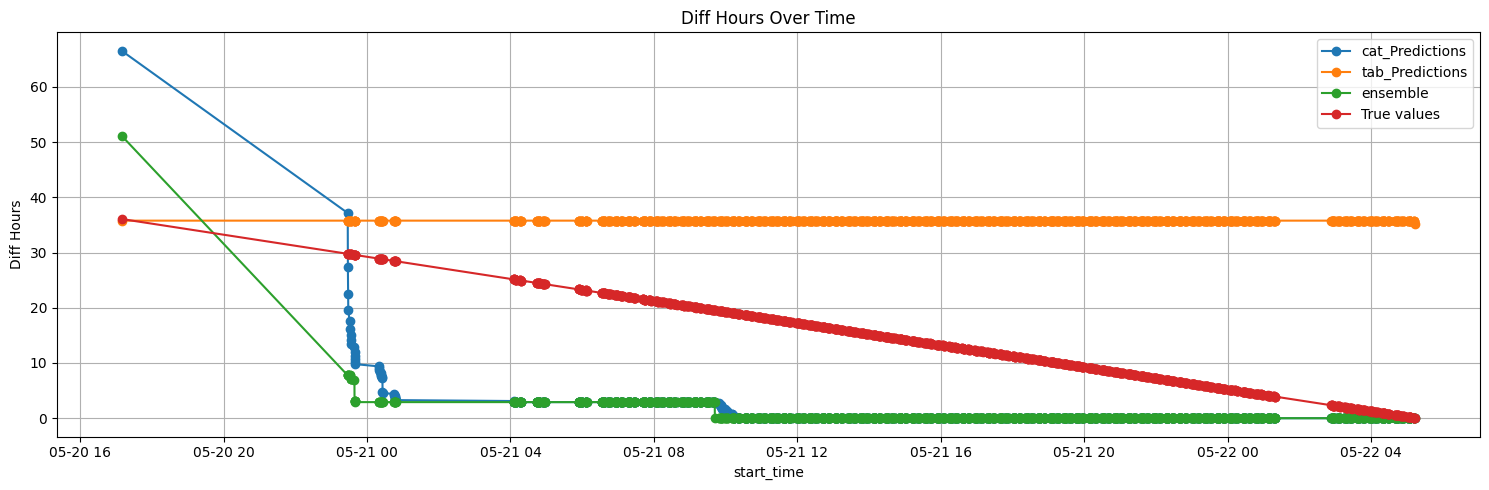

[1,11]
(19240, 33) (19240, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3313.82075| val_0_mse: 2377.48571|  0:00:01s
epoch 1  | loss: 1821.91901| val_0_mse: 1176.52599|  0:00:02s
epoch 2  | loss: 1042.22252| val_0_mse: 815.93224|  0:00:04s
epoch 3  | loss: 836.37301| val_0_mse: 703.50495|  0:00:06s
epoch 4  | loss: 711.73044| val_0_mse: 586.24977|  0:00:07s
epoch 5  | loss: 603.3182| val_0_mse: 545.71136|  0:00:08s
epoch 6  | loss: 520.38161| val_0_mse: 452.17468|  0:00:10s
epoch 7  | loss: 474.37562| val_0_mse: 348.10154|  0:00:11s
epoch 8  | loss: 406.77545| val_0_mse: 329.48009|  0:00:12s
epoch 9  | loss: 323.74171| val_0_mse: 168.35616|  0:00:13s
epoch 10 | loss: 311.93868| val_0_mse: 384.14826|  0:00:15s
epoch 11 | loss: 337.07156| val_0_mse: 157.38877|  0:00:16s
epoch 12 | loss: 272.68303| val_0_mse: 200.25103|  0:00:18s
epoch 13 | loss: 271.81472| val_0_mse: 156.88162|  0:00:20s
epoch 14 | loss: 237.95027| val_0_mse: 192.40136|  0:00:21s
epoch 15 | loss: 252.67645| val_0_mse: 540.34537|  0:00:22s
epoch 16 | loss: 243.78741| val_0_ms

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
11
(668, 33) (668, 1)
cat_rmse: 110.63451886341475
cat_rmse1: 7.111214814926232
cat_rmse2: 15.797508849707
tab_rmse: 88.77855694508453
tab_rmse1: 9.565592577747216
tab_rmse2: 9.082000761486002
ensemble_rmse1: 4.781151574467779
ensemble_rmse2: 6.816072180898053


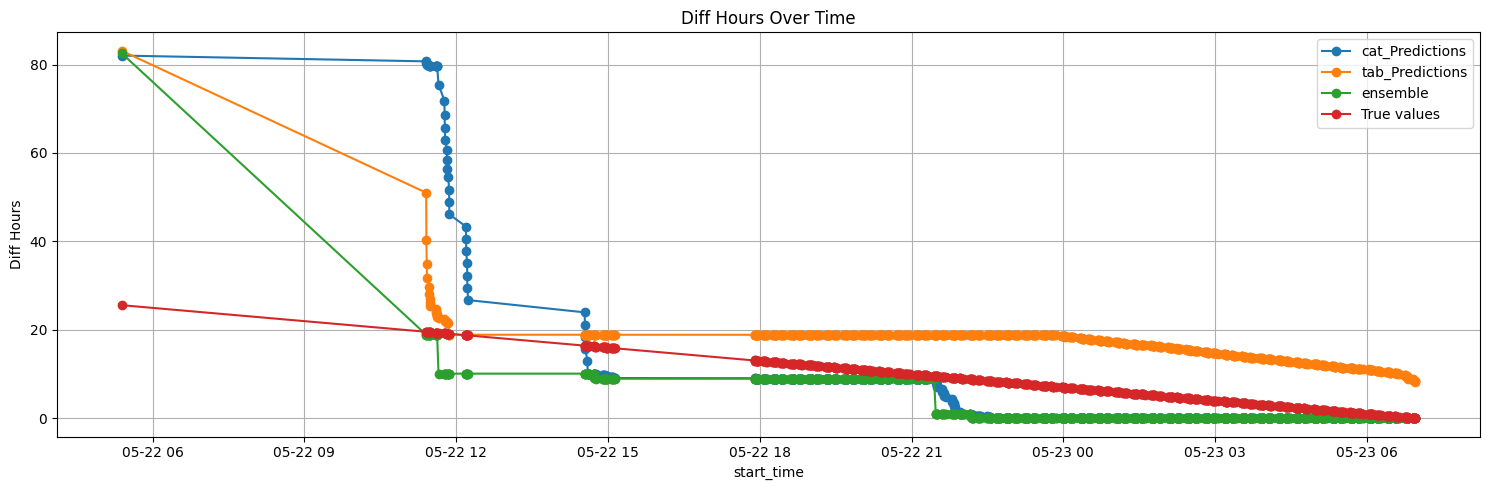

[2,12]
(19103, 33) (19103, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3339.44349| val_0_mse: 2420.61684|  0:00:01s
epoch 1  | loss: 1690.92481| val_0_mse: 1002.07963|  0:00:02s
epoch 2  | loss: 820.92937| val_0_mse: 726.99314|  0:00:03s
epoch 3  | loss: 533.00528| val_0_mse: 459.28724|  0:00:04s
epoch 4  | loss: 404.63983| val_0_mse: 285.73311|  0:00:06s
epoch 5  | loss: 284.05901| val_0_mse: 199.55522|  0:00:07s
epoch 6  | loss: 244.33584| val_0_mse: 175.99995|  0:00:08s
epoch 7  | loss: 189.40868| val_0_mse: 160.46843|  0:00:10s
epoch 8  | loss: 163.70849| val_0_mse: 164.59184|  0:00:12s
epoch 9  | loss: 129.64824| val_0_mse: 127.31929|  0:00:13s
epoch 10 | loss: 156.72484| val_0_mse: 113.26444|  0:00:15s
epoch 11 | loss: 95.42982| val_0_mse: 81.31847|  0:00:16s
epoch 12 | loss: 107.41347| val_0_mse: 89.20841|  0:00:17s
epoch 13 | loss: 77.7501 | val_0_mse: 76.46808|  0:00:18s
epoch 14 | loss: 58.57732| val_0_mse: 34.22045|  0:00:20s
epoch 15 | loss: 67.18721| val_0_mse: 60.97522|  0:00:21s
epoch 16 | loss: 56.71372| val_0_mse: 43.8384

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
12
(5242, 33) (5242, 1)
cat_rmse: 3342.0573078248767
cat_rmse1: 48.83380558797048
cat_rmse2: 78.88306192265665
tab_rmse: 5276.733103913608
tab_rmse1: 64.18291793631545
tab_rmse2: 93.58901249750085
ensemble_rmse1: 64.23622611367587
ensemble_rmse2: 94.36265618493884


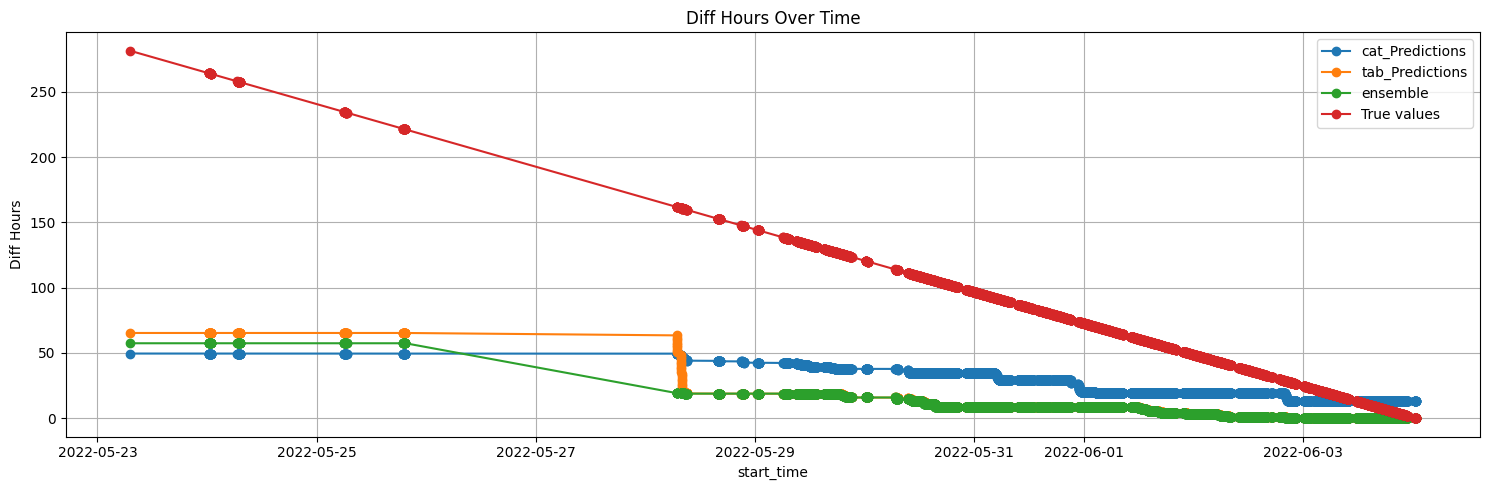

[3,13]
(22569, 33) (22569, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4030.48176| val_0_mse: 2321.37272|  0:00:01s
epoch 1  | loss: 1700.12254| val_0_mse: 982.91599|  0:00:02s
epoch 2  | loss: 833.64551| val_0_mse: 695.20126|  0:00:04s
epoch 3  | loss: 534.78862| val_0_mse: 385.07494|  0:00:06s
epoch 4  | loss: 312.11222| val_0_mse: 183.32536|  0:00:08s
epoch 5  | loss: 200.02359| val_0_mse: 134.59639|  0:00:10s
epoch 6  | loss: 164.25165| val_0_mse: 95.71703|  0:00:11s
epoch 7  | loss: 108.23358| val_0_mse: 153.96913|  0:00:13s
epoch 8  | loss: 117.98608| val_0_mse: 61.43008|  0:00:14s
epoch 9  | loss: 95.93145| val_0_mse: 47.02379|  0:00:16s
epoch 10 | loss: 75.27186| val_0_mse: 49.44547|  0:00:17s
epoch 11 | loss: 79.94632| val_0_mse: 38.79086|  0:00:19s
epoch 12 | loss: 63.81089| val_0_mse: 39.77452|  0:00:21s
epoch 13 | loss: 65.15124| val_0_mse: 61.46376|  0:00:23s
epoch 14 | loss: 64.71436| val_0_mse: 36.50361|  0:00:24s
epoch 15 | loss: 51.16044| val_0_mse: 56.95427|  0:00:26s
epoch 16 | loss: 43.98376| val_0_mse: 27.90891|  0:00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
13
(1328, 33) (1328, 1)
cat_rmse: 220.60510973847582
cat_rmse1: 12.951064311995678
cat_rmse2: 20.530465543088827
tab_rmse: 232.0186845259168
tab_rmse1: 14.26791489949071
tab_rmse2: 18.44165135967058
ensemble_rmse1: 13.028090982770806
ensemble_rmse2: 17.761800728413707


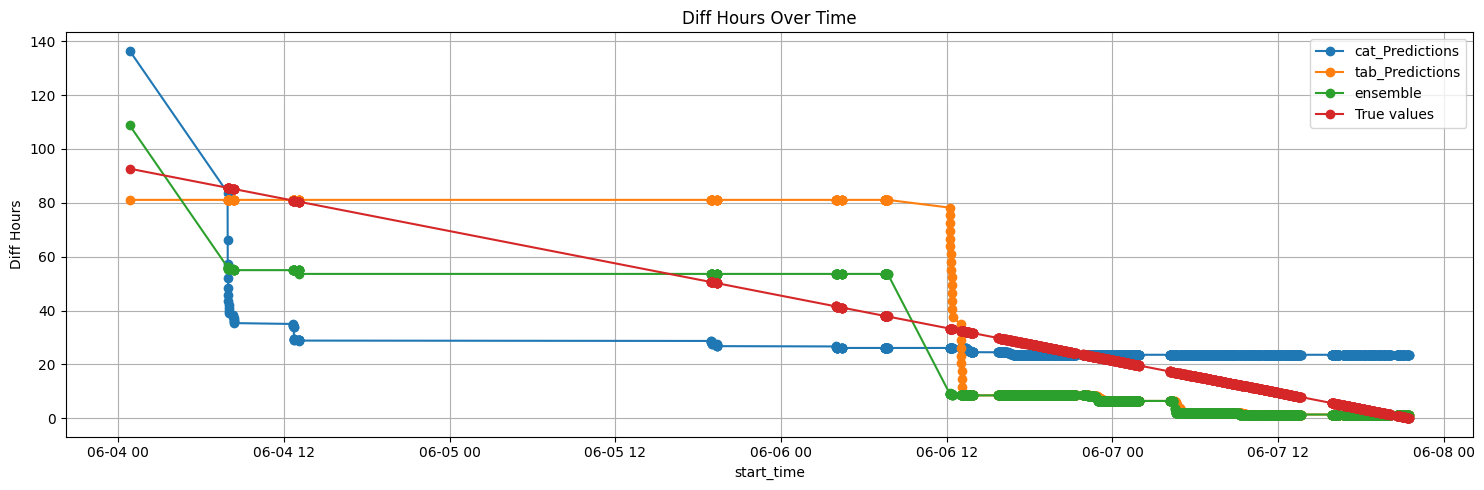

[4,14]
(21172, 33) (21172, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4181.15669| val_0_mse: 2188.62801|  0:00:01s
epoch 1  | loss: 1688.54797| val_0_mse: 935.1922|  0:00:02s
epoch 2  | loss: 619.67334| val_0_mse: 294.31185|  0:00:04s
epoch 3  | loss: 350.01472| val_0_mse: 190.62679|  0:00:06s
epoch 4  | loss: 240.09311| val_0_mse: 181.12494|  0:00:08s
epoch 5  | loss: 195.14317| val_0_mse: 134.87703|  0:00:09s
epoch 6  | loss: 162.46071| val_0_mse: 83.93338|  0:00:10s
epoch 7  | loss: 122.82386| val_0_mse: 96.78876|  0:00:12s
epoch 8  | loss: 129.86745| val_0_mse: 93.80527|  0:00:13s
epoch 9  | loss: 98.06346| val_0_mse: 47.1373 |  0:00:15s
epoch 10 | loss: 95.12028| val_0_mse: 138.40642|  0:00:16s
epoch 11 | loss: 70.00545| val_0_mse: 41.98767|  0:00:17s
epoch 12 | loss: 60.60315| val_0_mse: 49.95889|  0:00:19s
epoch 13 | loss: 59.73825| val_0_mse: 36.54875|  0:00:21s
epoch 14 | loss: 47.52552| val_0_mse: 26.53629|  0:00:23s
epoch 15 | loss: 38.03748| val_0_mse: 32.86239|  0:00:24s
epoch 16 | loss: 40.86792| val_0_mse: 26.32845|  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
14
(622, 33) (622, 1)
cat_rmse: 309.1581138468716
cat_rmse1: 17.64742829302312
cat_rmse2: 17.41115444736603
tab_rmse: 39.11735663915388
tab_rmse1: 4.330194342135746
tab_rmse2: 9.641195278872836
ensemble_rmse1: 4.341357161119724
ensemble_rmse2: 7.825884031785178


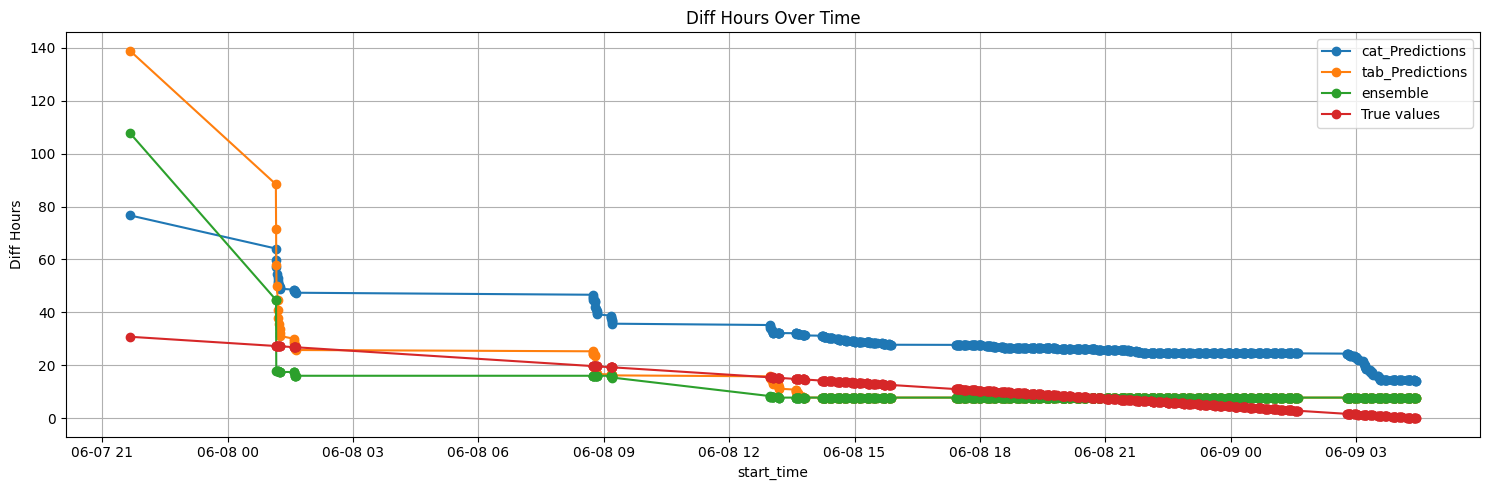

[5,15]
(21571, 33) (21571, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4138.45675| val_0_mse: 2550.27035|  0:00:02s
epoch 1  | loss: 1799.36459| val_0_mse: 1072.11135|  0:00:04s
epoch 2  | loss: 751.50157| val_0_mse: 521.01952|  0:00:05s
epoch 3  | loss: 449.97037| val_0_mse: 292.11615|  0:00:07s
epoch 4  | loss: 228.93756| val_0_mse: 157.44963|  0:00:08s
epoch 5  | loss: 161.6772| val_0_mse: 149.91157|  0:00:09s
epoch 6  | loss: 131.1807| val_0_mse: 123.36535|  0:00:11s
epoch 7  | loss: 113.85643| val_0_mse: 120.86991|  0:00:12s
epoch 8  | loss: 94.42412| val_0_mse: 112.89377|  0:00:14s
epoch 9  | loss: 86.50451| val_0_mse: 72.09205|  0:00:16s
epoch 10 | loss: 78.46341| val_0_mse: 54.2516 |  0:00:18s
epoch 11 | loss: 62.00102| val_0_mse: 61.87936|  0:00:19s
epoch 12 | loss: 64.27493| val_0_mse: 37.63651|  0:00:21s
epoch 13 | loss: 48.01742| val_0_mse: 37.46382|  0:00:22s
epoch 14 | loss: 48.27755| val_0_mse: 26.93817|  0:00:23s
epoch 15 | loss: 47.23254| val_0_mse: 23.24658|  0:00:25s
epoch 16 | loss: 45.79013| val_0_mse: 28.86759|  0:00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
15
(5195, 33) (5195, 1)
cat_rmse: 5273.297610842376
cat_rmse1: 55.74718408232523
cat_rmse2: 88.96075502453682
tab_rmse: 5376.885601074359
tab_rmse1: 55.957067262587735
tab_rmse2: 90.08513887460875
ensemble_rmse1: 55.957067262587735
ensemble_rmse2: 90.08513887460875


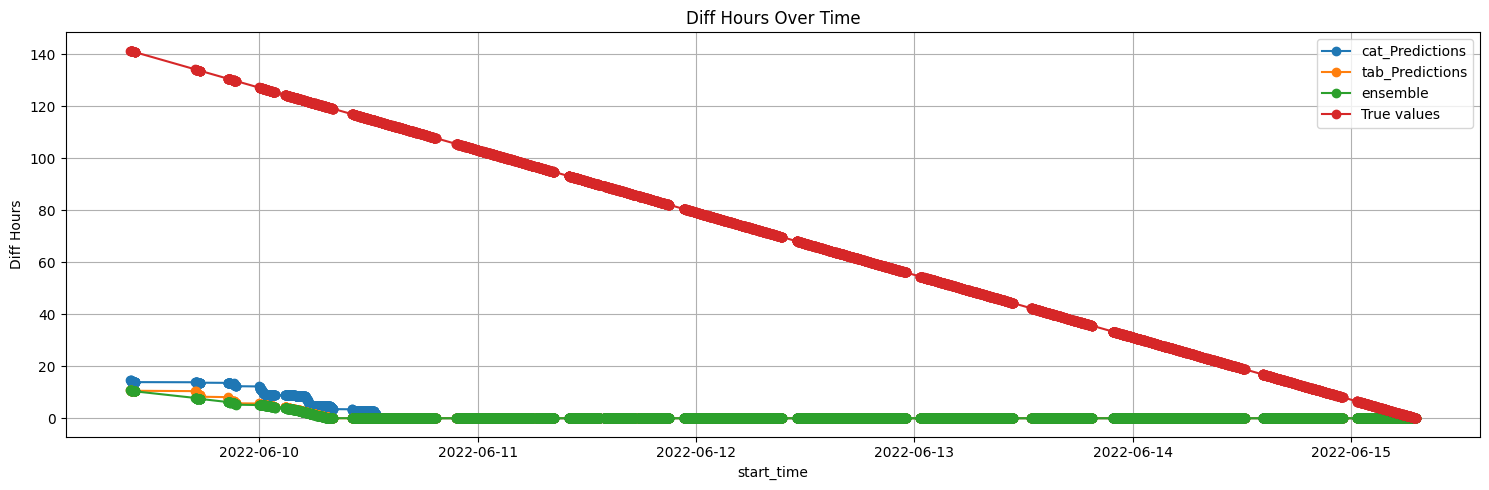

[6,16]
(25695, 33) (25695, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3981.06577| val_0_mse: 1886.62606|  0:00:01s
epoch 1  | loss: 1167.60769| val_0_mse: 610.3437|  0:00:03s
epoch 2  | loss: 400.21969| val_0_mse: 301.33227|  0:00:05s
epoch 3  | loss: 245.51772| val_0_mse: 178.04329|  0:00:06s
epoch 4  | loss: 185.59039| val_0_mse: 144.38827|  0:00:08s
epoch 5  | loss: 148.96415| val_0_mse: 76.25698|  0:00:11s
epoch 6  | loss: 104.67312| val_0_mse: 93.91563|  0:00:13s
epoch 7  | loss: 97.16203| val_0_mse: 57.13419|  0:00:14s
epoch 8  | loss: 87.18714| val_0_mse: 58.11028|  0:00:16s
epoch 9  | loss: 56.81404| val_0_mse: 44.42768|  0:00:18s
epoch 10 | loss: 50.46847| val_0_mse: 30.15655|  0:00:20s
epoch 11 | loss: 44.2416 | val_0_mse: 190.19482|  0:00:21s
epoch 12 | loss: 34.19541| val_0_mse: 23.91818|  0:00:24s
epoch 13 | loss: 39.91984| val_0_mse: 21.80553|  0:00:26s
epoch 14 | loss: 33.41107| val_0_mse: 28.32484|  0:00:28s
epoch 15 | loss: 32.98861| val_0_mse: 18.12049|  0:00:30s
epoch 16 | loss: 28.45283| val_0_mse: 17.26913|  0:00:31s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
16
(2348, 33) (2348, 1)
cat_rmse: 622.3089634142955
cat_rmse1: 25.383679009688493
cat_rmse2: 23.374191770189974
tab_rmse: 549.7199842777251
tab_rmse1: 21.95974438861748
tab_rmse2: 27.973138033043586
ensemble_rmse1: 23.236680222266532
ensemble_rmse2: 24.96391024365731


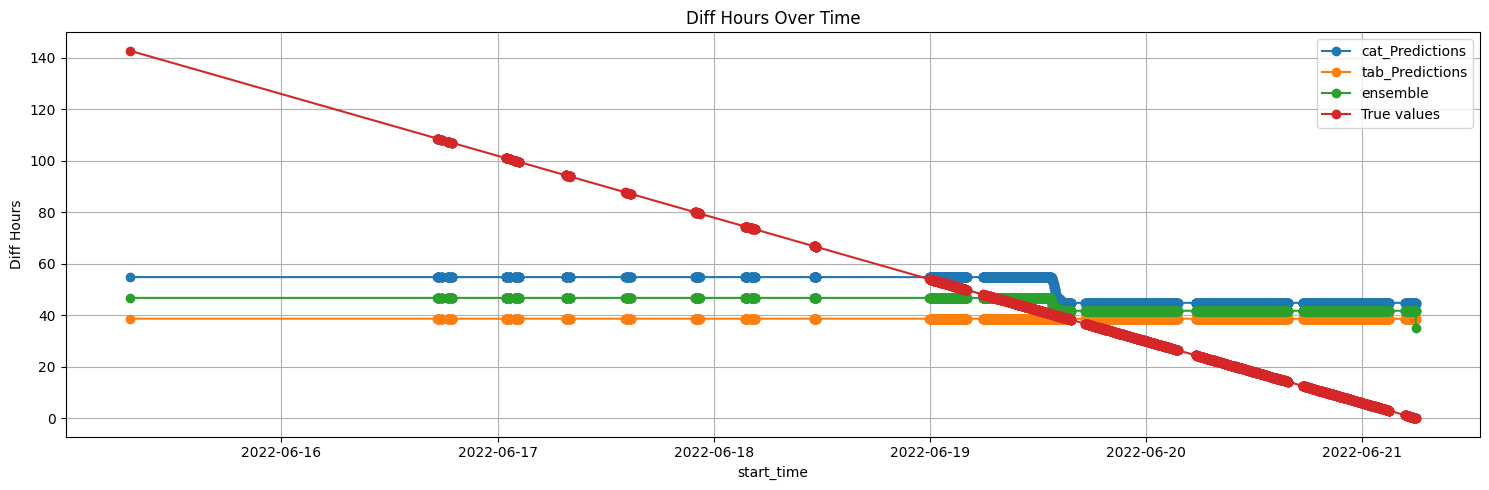

[7,17]
(24785, 33) (24785, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3161.04351| val_0_mse: 1529.44755|  0:00:01s
epoch 1  | loss: 1010.12919| val_0_mse: 855.78742|  0:00:03s
epoch 2  | loss: 375.79892| val_0_mse: 252.60035|  0:00:05s
epoch 3  | loss: 277.53803| val_0_mse: 189.46946|  0:00:07s
epoch 4  | loss: 248.04447| val_0_mse: 162.90616|  0:00:09s
epoch 5  | loss: 194.80671| val_0_mse: 158.51832|  0:00:11s
epoch 6  | loss: 161.86363| val_0_mse: 100.95522|  0:00:12s
epoch 7  | loss: 137.65392| val_0_mse: 82.70768|  0:00:14s
epoch 8  | loss: 117.0453| val_0_mse: 50.99254|  0:00:16s
epoch 9  | loss: 93.83186| val_0_mse: 38.60228|  0:00:18s
epoch 10 | loss: 81.0884 | val_0_mse: 148.10842|  0:00:20s
epoch 11 | loss: 82.15672| val_0_mse: 50.28007|  0:00:22s
epoch 12 | loss: 65.57413| val_0_mse: 82.7224 |  0:00:23s
epoch 13 | loss: 50.52028| val_0_mse: 29.74671|  0:00:25s
epoch 14 | loss: 48.2877 | val_0_mse: 101.68176|  0:00:27s
epoch 15 | loss: 54.30901| val_0_mse: 42.06202|  0:00:28s
epoch 16 | loss: 48.57018| val_0_mse: 40.70074|  0:0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
17
(199, 33) (199, 1)
cat_rmse: 385.50390979423713
cat_rmse1: 19.67372297164088
cat_rmse2: 19.53427879550687
tab_rmse: 715.4270725126238
tab_rmse1: 26.883111738512543
tab_rmse2: 26.4020093652643
ensemble_rmse1: 20.100712369927404
ensemble_rmse2: 20.280388491625082


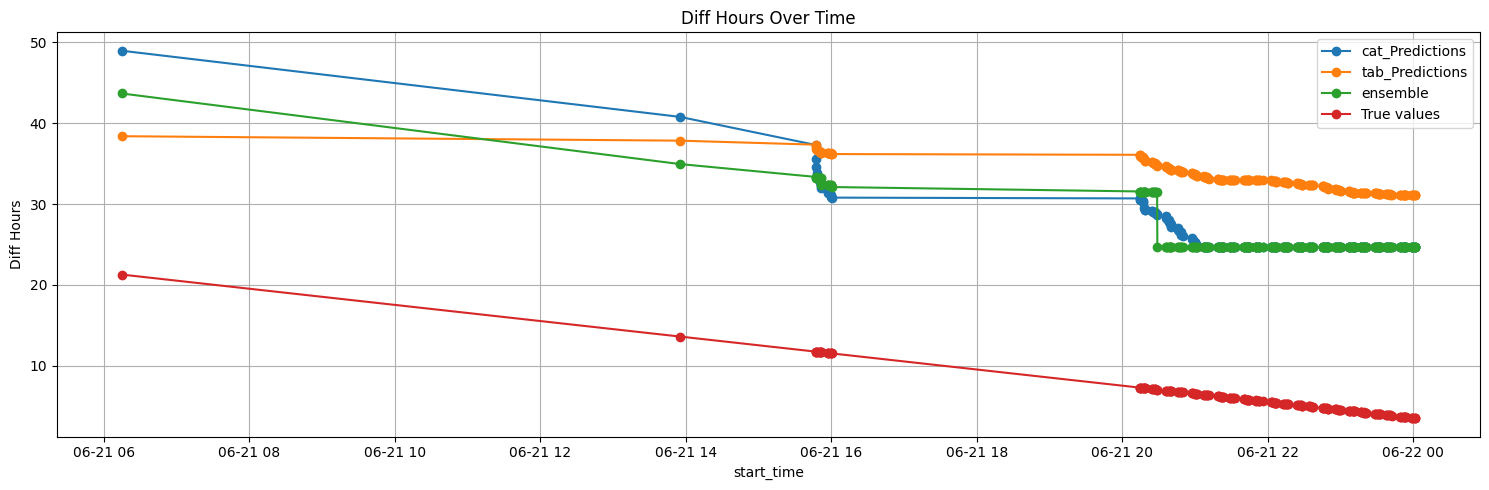

[8,18]
(24918, 33) (24918, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3148.17122| val_0_mse: 1704.75282|  0:00:01s
epoch 1  | loss: 1102.33096| val_0_mse: 898.73124|  0:00:03s
epoch 2  | loss: 381.40235| val_0_mse: 314.47488|  0:00:05s
epoch 3  | loss: 242.52199| val_0_mse: 173.11539|  0:00:07s
epoch 4  | loss: 204.99708| val_0_mse: 163.16355|  0:00:09s
epoch 5  | loss: 157.45337| val_0_mse: 79.56562|  0:00:10s
epoch 6  | loss: 120.23741| val_0_mse: 186.8603|  0:00:12s
epoch 7  | loss: 86.34798| val_0_mse: 53.42372|  0:00:14s
epoch 8  | loss: 68.58158| val_0_mse: 48.98539|  0:00:15s
epoch 9  | loss: 63.28468| val_0_mse: 43.24598|  0:00:17s
epoch 10 | loss: 53.40035| val_0_mse: 33.46437|  0:00:20s
epoch 11 | loss: 46.75472| val_0_mse: 28.20619|  0:00:22s
epoch 12 | loss: 36.96117| val_0_mse: 22.06793|  0:00:23s
epoch 13 | loss: 34.33159| val_0_mse: 48.32649|  0:00:25s
epoch 14 | loss: 36.55586| val_0_mse: 29.40205|  0:00:26s
epoch 15 | loss: 35.89626| val_0_mse: 20.07781|  0:00:28s
epoch 16 | loss: 28.01905| val_0_mse: 17.02213|  0:00:30s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
18
(267, 33) (267, 1)
cat_rmse: 3.3034865670098736
cat_rmse1: 2.2680305435046506
cat_rmse2: 1.2165714613617136
tab_rmse: 3.2539852533604425
tab_rmse1: 1.3070079292476924
tab_rmse2: 2.187554242406542
ensemble_rmse1: 1.3070079292476924
ensemble_rmse2: 2.187554242406542


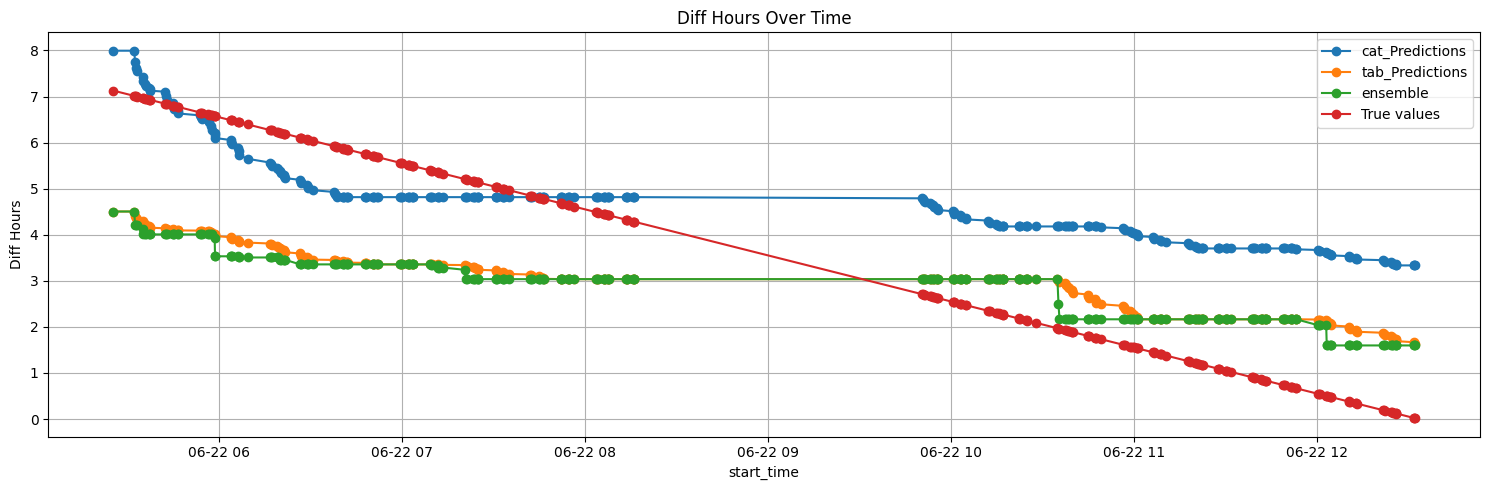

[9,19]
(24588, 33) (24588, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3230.06961| val_0_mse: 1792.58994|  0:00:01s
epoch 1  | loss: 1091.30195| val_0_mse: 1016.09876|  0:00:04s
epoch 2  | loss: 397.08101| val_0_mse: 402.73677|  0:00:06s
epoch 3  | loss: 311.42966| val_0_mse: 222.46385|  0:00:07s
epoch 4  | loss: 229.4084| val_0_mse: 237.1959|  0:00:09s
epoch 5  | loss: 187.56488| val_0_mse: 136.68297|  0:00:10s
epoch 6  | loss: 181.67106| val_0_mse: 669.93067|  0:00:12s
epoch 7  | loss: 147.90311| val_0_mse: 150.18421|  0:00:14s
epoch 8  | loss: 139.78868| val_0_mse: 271.9994|  0:00:16s
epoch 9  | loss: 130.84826| val_0_mse: 90.5124 |  0:00:18s
epoch 10 | loss: 122.92858| val_0_mse: 101.66805|  0:00:20s
epoch 11 | loss: 113.43709| val_0_mse: 113.63136|  0:00:22s
epoch 12 | loss: 105.83052| val_0_mse: 92.14349|  0:00:23s
epoch 13 | loss: 96.96938| val_0_mse: 74.88934|  0:00:25s
epoch 14 | loss: 97.51604| val_0_mse: 91.33861|  0:00:27s
epoch 15 | loss: 85.07315| val_0_mse: 412.45271|  0:00:28s
epoch 16 | loss: 78.24473| val_0_mse: 67.28399

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
19
(3443, 33) (3443, 1)
cat_rmse: 550.3625545449986
cat_rmse1: 25.919564914516723
cat_rmse2: 18.278452774490617
tab_rmse: 705.4419533804634
tab_rmse1: 24.381709026985053
tab_rmse2: 30.05046647384681
ensemble_rmse1: 23.527855419037117
ensemble_rmse2: 21.809665160444542


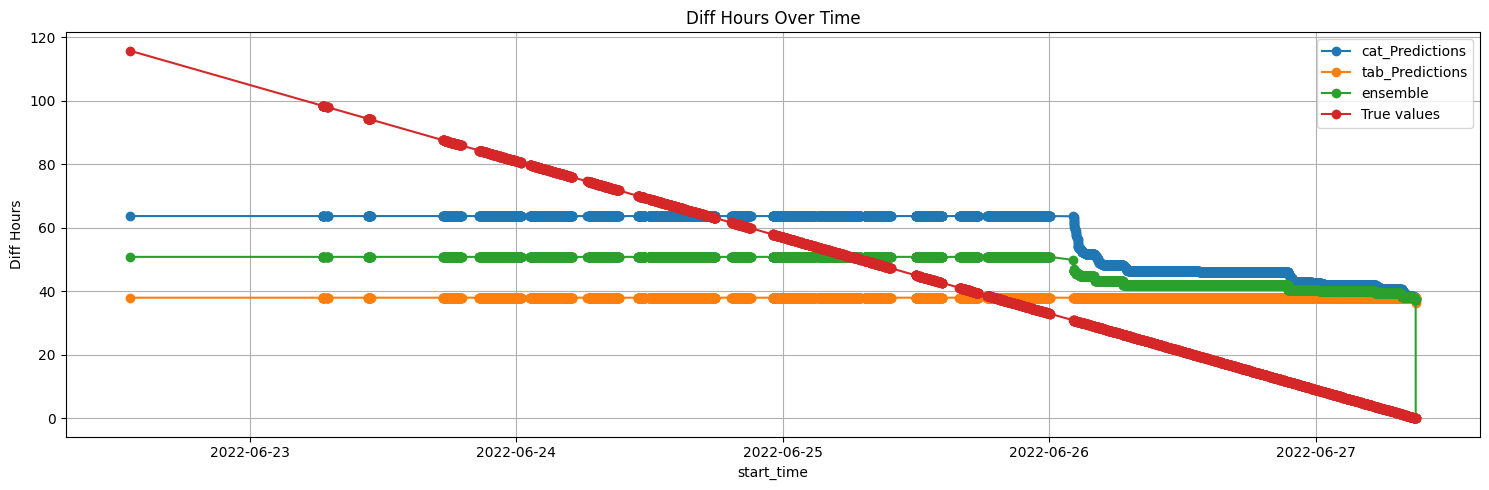

[10,20]
(26052, 33) (26052, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3210.19821| val_0_mse: 1845.10843|  0:00:01s
epoch 1  | loss: 1198.6848| val_0_mse: 794.53549|  0:00:03s
epoch 2  | loss: 508.82223| val_0_mse: 418.26887|  0:00:05s
epoch 3  | loss: 333.63212| val_0_mse: 375.26171|  0:00:06s
epoch 4  | loss: 266.12931| val_0_mse: 231.48412|  0:00:08s
epoch 5  | loss: 205.27748| val_0_mse: 135.41145|  0:00:10s
epoch 6  | loss: 158.38558| val_0_mse: 517.89064|  0:00:12s
epoch 7  | loss: 125.76392| val_0_mse: 79.94651|  0:00:14s
epoch 8  | loss: 92.71044| val_0_mse: 424.14607|  0:00:16s
epoch 9  | loss: 72.4819 | val_0_mse: 32.87726|  0:00:18s
epoch 10 | loss: 67.91503| val_0_mse: 24.17548|  0:00:19s
epoch 11 | loss: 54.48819| val_0_mse: 29.14983|  0:00:21s
epoch 12 | loss: 53.54647| val_0_mse: 25.4417 |  0:00:23s
epoch 13 | loss: 44.77956| val_0_mse: 39.72976|  0:00:25s
epoch 14 | loss: 40.41417| val_0_mse: 21.46221|  0:00:28s
epoch 15 | loss: 34.49341| val_0_mse: 26.1998 |  0:00:29s
epoch 16 | loss: 34.79055| val_0_mse: 12.98921|  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
20
(3117, 33) (3117, 1)
cat_rmse: 851.1673169449745
cat_rmse1: 23.23716704473852
cat_rmse2: 34.25435630782538
tab_rmse: 1916.9844607812058
tab_rmse1: 33.441553120676005
tab_rmse2: 52.381687411168045
ensemble_rmse1: 33.409907543893
ensemble_rmse2: 52.204048276733445


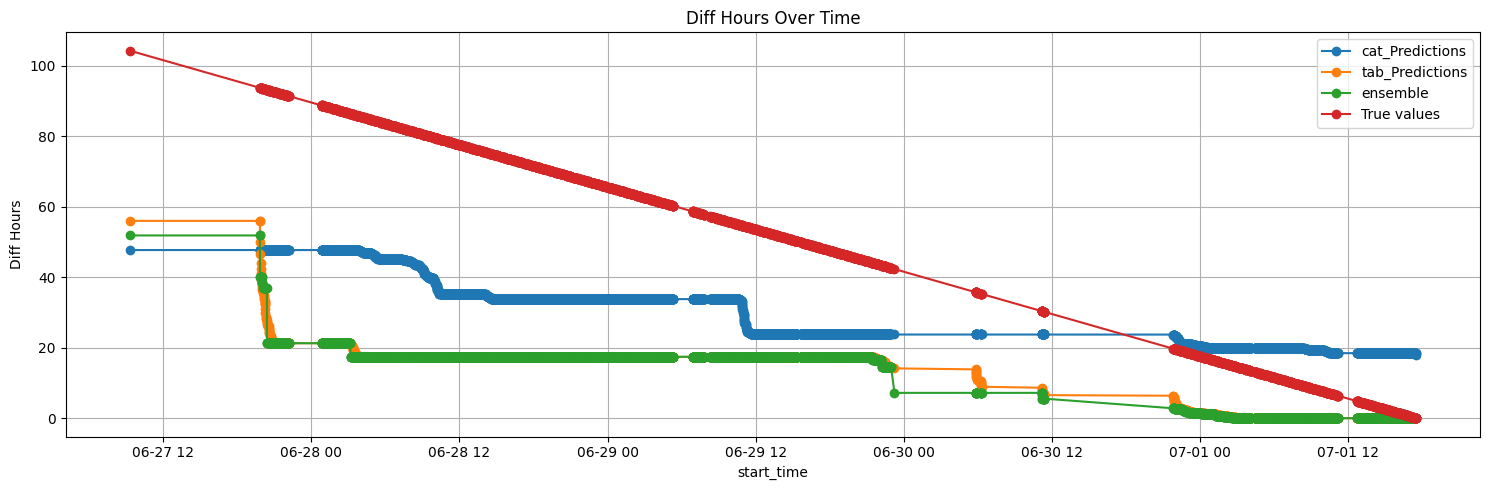

[11,21]
(23491, 33) (23491, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2872.98616| val_0_mse: 1699.00021|  0:00:02s
epoch 1  | loss: 1167.15036| val_0_mse: 796.72153|  0:00:03s
epoch 2  | loss: 538.62154| val_0_mse: 429.95663|  0:00:05s
epoch 3  | loss: 388.73049| val_0_mse: 294.2567|  0:00:06s
epoch 4  | loss: 303.92458| val_0_mse: 245.09282|  0:00:08s
epoch 5  | loss: 253.82863| val_0_mse: 190.96611|  0:00:09s
epoch 6  | loss: 206.9636| val_0_mse: 147.48057|  0:00:11s
epoch 7  | loss: 163.50173| val_0_mse: 174.34854|  0:00:13s
epoch 8  | loss: 112.74385| val_0_mse: 141.36632|  0:00:15s
epoch 9  | loss: 97.26013| val_0_mse: 155.78789|  0:00:17s
epoch 10 | loss: 83.05067| val_0_mse: 54.81957|  0:00:19s
epoch 11 | loss: 63.98213| val_0_mse: 435.68351|  0:00:20s
epoch 12 | loss: 61.32263| val_0_mse: 484.22247|  0:00:22s
epoch 13 | loss: 58.547  | val_0_mse: 34.62443|  0:00:23s
epoch 14 | loss: 48.48958| val_0_mse: 561.42838|  0:00:25s
epoch 15 | loss: 48.64063| val_0_mse: 22.8975 |  0:00:26s
epoch 16 | loss: 40.96627| val_0_mse: 83.99054|  

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
21
(1, 33) (1, 1)
[12,22]
(22430, 33) (22430, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3121.89821| val_0_mse: 2048.71824|  0:00:01s
epoch 1  | loss: 1363.86505| val_0_mse: 816.70371|  0:00:03s
epoch 2  | loss: 624.91209| val_0_mse: 577.51882|  0:00:05s
epoch 3  | loss: 408.00672| val_0_mse: 366.3098|  0:00:07s
epoch 4  | loss: 292.10546| val_0_mse: 210.61326|  0:00:08s
epoch 5  | loss: 230.63995| val_0_mse: 141.98206|  0:00:10s
epoch 6  | loss: 175.01368| val_0_mse: 120.34337|  0:00:11s
epoch 7  | loss: 145.44557| val_0_mse: 93.71667|  0:00:13s
epoch 8  | loss: 131.52913| val_0_mse: 81.55232|  0:00:14s
epoch 9  | loss: 96.04251| val_0_mse: 159.19167|  0:00:16s
epoch 10 | loss: 86.40062| val_0_mse: 398.73412|  0:00:18s
epoch 11 | loss: 70.03656| val_0_mse: 39.88054|  0:00:20s
epoch 12 | loss: 53.91418| val_0_mse: 59.20491|  0:00:21s
epoch 13 | loss: 56.36723| val_0_mse: 26.87455|  0:00:23s
epoch 14 | loss: 52.72651| val_0_mse: 35.12826|  0:00:24s
epoch 15 | loss: 54.53818| val_0_mse: 36.92866|  0:00:26s
epoch 16 | loss: 48.47252| val_0_mse: 98.00584|  0:0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
22
(340, 33) (340, 1)
cat_rmse: 4.328871534432271
cat_rmse1: 2.3248976182840697
cat_rmse2: 1.5945262964699427
tab_rmse: 852.2965420556775
tab_rmse1: 26.635085364113984
tab_rmse2: 33.00642028566773
ensemble_rmse1: 2.3248976182840697
ensemble_rmse2: 1.5945262964699427


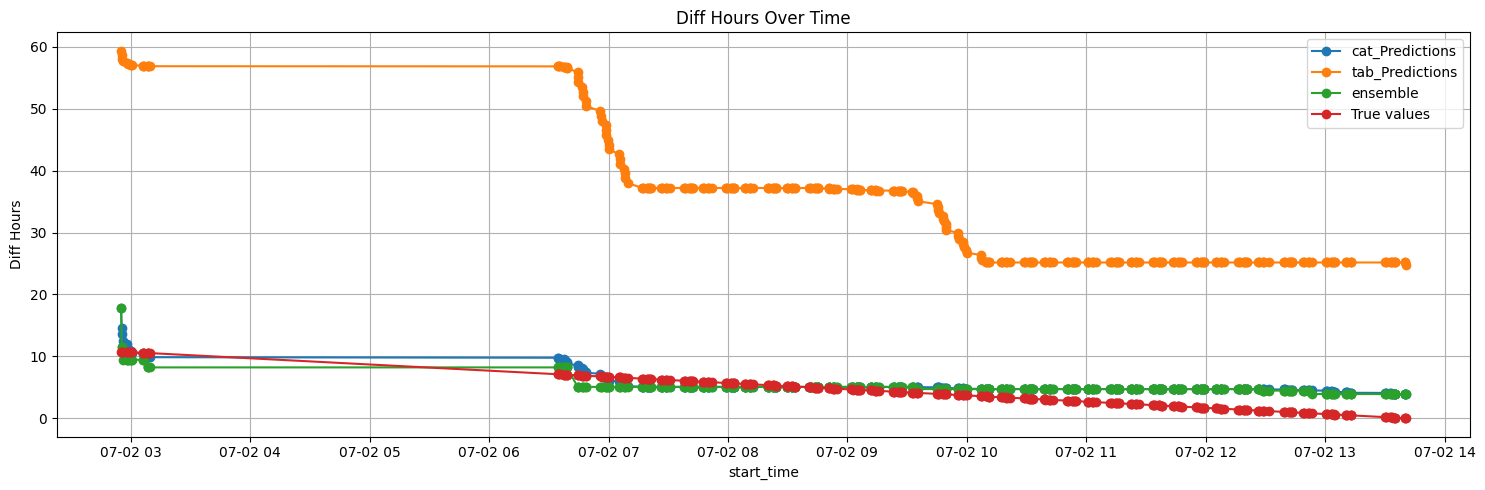

[13,23]
(22102, 33) (22102, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3178.00108| val_0_mse: 2040.57813|  0:00:02s
epoch 1  | loss: 1382.16896| val_0_mse: 904.39998|  0:00:03s
epoch 2  | loss: 587.65771| val_0_mse: 480.23989|  0:00:05s
epoch 3  | loss: 409.25109| val_0_mse: 432.3608|  0:00:06s
epoch 4  | loss: 316.3401| val_0_mse: 229.56403|  0:00:08s
epoch 5  | loss: 253.57226| val_0_mse: 220.11325|  0:00:09s
epoch 6  | loss: 241.47317| val_0_mse: 136.05916|  0:00:11s
epoch 7  | loss: 167.19235| val_0_mse: 121.6269|  0:00:12s
epoch 8  | loss: 171.37364| val_0_mse: 96.75084|  0:00:14s
epoch 9  | loss: 146.93034| val_0_mse: 88.33761|  0:00:16s
epoch 10 | loss: 151.4785| val_0_mse: 79.28585|  0:00:18s
epoch 11 | loss: 128.43549| val_0_mse: 81.33841|  0:00:19s
epoch 12 | loss: 112.26364| val_0_mse: 70.92092|  0:00:21s
epoch 13 | loss: 94.72654| val_0_mse: 63.12755|  0:00:22s
epoch 14 | loss: 97.90451| val_0_mse: 119.54679|  0:00:24s
epoch 15 | loss: 92.28114| val_0_mse: 47.88434|  0:00:25s
epoch 16 | loss: 82.21369| val_0_mse: 74.17723|  0:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
23
(39, 33) (39, 1)
cat_rmse: 345.3094077765594
cat_rmse1: 15.88023442842179
cat_rmse2: 19.688080398869346
tab_rmse: 1116.0660966329774
tab_rmse1: 27.598901195788343
tab_rmse2: 35.73607812169394
ensemble_rmse1: 21.784189654650266
ensemble_rmse2: 26.926063769187845


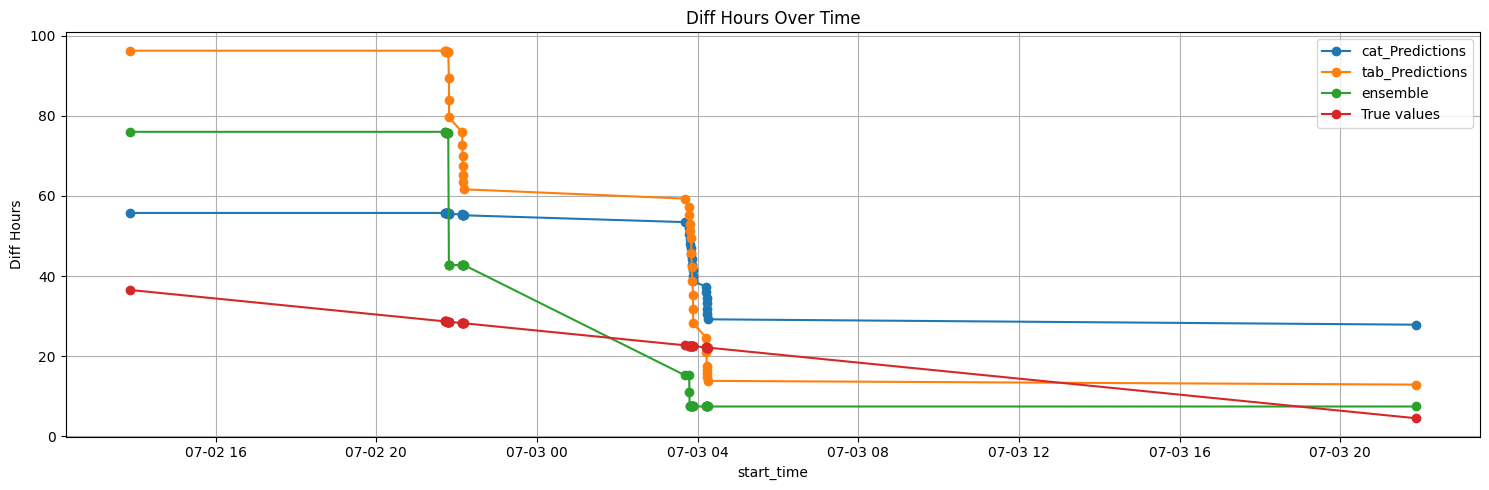

[14,24]
(16899, 33) (16899, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2527.69578| val_0_mse: 1980.67345|  0:00:01s
epoch 1  | loss: 1395.62567| val_0_mse: 929.82279|  0:00:02s
epoch 2  | loss: 724.72608| val_0_mse: 633.23096|  0:00:03s
epoch 3  | loss: 516.5563| val_0_mse: 449.27437|  0:00:04s
epoch 4  | loss: 368.64873| val_0_mse: 274.08229|  0:00:06s
epoch 5  | loss: 290.21339| val_0_mse: 246.64944|  0:00:08s
epoch 6  | loss: 253.75565| val_0_mse: 182.29332|  0:00:09s
epoch 7  | loss: 183.92932| val_0_mse: 103.12147|  0:00:10s
epoch 8  | loss: 130.48931| val_0_mse: 61.2618 |  0:00:11s
epoch 9  | loss: 76.23248| val_0_mse: 69.5586 |  0:00:12s
epoch 10 | loss: 57.95798| val_0_mse: 32.97703|  0:00:13s
epoch 11 | loss: 58.20595| val_0_mse: 33.36439|  0:00:14s
epoch 12 | loss: 42.22822| val_0_mse: 35.35219|  0:00:15s
epoch 13 | loss: 38.08595| val_0_mse: 32.16467|  0:00:16s
epoch 14 | loss: 32.44372| val_0_mse: 20.60589|  0:00:17s
epoch 15 | loss: 25.00428| val_0_mse: 15.49359|  0:00:19s
epoch 16 | loss: 26.68155| val_0_mse: 12.16533|  0:00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train start
24
(18, 33) (18, 1)


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
import torch
params = {'border_count': 8,
 'depth': 10,
 'learning_rate': 0.01,
 'l2_leaf_reg': 9,
 'iterations': 6000}

params_tab = {
    'n_d': 10,
    'n_a': 10,
    'n_steps': 3,
    'gamma': 1.3,
    'cat_dims': [],  # 범주형 변수가 없음을 나타냄
    'cat_emb_dim': 1,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': "entmax",
    'scheduler_params': dict(mode="min",
                             patience=5,
                             min_lr=1e-5,
                             factor=0.9,),
    'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
    'verbose': 1
}
def ml_model(train_size):
    X,y = xy_split(df)
    for x in range(X['TA_tm_before'].nunique()-1):
        scaler = StandardScaler()
        k = x-train_size
        if k <= 0:
            k = 0
        print(f'[{k},{x}]')
        X_Train = X.loc[X[X['TA_tm_before'] == X['TA_tm_before'].unique()[k]].head(1).index.item():X[X['TA_tm_before'] == X['TA_tm_before'].unique()[x]].tail(1).index.item(),:]
        train_drop = X_Train[drop_col]
        X_Train= X_Train.drop(columns = drop_col)
        X_Train[standard_li] = scaler.fit_transform(X_Train[standard_li])
        Y_Train = y[y.index.isin(X_Train.index)]
        X_Train.reset_index(drop=True, inplace=True)
        Y_Train.reset_index(drop=True, inplace=True)
        print(X_Train.shape,Y_Train.shape)
        if len(X_Train) > 1:
            cat_f = CatBoostRegressor(**params)
            print('cat train start')
            cat_f.fit(X_Train,Y_Train,verbose = 0)
            print('cat train finish')
            print('tab train start')
            model = TabNetRegressor(**params_tab)
            model.fit(
                X_Train.values,
                Y_Train.values,
                eval_set=[(X_Train.values, Y_Train.values)],
                eval_metric=['mse'],
                max_epochs=300,
                patience=20,
                batch_size=1024,
                virtual_batch_size=128,
                num_workers=0,
                drop_last=False,
                from_unsupervised=None,
            )
            print('tab train start')

        print(x)
        X_Test = X[X['TA_tm_before'] == X['TA_tm_before'].unique()[x+1]]
        test_drop = X_Test[drop_col]
        X_Test= X_Test.drop(columns = drop_col)
        test_drop.reset_index(drop = True, inplace = True)
        X_Test[standard_li] = scaler.transform(X_Test[standard_li])
        Y_Test = y[y.index.isin(X_Test.index)]

        X_Test.reset_index(drop=True, inplace=True)
        Y_Test.reset_index(drop=True, inplace=True)
        print(X_Test.shape,Y_Test.shape)
        if len(X_Test)>25: #lstm seqeunce length를 고려하여 dimension 맞춰주기 위함
            catf_pred = cat_f.predict(X_Test)
            Y_Test_series = Y_Test['diff_hours']
            catf_pred_series = pd.Series(catf_pred)
            for i in range(0, len(catf_pred_series)-1):
                if catf_pred_series[i+1] > catf_pred_series[i]:
                    catf_pred_series[i+1] = catf_pred_series[i]
            catf_pred_series[catf_pred_series < 0] = 0
            catf_rmse1 = mm_adj_rmse(Y_Test_series, catf_pred_series)
            catf_rmse2 = mm_adj_rmse2(Y_Test_series, catf_pred_series)
            catf_rmse = mean_squared_error(Y_Test_series, catf_pred_series)

            print('cat_rmse:',catf_rmse)
            print('cat_rmse1:',catf_rmse1)
            print('cat_rmse2:',catf_rmse2)
            tab_pred = model.predict(X_Test.values)
            Y_Test_series = Y_Test['diff_hours']
            tab_pred_series = pd.Series(tab_pred.flatten())
            for i in range(0, len(tab_pred_series)-1):
                if tab_pred_series[i+1] > tab_pred_series[i]:
                    tab_pred_series[i+1] = tab_pred_series[i]
            tab_pred_series[tab_pred_series < 0] = 0
            tab_rmse1 = mm_adj_rmse(Y_Test_series, tab_pred_series)
            tab_rmse2 = mm_adj_rmse2(Y_Test_series, tab_pred_series)
            tab_rmse = mean_squared_error(Y_Test_series, tab_pred_series)


            # final_pred_series = []
            # for tab_pred, cat_pred in zip(tab_pred_series, catf_pred_series):
            #     if min(tab_pred, cat_pred) > 25:
            #         final_pred_series.append((tab_pred + cat_pred) / 2)
            #     else:
            #         final_pred_series.append(min(tab_pred, cat_pred))
            final_pred_series = (catf_pred_series + tab_pred_series)/2
            final_pred_series = pd.Series(final_pred_series)
            final_pred_series[final_pred_series < 0] = 0
            ml_ensemble_rmse1 = mm_adj_rmse(Y_Test_series, final_pred_series)
            ml_ensemble_rmse2 = mm_adj_rmse2(Y_Test_series, final_pred_series)

            print('tab_rmse:',tab_rmse)
            print('tab_rmse1:',tab_rmse1)
            print('tab_rmse2:',tab_rmse2)
            print('ensemble_rmse1:',ml_ensemble_rmse1)
            print('ensemble_rmse2:',ml_ensemble_rmse2)

            test_drop['start_dt_tm'] = pd.to_datetime(test_drop['start_dt_tm'])
            test_drop.sort_values('start_dt_tm', inplace=True)
            plt.figure(figsize=(15, 5))
            catf_pred_series = catf_pred_series.rolling(window=25, min_periods=1).mean()
            tab_pred_series = tab_pred_series.rolling(window=25, min_periods=1).mean()
            # plt.plot(test_drop.loc[25:,'start_dt_tm'], catf_pred_series[25:], marker='o',linestyle='-', label='Predictions')
            # plt.plot(test_drop.loc[25:,'start_dt_tm'], Y_Test_series[25:], marker='o',linestyle='-', label='True values')
            plt.plot(test_drop.loc[:,'start_dt_tm'], catf_pred_series[:], marker='o',linestyle='-', label='cat_Predictions')
            plt.plot(test_drop.loc[:,'start_dt_tm'], tab_pred_series[:], marker='o',linestyle='-', label='tab_Predictions')
            plt.plot(test_drop.loc[:,'start_dt_tm'], final_pred_series[:], marker='o',linestyle='-', label='ensemble')
            plt.plot(test_drop.loc[:,'start_dt_tm'], Y_Test_series[:], marker='o',linestyle='-', label='True values')
            plt.title(f'Diff Hours Over Time')
            plt.xlabel('start_time')
            plt.ylabel('Diff Hours')

            plt.grid(True)
            plt.legend()

            plt.tight_layout()
            plt.show()
ml_model(10)

['STEP_NM', 'TA_tm_before', 'start_dt_tm', 'max_val_6', 'max_val_7', 'max_val_9', 'max_val_17', 'max_val_18', 'mean_val_5', 'mean_val_6', 'mean_val_7', 'mean_val_8', 'mean_val_9', 'mean_val_17', 'mean_val_18', 'median_val_6', 'median_val_7', 'median_val_9', 'median_val_17', 'median_val_18', 'min_val_5', 'min_val_6', 'min_val_7', 'min_val_8', 'min_val_9', 'min_val_11', 'min_val_12', 'min_val_17', 'min_val_18', 'stddev_val_10', 'stddev_val_17', 'stddev_val_18', 'rep_hours', 'step_hours', 'last_hours', 'sequence', 'diff_hours']
[0,0]
(6605, 33) (6605, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8427.99747| val_0_mse: 8026.87078|  0:00:00s
epoch 1  | loss: 7414.20625| val_0_mse: 6412.93163|  0:00:01s
epoch 2  | loss: 6095.14006| val_0_mse: 4265.4178|  0:00:02s
epoch 3  | loss: 4626.07012| val_0_mse: 2647.03684|  0:00:02s
epoch 4  | loss: 3122.40597| val_0_mse: 1483.99637|  0:00:02s
epoch 5  | loss: 1738.15915| val_0_mse: 525.94645|  0:00:03s
epoch 6  | loss: 685.67632| val_0_mse: 308.55367|  0:00:03s
epoch 7  | loss: 144.44087| val_0_mse: 172.51049|  0:00:04s
epoch 8  | loss: 87.72939| val_0_mse: 233.7415|  0:00:05s
epoch 9  | loss: 62.72316| val_0_mse: 53.80296|  0:00:06s
epoch 10 | loss: 36.17347| val_0_mse: 18.56377|  0:00:06s
epoch 11 | loss: 32.05881| val_0_mse: 22.32075|  0:00:07s
epoch 12 | loss: 26.93965| val_0_mse: 11.33701|  0:00:08s
epoch 13 | loss: 37.57231| val_0_mse: 11.61487|  0:00:08s
epoch 14 | loss: 29.12567| val_0_mse: 11.65664|  0:00:09s
epoch 15 | loss: 30.38408| val_0_mse: 5.14993 |  0:00:09s
epoch 16 | loss: 23.2814 | val_0_mse: 10.94834

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 6530.59012452727
cat_rmse1: 82.47204656986807
cat_rmse2: 77.20283521522433
tab_rmse: 110.52951432798483
tab_rmse1: 8.615409900343264
tab_rmse2: 13.671765670542516
ensemble_rmse1: 37.90149371865054
ensemble_rmse2: 32.74429447137088


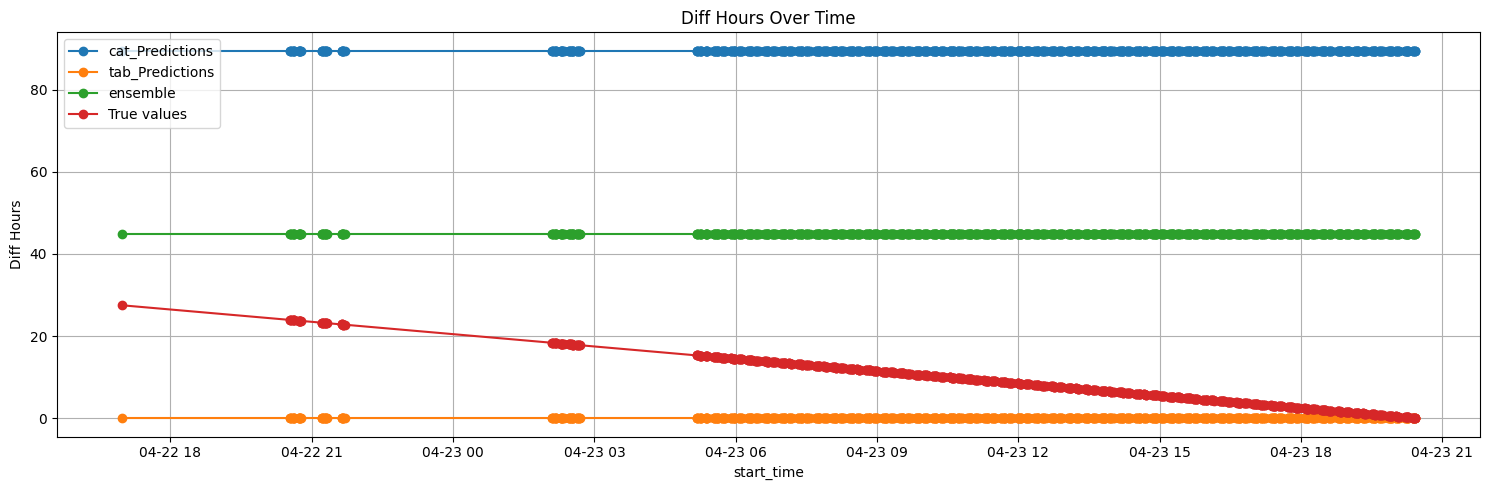

[0,1]
(7410, 33) (7410, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7451.42676| val_0_mse: 7193.48363|  0:00:00s
epoch 1  | loss: 6301.49279| val_0_mse: 4954.66354|  0:00:01s
epoch 2  | loss: 4890.18112| val_0_mse: 2873.50943|  0:00:02s
epoch 3  | loss: 3227.47215| val_0_mse: 1669.30035|  0:00:04s
epoch 4  | loss: 1639.94214| val_0_mse: 646.11867|  0:00:05s
epoch 5  | loss: 503.08024| val_0_mse: 231.44081|  0:00:06s
epoch 6  | loss: 121.13063| val_0_mse: 139.31434|  0:00:07s
epoch 7  | loss: 88.5715 | val_0_mse: 102.04213|  0:00:08s
epoch 8  | loss: 65.99277| val_0_mse: 32.00448|  0:00:09s
epoch 9  | loss: 37.46037| val_0_mse: 31.84952|  0:00:10s
epoch 10 | loss: 40.84521| val_0_mse: 44.69875|  0:00:11s
epoch 11 | loss: 36.44584| val_0_mse: 15.79538|  0:00:12s
epoch 12 | loss: 25.94378| val_0_mse: 10.12671|  0:00:13s
epoch 13 | loss: 28.36728| val_0_mse: 28.62339|  0:00:14s
epoch 14 | loss: 31.82069| val_0_mse: 9.95723 |  0:00:14s
epoch 15 | loss: 22.51637| val_0_mse: 6.30022 |  0:00:15s
epoch 16 | loss: 17.89974| val_0_mse: 5.76234 | 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 12439.979762926085
cat_rmse1: 111.4549226859837
cat_rmse2: 111.63739548187252
tab_rmse: 17125.905127730268
tab_rmse1: 132.11462233590797
tab_rmse2: 129.2379786072341
ensemble_rmse1: 121.76010485187727
ensemble_rmse2: 120.39394141606505


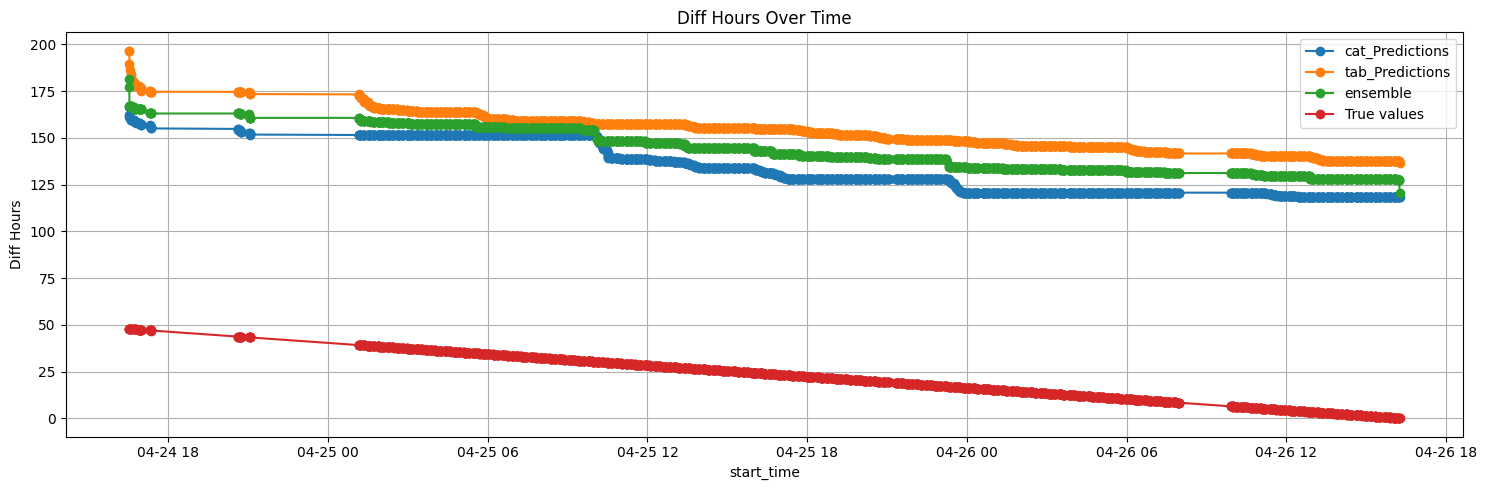

[0,2]
(9186, 33) (9186, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5994.7117| val_0_mse: 5740.05675|  0:00:00s
epoch 1  | loss: 4715.27191| val_0_mse: 3479.63731|  0:00:01s
epoch 2  | loss: 3188.95402| val_0_mse: 1882.73083|  0:00:02s
epoch 3  | loss: 1629.24924| val_0_mse: 822.54508|  0:00:03s
epoch 4  | loss: 532.90002| val_0_mse: 515.95689|  0:00:04s
epoch 5  | loss: 173.22423| val_0_mse: 108.94376|  0:00:04s
epoch 6  | loss: 74.88483| val_0_mse: 71.8532 |  0:00:05s
epoch 7  | loss: 66.37026| val_0_mse: 42.44173|  0:00:05s
epoch 8  | loss: 56.59157| val_0_mse: 29.43148|  0:00:06s
epoch 9  | loss: 59.88024| val_0_mse: 29.37321|  0:00:07s
epoch 10 | loss: 43.63183| val_0_mse: 17.91682|  0:00:07s
epoch 11 | loss: 38.56473| val_0_mse: 14.27731|  0:00:08s
epoch 12 | loss: 49.66298| val_0_mse: 16.5624 |  0:00:08s
epoch 13 | loss: 38.52664| val_0_mse: 14.35378|  0:00:09s
epoch 14 | loss: 40.58131| val_0_mse: 11.58298|  0:00:10s
epoch 15 | loss: 41.52989| val_0_mse: 12.37365|  0:00:10s
epoch 16 | loss: 34.43731| val_0_mse: 17.99306|  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


(2725, 33) (2725, 1)
cat_rmse: 441.45677149018974
cat_rmse1: 17.015600270182336
cat_rmse2: 24.928780505705884
tab_rmse: 1261.422731469199
tab_rmse1: 27.26856720160471
tab_rmse2: 43.30033221944319
ensemble_rmse1: 20.243547435421853
ensemble_rmse2: 33.82364468485122


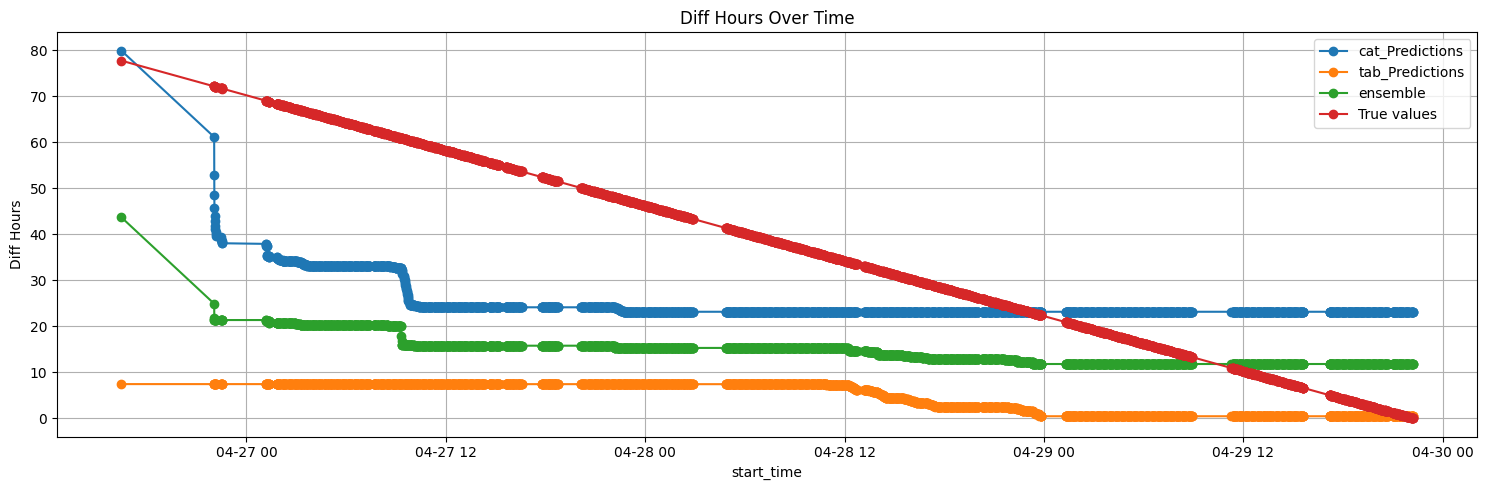

[0,3]
(11911, 33) (11911, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4740.62698| val_0_mse: 4120.14705|  0:00:00s
epoch 1  | loss: 3100.69229| val_0_mse: 1604.44768|  0:00:01s
epoch 2  | loss: 1312.57073| val_0_mse: 568.13386|  0:00:02s
epoch 3  | loss: 382.30835| val_0_mse: 263.58455|  0:00:03s
epoch 4  | loss: 156.21152| val_0_mse: 213.86555|  0:00:03s
epoch 5  | loss: 81.31202| val_0_mse: 61.90796|  0:00:04s
epoch 6  | loss: 67.79612| val_0_mse: 58.29616|  0:00:05s
epoch 7  | loss: 57.60958| val_0_mse: 27.12231|  0:00:06s
epoch 8  | loss: 47.64074| val_0_mse: 24.14797|  0:00:07s
epoch 9  | loss: 46.57702| val_0_mse: 20.68172|  0:00:07s
epoch 10 | loss: 40.3296 | val_0_mse: 20.50651|  0:00:08s
epoch 11 | loss: 28.84564| val_0_mse: 20.14987|  0:00:09s
epoch 12 | loss: 28.04508| val_0_mse: 15.1843 |  0:00:10s
epoch 13 | loss: 24.26982| val_0_mse: 11.68847|  0:00:11s
epoch 14 | loss: 25.98548| val_0_mse: 6.28963 |  0:00:12s
epoch 15 | loss: 28.76913| val_0_mse: 9.93044 |  0:00:13s
epoch 16 | loss: 25.09849| val_0_mse: 14.51461|  0:00:14s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
3
(223, 33) (223, 1)
cat_rmse: 422.62531186211567
cat_rmse1: 20.8763898622294
cat_rmse2: 19.44412164383034
tab_rmse: 1413.008648440506
tab_rmse1: 37.62065174773224
tab_rmse2: 37.486380917021975
ensemble_rmse1: 29.196617907949786
ensemble_rmse2: 28.35307563617517


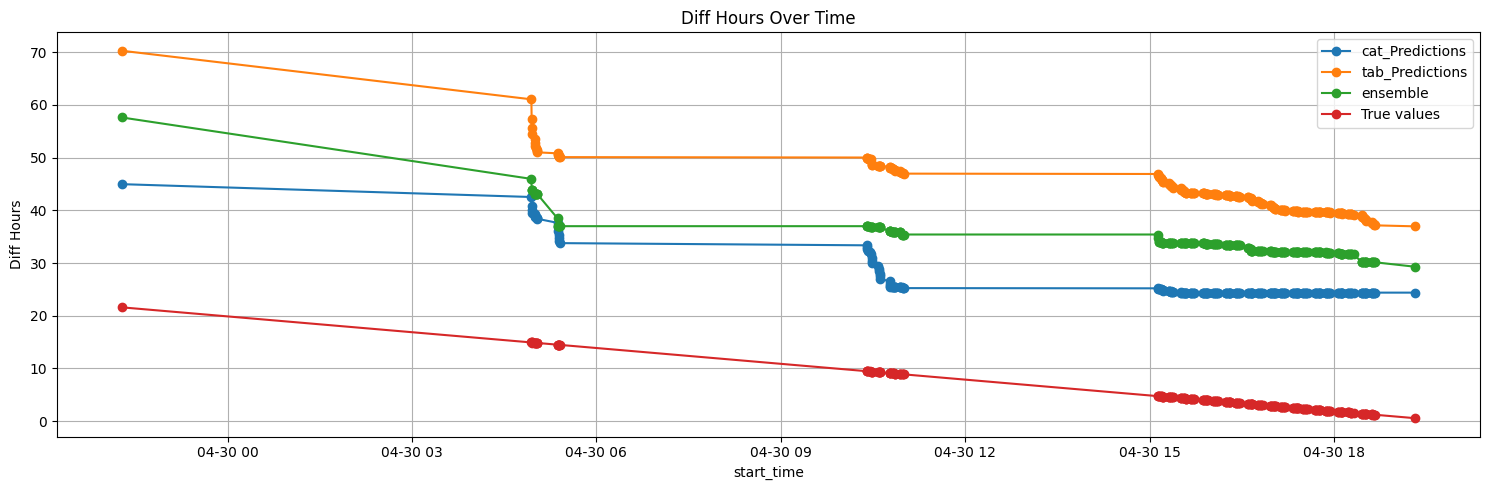

[0,4]
(12134, 33) (12134, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4696.58833| val_0_mse: 4268.24064|  0:00:01s
epoch 1  | loss: 3105.89839| val_0_mse: 2109.41484|  0:00:02s
epoch 2  | loss: 1381.43698| val_0_mse: 587.58993|  0:00:03s
epoch 3  | loss: 355.31977| val_0_mse: 637.86548|  0:00:04s
epoch 4  | loss: 125.79039| val_0_mse: 176.23336|  0:00:05s
epoch 5  | loss: 71.98927| val_0_mse: 44.37562|  0:00:05s
epoch 6  | loss: 54.50714| val_0_mse: 22.82597|  0:00:06s
epoch 7  | loss: 45.50676| val_0_mse: 17.28114|  0:00:07s
epoch 8  | loss: 33.54432| val_0_mse: 11.38821|  0:00:08s
epoch 9  | loss: 32.09285| val_0_mse: 32.10115|  0:00:09s
epoch 10 | loss: 28.826  | val_0_mse: 8.18383 |  0:00:09s
epoch 11 | loss: 23.78435| val_0_mse: 12.7929 |  0:00:10s
epoch 12 | loss: 19.39966| val_0_mse: 13.61743|  0:00:11s
epoch 13 | loss: 26.9139 | val_0_mse: 12.16498|  0:00:12s
epoch 14 | loss: 23.64864| val_0_mse: 10.95533|  0:00:12s
epoch 15 | loss: 24.43961| val_0_mse: 7.70652 |  0:00:14s
epoch 16 | loss: 25.49712| val_0_mse: 6.67817 |  0:00:15s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
4
(1071, 33) (1071, 1)
cat_rmse: 184.49069466755287
cat_rmse1: 9.96519631065879
cat_rmse2: 16.162588057746017
tab_rmse: 115.77311361011522
tab_rmse1: 7.777762561613734
tab_rmse2: 12.86744417998607
ensemble_rmse1: 8.869385043150222
ensemble_rmse2: 14.50945970019744


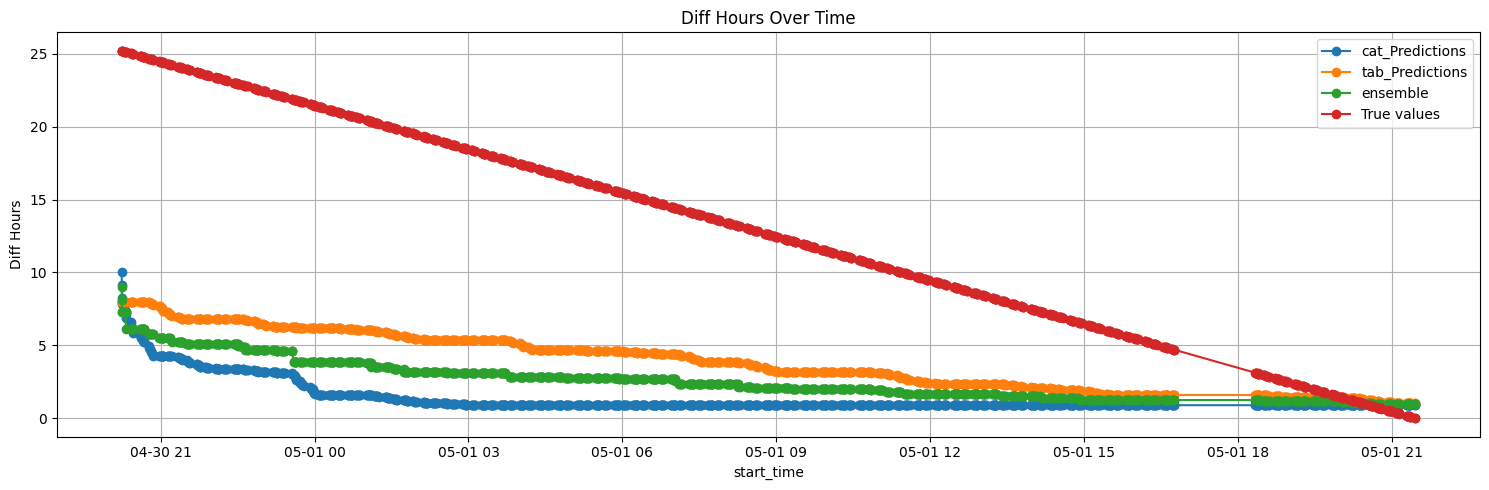

[0,5]
(13205, 33) (13205, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4189.59993| val_0_mse: 3240.85695|  0:00:01s
epoch 1  | loss: 2536.92157| val_0_mse: 1258.41809|  0:00:02s
epoch 2  | loss: 910.50511| val_0_mse: 378.85065|  0:00:03s
epoch 3  | loss: 229.36875| val_0_mse: 192.4063|  0:00:04s
epoch 4  | loss: 134.6646| val_0_mse: 89.55584|  0:00:05s
epoch 5  | loss: 80.24577| val_0_mse: 44.4856 |  0:00:06s
epoch 6  | loss: 56.05788| val_0_mse: 33.6888 |  0:00:07s
epoch 7  | loss: 50.47788| val_0_mse: 31.74517|  0:00:07s
epoch 8  | loss: 41.70777| val_0_mse: 26.88637|  0:00:08s
epoch 9  | loss: 34.15643| val_0_mse: 28.0309 |  0:00:09s
epoch 10 | loss: 33.8439 | val_0_mse: 19.42357|  0:00:10s
epoch 11 | loss: 35.09039| val_0_mse: 19.97921|  0:00:11s
epoch 12 | loss: 29.9047 | val_0_mse: 34.3031 |  0:00:12s
epoch 13 | loss: 31.61993| val_0_mse: 30.01406|  0:00:13s
epoch 14 | loss: 25.32002| val_0_mse: 14.96422|  0:00:14s
epoch 15 | loss: 22.02197| val_0_mse: 21.42285|  0:00:16s
epoch 16 | loss: 21.37837| val_0_mse: 22.38595|  0:00:17s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
5
(3258, 33) (3258, 1)
cat_rmse: 11115.903599227673
cat_rmse1: 62.09390872329875
cat_rmse2: 139.37324333314527
tab_rmse: 11097.674084611697
tab_rmse1: 62.28737025975225
tab_rmse2: 139.13399928767677
ensemble_rmse1: 62.1898106884685
ensemble_rmse2: 139.249654059575


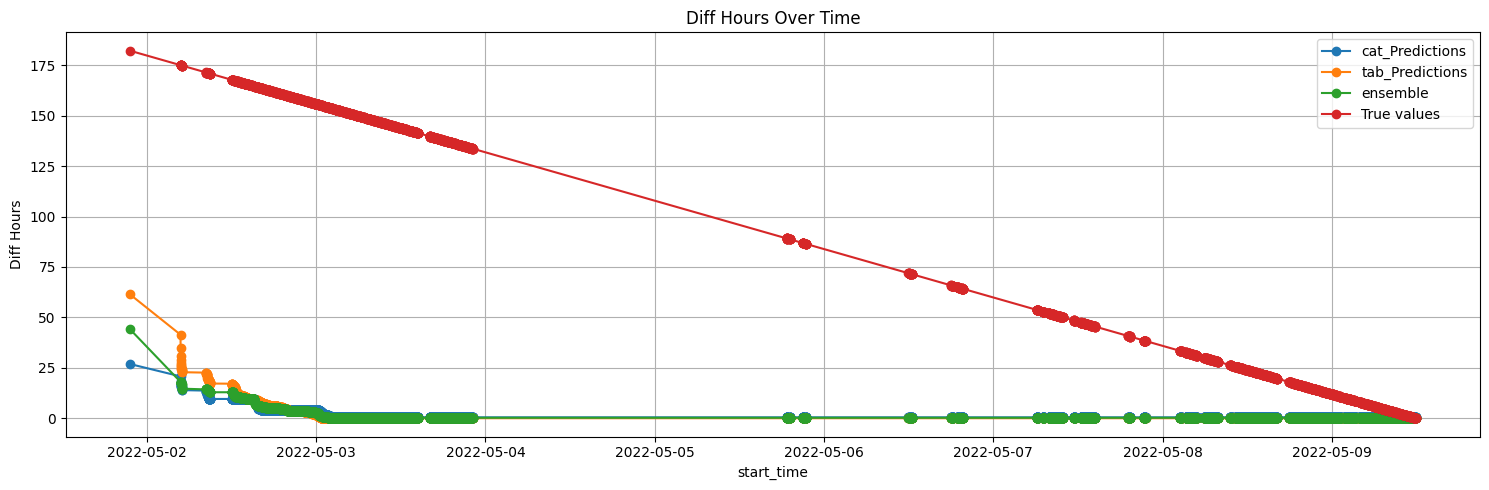

[1,6]
(9858, 33) (9858, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4061.76522| val_0_mse: 3787.78737|  0:00:00s
epoch 1  | loss: 3359.64091| val_0_mse: 2724.51482|  0:00:01s
epoch 2  | loss: 2534.52 | val_0_mse: 1951.71059|  0:00:01s
epoch 3  | loss: 1852.61151| val_0_mse: 1597.57256|  0:00:02s
epoch 4  | loss: 1546.98922| val_0_mse: 1484.10172|  0:00:03s
epoch 5  | loss: 1351.52863| val_0_mse: 1211.26658|  0:00:04s
epoch 6  | loss: 1182.61878| val_0_mse: 1188.0676|  0:00:04s
epoch 7  | loss: 1085.90639| val_0_mse: 938.4303|  0:00:05s
epoch 8  | loss: 959.11976| val_0_mse: 901.61074|  0:00:06s
epoch 9  | loss: 852.60429| val_0_mse: 736.27639|  0:00:06s
epoch 10 | loss: 678.94418| val_0_mse: 680.5667|  0:00:07s
epoch 11 | loss: 519.25773| val_0_mse: 762.70731|  0:00:08s
epoch 12 | loss: 399.91988| val_0_mse: 250.56799|  0:00:09s
epoch 13 | loss: 319.69142| val_0_mse: 298.60481|  0:00:10s
epoch 14 | loss: 239.05465| val_0_mse: 72.55108|  0:00:11s
epoch 15 | loss: 142.52116| val_0_mse: 62.63411|  0:00:11s
epoch 16 | loss: 98.17391| val_0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
6
(66, 33) (66, 1)
cat_rmse: 1227.2635672064027
cat_rmse1: 36.53186820848456
cat_rmse2: 34.51815553024229
tab_rmse: 51.38320375504638
tab_rmse1: 5.528366225476983
tab_rmse2: 7.636834278362392
ensemble_rmse1: 15.59043239305071
ensemble_rmse2: 13.640620302313048


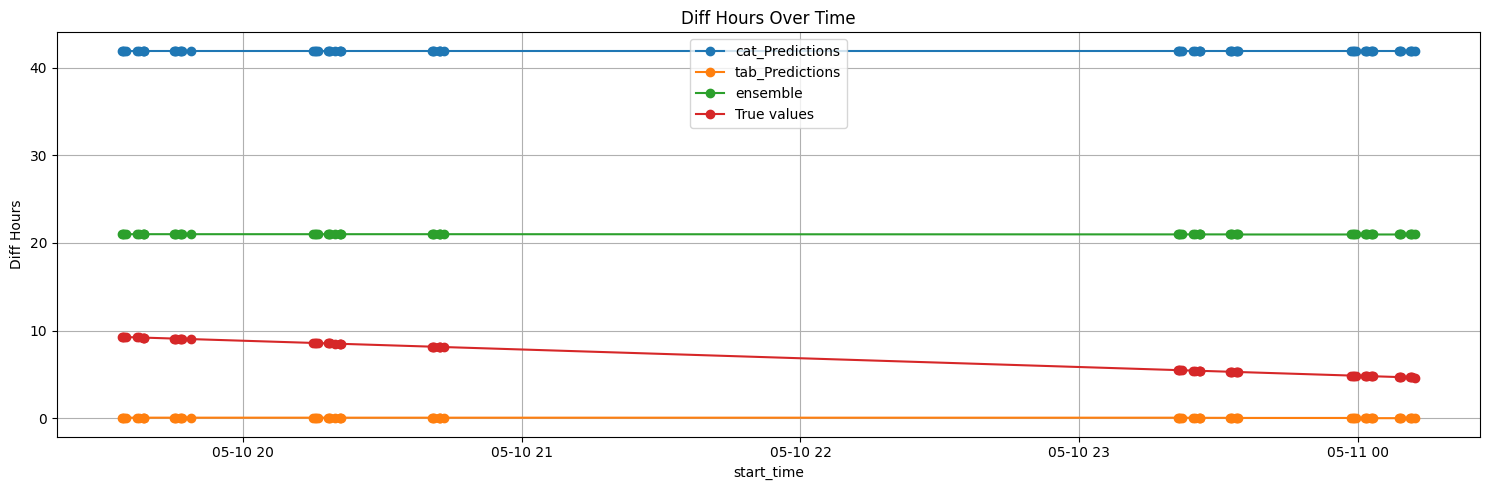

[2,7]
(9119, 33) (9119, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4404.27397| val_0_mse: 4157.13329|  0:00:00s
epoch 1  | loss: 3704.67032| val_0_mse: 3161.42565|  0:00:01s
epoch 2  | loss: 2833.6855| val_0_mse: 1949.1092|  0:00:02s
epoch 3  | loss: 2004.58517| val_0_mse: 1601.9121|  0:00:02s
epoch 4  | loss: 1378.01647| val_0_mse: 1030.46183|  0:00:03s
epoch 5  | loss: 848.01695| val_0_mse: 626.00968|  0:00:04s
epoch 6  | loss: 533.45481| val_0_mse: 489.6756|  0:00:04s
epoch 7  | loss: 381.64808| val_0_mse: 303.13655|  0:00:05s
epoch 8  | loss: 261.26005| val_0_mse: 152.23651|  0:00:06s
epoch 9  | loss: 211.02552| val_0_mse: 126.96957|  0:00:06s
epoch 10 | loss: 165.01897| val_0_mse: 90.71175|  0:00:07s
epoch 11 | loss: 146.25174| val_0_mse: 214.12826|  0:00:07s
epoch 12 | loss: 128.1122| val_0_mse: 73.3046 |  0:00:08s
epoch 13 | loss: 126.73906| val_0_mse: 51.80293|  0:00:09s
epoch 14 | loss: 110.46759| val_0_mse: 66.95581|  0:00:09s
epoch 15 | loss: 102.7757| val_0_mse: 53.84036|  0:00:10s
epoch 16 | loss: 70.9428 | val_0_mse: 39.

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


(597, 33) (597, 1)
cat_rmse: 1686.0978512311183
cat_rmse1: 41.278030959748264
cat_rmse2: 40.88103893459224
tab_rmse: 26.3698110168652
tab_rmse1: 3.888423029206323
tab_rmse2: 5.979939242885573
ensemble_rmse1: 20.740603090556473
ensemble_rmse2: 18.06453106187479


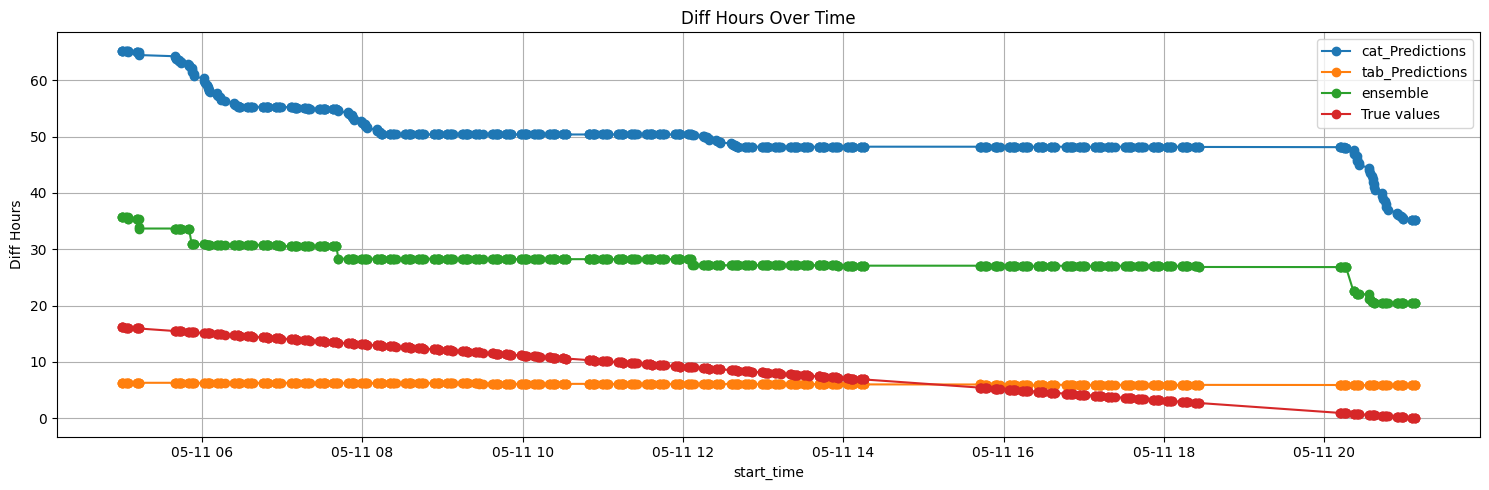

[3,8]
(7940, 33) (7940, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5016.35259| val_0_mse: 4784.5721|  0:00:00s
epoch 1  | loss: 4288.09362| val_0_mse: 3550.93745|  0:00:01s
epoch 2  | loss: 3401.23588| val_0_mse: 2522.96954|  0:00:01s
epoch 3  | loss: 2549.6189| val_0_mse: 1859.75041|  0:00:02s
epoch 4  | loss: 1797.90559| val_0_mse: 1488.42436|  0:00:02s
epoch 5  | loss: 1137.26792| val_0_mse: 1489.87349|  0:00:03s
epoch 6  | loss: 649.3035| val_0_mse: 495.72788|  0:00:03s
epoch 7  | loss: 388.61173| val_0_mse: 439.60411|  0:00:04s
epoch 8  | loss: 293.71759| val_0_mse: 207.91104|  0:00:04s
epoch 9  | loss: 208.68599| val_0_mse: 121.4812|  0:00:05s
epoch 10 | loss: 162.64456| val_0_mse: 90.71433|  0:00:05s
epoch 11 | loss: 125.50064| val_0_mse: 66.92894|  0:00:06s
epoch 12 | loss: 112.50426| val_0_mse: 112.01098|  0:00:06s
epoch 13 | loss: 100.50005| val_0_mse: 78.79803|  0:00:07s
epoch 14 | loss: 88.01786| val_0_mse: 41.03895|  0:00:08s
epoch 15 | loss: 78.16556| val_0_mse: 32.44796|  0:00:08s
epoch 16 | loss: 58.14775| val_0_mse: 2

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 656.922128156928
cat_rmse1: 21.130349388391647
cat_rmse2: 30.18427606901399
tab_rmse: 719.8929653393133
tab_rmse1: 22.29554754761623
tab_rmse2: 31.44842991048607
ensemble_rmse1: 21.70881059517258
ensemble_rmse2: 30.814222346341033


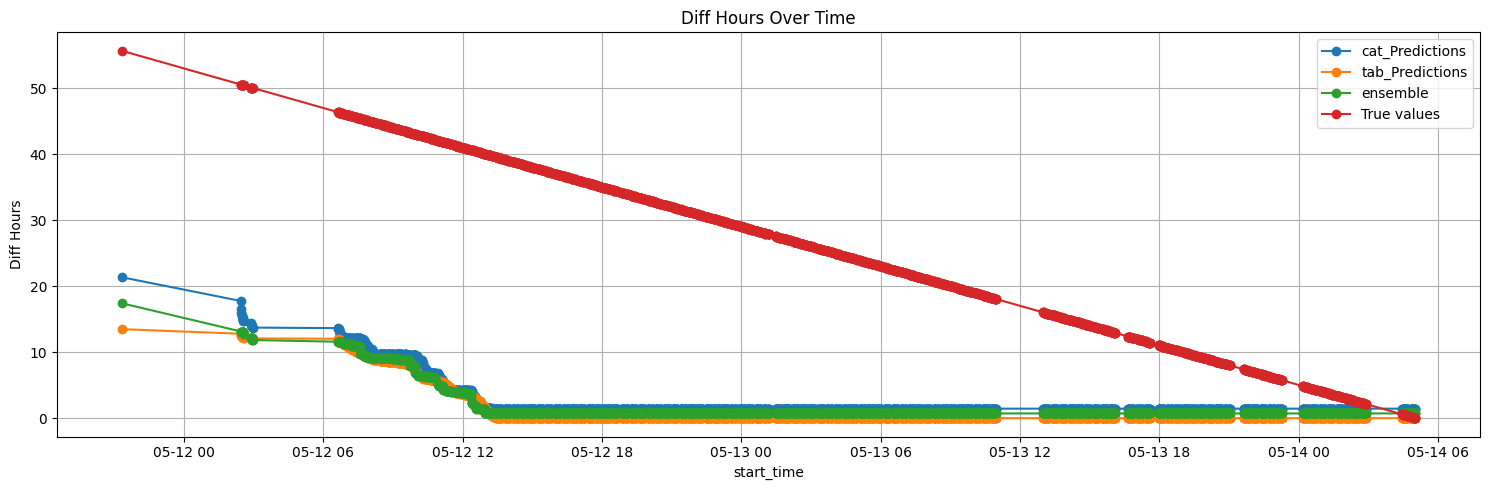

[4,9]
(7194, 33) (7194, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5162.22986| val_0_mse: 5025.83956|  0:00:00s
epoch 1  | loss: 4488.1145| val_0_mse: 3773.67831|  0:00:00s
epoch 2  | loss: 3629.56126| val_0_mse: 2528.40506|  0:00:01s
epoch 3  | loss: 2740.63749| val_0_mse: 2178.91 |  0:00:01s
epoch 4  | loss: 2139.16264| val_0_mse: 1949.22201|  0:00:02s
epoch 5  | loss: 1761.33163| val_0_mse: 1714.42151|  0:00:02s
epoch 6  | loss: 1380.36869| val_0_mse: 1354.5254|  0:00:03s
epoch 7  | loss: 822.1182| val_0_mse: 1824.54648|  0:00:03s
epoch 8  | loss: 480.84375| val_0_mse: 1670.1482|  0:00:04s
epoch 9  | loss: 468.96971| val_0_mse: 456.36663|  0:00:05s
epoch 10 | loss: 312.4114| val_0_mse: 394.08784|  0:00:05s
epoch 11 | loss: 245.47142| val_0_mse: 177.8099|  0:00:06s
epoch 12 | loss: 205.68536| val_0_mse: 168.57135|  0:00:07s
epoch 13 | loss: 176.23925| val_0_mse: 174.52003|  0:00:08s
epoch 14 | loss: 172.19757| val_0_mse: 265.20828|  0:00:08s
epoch 15 | loss: 140.56359| val_0_mse: 140.5965|  0:00:09s
epoch 16 | loss: 158.00742| val_0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


cat_rmse: 4122.6475681763795
cat_rmse1: 45.69027782613299
cat_rmse2: 80.15933814356431
tab_rmse: 5748.060794390114
tab_rmse1: 56.242088976640325
tab_rmse2: 93.12968274468633
ensemble_rmse1: 50.77351769362878
ensemble_rmse2: 86.60940853714627


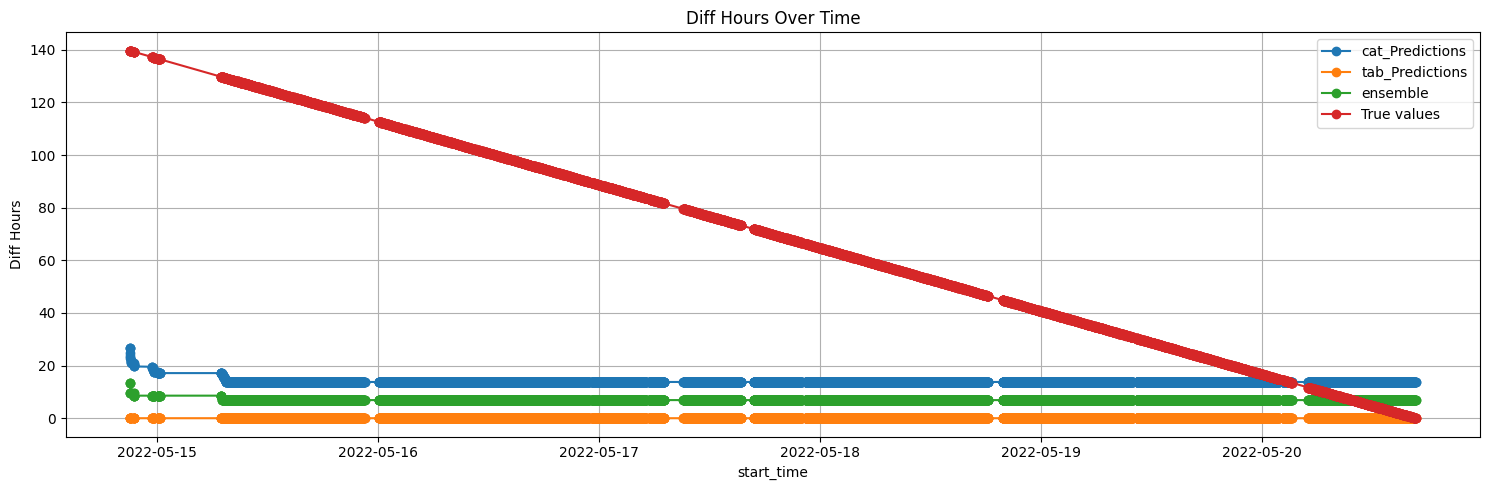

[5,10]
(12649, 33) (12649, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5080.47377| val_0_mse: 4556.81722|  0:00:00s
epoch 1  | loss: 3624.89596| val_0_mse: 2185.02284|  0:00:01s
epoch 2  | loss: 2020.02841| val_0_mse: 1268.72989|  0:00:02s
epoch 3  | loss: 1166.62045| val_0_mse: 1226.80595|  0:00:03s
epoch 4  | loss: 908.44991| val_0_mse: 734.17098|  0:00:04s
epoch 5  | loss: 675.62749| val_0_mse: 462.99423|  0:00:05s
epoch 6  | loss: 453.31928| val_0_mse: 452.17223|  0:00:05s
epoch 7  | loss: 410.42209| val_0_mse: 445.62383|  0:00:06s
epoch 8  | loss: 310.05694| val_0_mse: 244.12798|  0:00:08s
epoch 9  | loss: 223.96709| val_0_mse: 269.84886|  0:00:09s
epoch 10 | loss: 213.22561| val_0_mse: 131.55752|  0:00:10s
epoch 11 | loss: 146.8144| val_0_mse: 106.6246|  0:00:11s
epoch 12 | loss: 139.10713| val_0_mse: 92.61922|  0:00:12s
epoch 13 | loss: 116.01035| val_0_mse: 341.09416|  0:00:13s
epoch 14 | loss: 126.00745| val_0_mse: 96.09927|  0:00:14s
epoch 15 | loss: 90.43539| val_0_mse: 111.16871|  0:00:14s
epoch 16 | loss: 64.62319| val_0_mse:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
10
(1062, 33) (1062, 1)
cat_rmse: 472.09652653133037
cat_rmse1: 23.696671129364447
cat_rmse2: 17.693405119565035
tab_rmse: 9757.086338369867
tab_rmse1: 96.29376498317718
tab_rmse2: 103.0476889791875
ensemble_rmse1: 59.33849580449894
ensemble_rmse2: 59.71810605405942


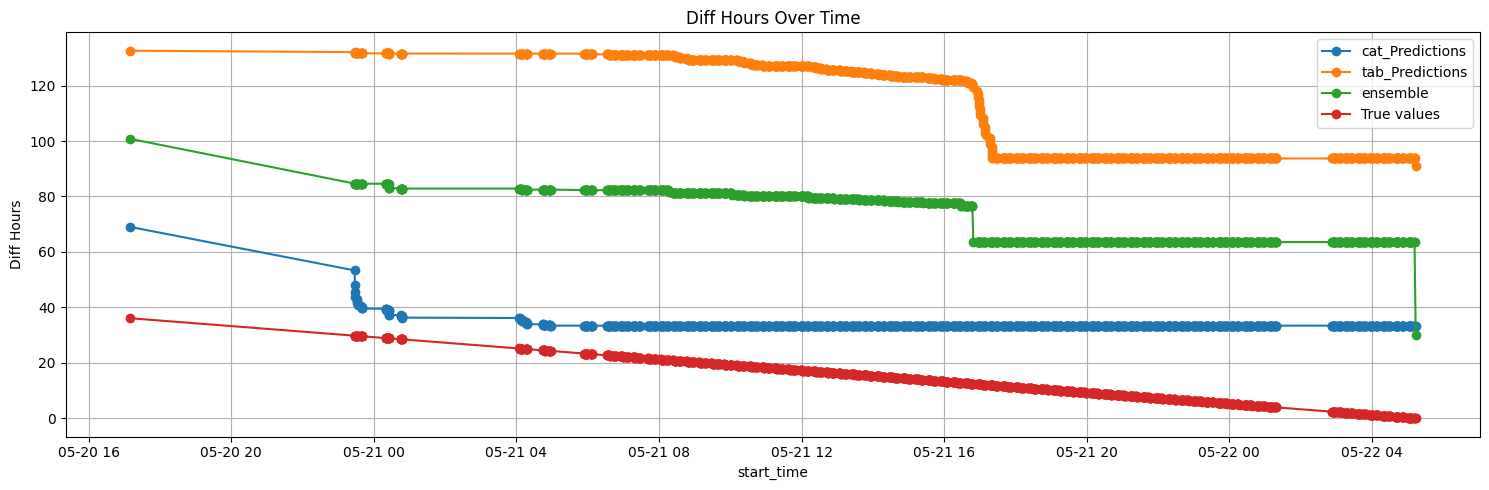

[6,11]
(12640, 33) (12640, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5007.55963| val_0_mse: 3880.49726|  0:00:00s
epoch 1  | loss: 3252.00868| val_0_mse: 1602.78978|  0:00:01s
epoch 2  | loss: 1329.48103| val_0_mse: 726.37974|  0:00:02s
epoch 3  | loss: 358.3383| val_0_mse: 294.96292|  0:00:03s
epoch 4  | loss: 226.0426| val_0_mse: 189.70153|  0:00:04s
epoch 5  | loss: 173.5693| val_0_mse: 128.31547|  0:00:05s
epoch 6  | loss: 129.20951| val_0_mse: 118.89269|  0:00:05s
epoch 7  | loss: 114.28815| val_0_mse: 71.41702|  0:00:07s
epoch 8  | loss: 100.86699| val_0_mse: 64.11991|  0:00:08s
epoch 9  | loss: 89.10237| val_0_mse: 53.68723|  0:00:09s
epoch 10 | loss: 71.81066| val_0_mse: 49.50025|  0:00:10s
epoch 11 | loss: 61.89016| val_0_mse: 52.14425|  0:00:11s
epoch 12 | loss: 53.1512 | val_0_mse: 74.22406|  0:00:12s
epoch 13 | loss: 42.44097| val_0_mse: 25.9776 |  0:00:13s
epoch 14 | loss: 37.5207 | val_0_mse: 36.85233|  0:00:14s
epoch 15 | loss: 34.69859| val_0_mse: 17.14875|  0:00:14s
epoch 16 | loss: 33.11915| val_0_mse: 15.3995 |  0:00:

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
11
(668, 33) (668, 1)
cat_rmse: 42.736095085670094
cat_rmse1: 6.6878169347837835
cat_rmse2: 6.175071141097677
tab_rmse: 49.88270139755886
tab_rmse1: 6.118131998699157
tab_rmse2: 8.87025532539415
ensemble_rmse1: 2.5410988140901836
ensemble_rmse2: 2.9098254514475257


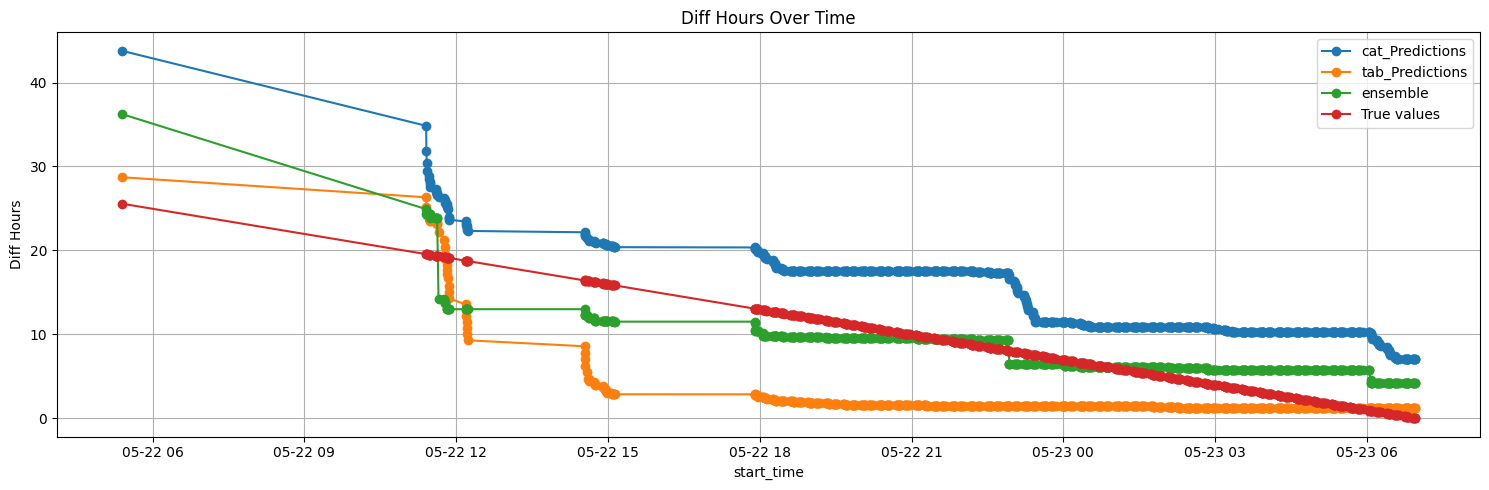

[7,12]
(10050, 33) (10050, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3028.45093| val_0_mse: 2658.26381|  0:00:00s
epoch 1  | loss: 2121.98234| val_0_mse: 1114.9991|  0:00:01s
epoch 2  | loss: 957.38334| val_0_mse: 333.69699|  0:00:02s
epoch 3  | loss: 249.6538| val_0_mse: 434.63016|  0:00:03s
epoch 4  | loss: 109.72783| val_0_mse: 109.06486|  0:00:04s
epoch 5  | loss: 80.92351| val_0_mse: 349.92027|  0:00:05s
epoch 6  | loss: 72.57534| val_0_mse: 61.3278 |  0:00:06s
epoch 7  | loss: 69.20591| val_0_mse: 50.33816|  0:00:06s
epoch 8  | loss: 66.1803 | val_0_mse: 42.84765|  0:00:07s
epoch 9  | loss: 64.34785| val_0_mse: 44.47345|  0:00:07s
epoch 10 | loss: 61.59502| val_0_mse: 43.37741|  0:00:08s
epoch 11 | loss: 59.59282| val_0_mse: 40.49038|  0:00:09s
epoch 12 | loss: 56.88116| val_0_mse: 58.86389|  0:00:09s
epoch 13 | loss: 60.93329| val_0_mse: 45.62485|  0:00:10s
epoch 14 | loss: 55.08926| val_0_mse: 40.00408|  0:00:11s
epoch 15 | loss: 58.61595| val_0_mse: 47.17166|  0:00:11s
epoch 16 | loss: 53.58225| val_0_mse: 44.10765|  0:00:12s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
12
(5242, 33) (5242, 1)
cat_rmse: 4560.040078352366
cat_rmse1: 57.84974353820846
cat_rmse2: 90.615638548913
tab_rmse: 6119.214463125808
tab_rmse1: 68.6124474407826
tab_rmse2: 101.81567292720867
ensemble_rmse1: 63.1433720942907
ensemble_rmse2: 96.15837544444649


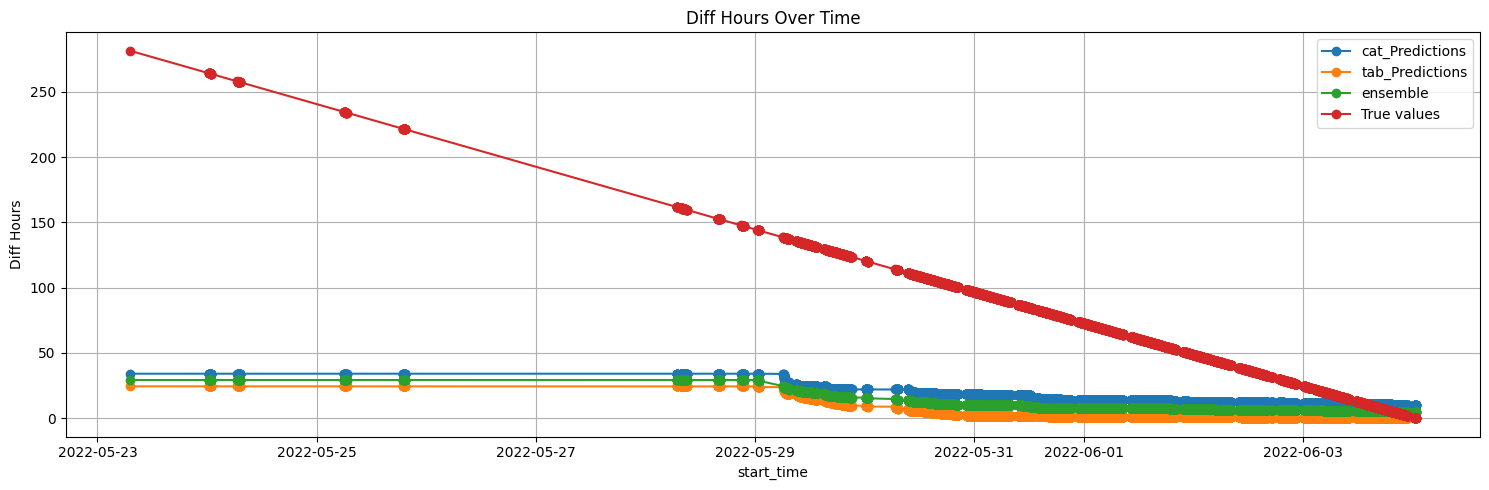

[8,13]
(15226, 33) (15226, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3956.3035| val_0_mse: 2786.63419|  0:00:01s
epoch 1  | loss: 2183.72942| val_0_mse: 853.78698|  0:00:02s
epoch 2  | loss: 659.34303| val_0_mse: 472.27238|  0:00:03s
epoch 3  | loss: 211.54612| val_0_mse: 184.98128|  0:00:04s
epoch 4  | loss: 130.06664| val_0_mse: 79.22391|  0:00:05s
epoch 5  | loss: 94.58782| val_0_mse: 56.15779|  0:00:06s
epoch 6  | loss: 89.83906| val_0_mse: 55.44996|  0:00:07s
epoch 7  | loss: 81.79107| val_0_mse: 57.57917|  0:00:08s
epoch 8  | loss: 78.69937| val_0_mse: 49.84286|  0:00:09s
epoch 9  | loss: 67.26398| val_0_mse: 38.35632|  0:00:10s
epoch 10 | loss: 71.3509 | val_0_mse: 37.08083|  0:00:12s
epoch 11 | loss: 62.14297| val_0_mse: 48.52176|  0:00:13s
epoch 12 | loss: 52.74917| val_0_mse: 39.35813|  0:00:14s
epoch 13 | loss: 47.86038| val_0_mse: 54.39386|  0:00:15s
epoch 14 | loss: 46.81619| val_0_mse: 56.7099 |  0:00:16s
epoch 15 | loss: 40.42351| val_0_mse: 45.17943|  0:00:17s
epoch 16 | loss: 38.78848| val_0_mse: 36.12642|  0:00:18s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
13
(1328, 33) (1328, 1)
cat_rmse: 218.7017097551936
cat_rmse1: 12.72645152290063
cat_rmse2: 20.839337282967705
tab_rmse: 462.01442892878083
tab_rmse1: 16.780372036762213
tab_rmse2: 33.875634919157015
ensemble_rmse1: 11.269950093137728
ensemble_rmse2: 26.26876706299424


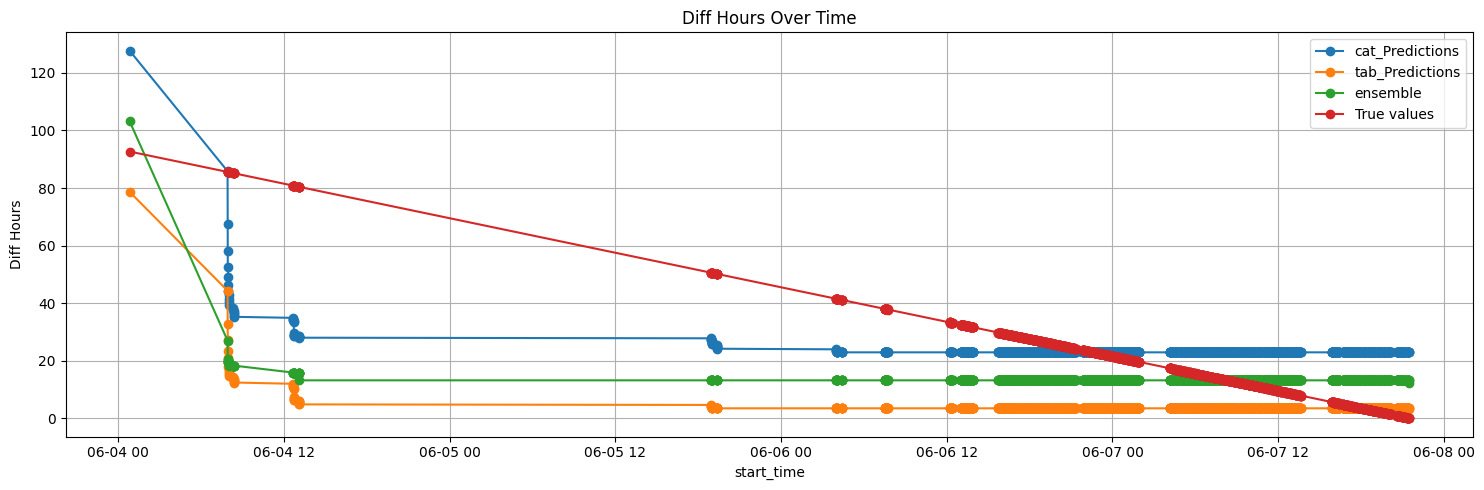

[9,14]
(15957, 33) (15957, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3854.70502| val_0_mse: 2952.73561|  0:00:01s
epoch 1  | loss: 2147.19269| val_0_mse: 716.76689|  0:00:02s
epoch 2  | loss: 521.10726| val_0_mse: 409.86644|  0:00:03s
epoch 3  | loss: 166.28924| val_0_mse: 92.30697|  0:00:04s
epoch 4  | loss: 109.03431| val_0_mse: 70.54151|  0:00:05s
epoch 5  | loss: 78.16533| val_0_mse: 51.77615|  0:00:06s
epoch 6  | loss: 61.61822| val_0_mse: 28.29666|  0:00:07s
epoch 7  | loss: 49.5936 | val_0_mse: 33.56242|  0:00:08s
epoch 8  | loss: 46.60698| val_0_mse: 16.89164|  0:00:09s
epoch 9  | loss: 36.80437| val_0_mse: 22.5791 |  0:00:10s
epoch 10 | loss: 37.34252| val_0_mse: 17.83116|  0:00:12s
epoch 11 | loss: 32.18562| val_0_mse: 15.0359 |  0:00:13s
epoch 12 | loss: 28.67991| val_0_mse: 21.73627|  0:00:14s
epoch 13 | loss: 26.71698| val_0_mse: 14.13315|  0:00:16s
epoch 14 | loss: 27.93392| val_0_mse: 19.36406|  0:00:17s
epoch 15 | loss: 24.58836| val_0_mse: 21.03075|  0:00:18s
epoch 16 | loss: 31.27001| val_0_mse: 12.20221|  0:00:19s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
14
(622, 33) (622, 1)
cat_rmse: 825.1126281846264
cat_rmse1: 28.617462357175313
cat_rmse2: 29.006517390193057
tab_rmse: 249.487578042295
tab_rmse1: 16.375293305069636
tab_rmse2: 14.147677330472119
ensemble_rmse1: 22.33447519200543
ensemble_rmse2: 21.44829612944466


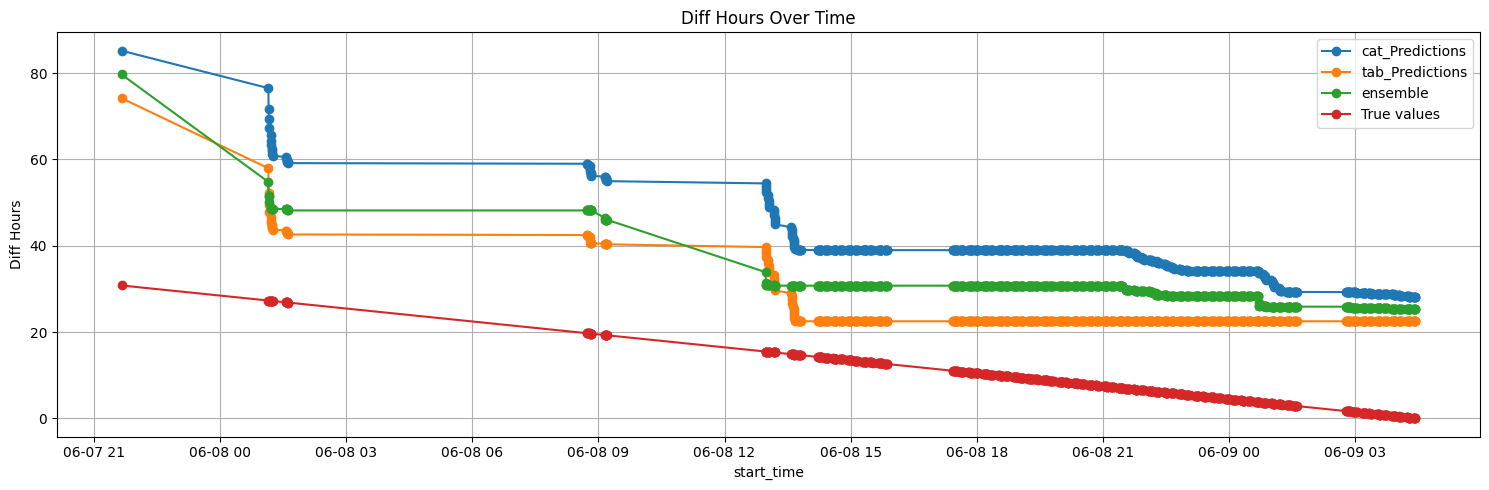

[10,15]
(14600, 33) (14600, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4193.56949| val_0_mse: 3314.85517|  0:00:01s
epoch 1  | loss: 2540.64781| val_0_mse: 840.7328|  0:00:02s
epoch 2  | loss: 801.32511| val_0_mse: 608.08652|  0:00:03s
epoch 3  | loss: 270.12892| val_0_mse: 185.21817|  0:00:04s
epoch 4  | loss: 155.46535| val_0_mse: 137.27485|  0:00:05s
epoch 5  | loss: 114.77801| val_0_mse: 86.13009|  0:00:06s
epoch 6  | loss: 84.71372| val_0_mse: 42.86364|  0:00:07s
epoch 7  | loss: 70.90234| val_0_mse: 34.85853|  0:00:08s
epoch 8  | loss: 65.4694 | val_0_mse: 28.80739|  0:00:09s
epoch 9  | loss: 60.23711| val_0_mse: 50.6796 |  0:00:10s
epoch 10 | loss: 51.84006| val_0_mse: 31.20872|  0:00:11s
epoch 11 | loss: 45.52117| val_0_mse: 41.65114|  0:00:12s
epoch 12 | loss: 43.1509 | val_0_mse: 21.68232|  0:00:13s
epoch 13 | loss: 37.73795| val_0_mse: 14.79928|  0:00:15s
epoch 14 | loss: 39.03357| val_0_mse: 12.24256|  0:00:16s
epoch 15 | loss: 36.44841| val_0_mse: 16.68167|  0:00:17s
epoch 16 | loss: 34.49913| val_0_mse: 15.93971|  0:00:18s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
15
(5195, 33) (5195, 1)
cat_rmse: 5278.122760012324
cat_rmse1: 55.751415414297526
cat_rmse2: 89.01769301023988
tab_rmse: 5401.35336111493
tab_rmse1: 56.00207972617502
tab_rmse2: 90.35204029514416
ensemble_rmse1: 55.87558236862868
ensemble_rmse2: 89.67975589375028


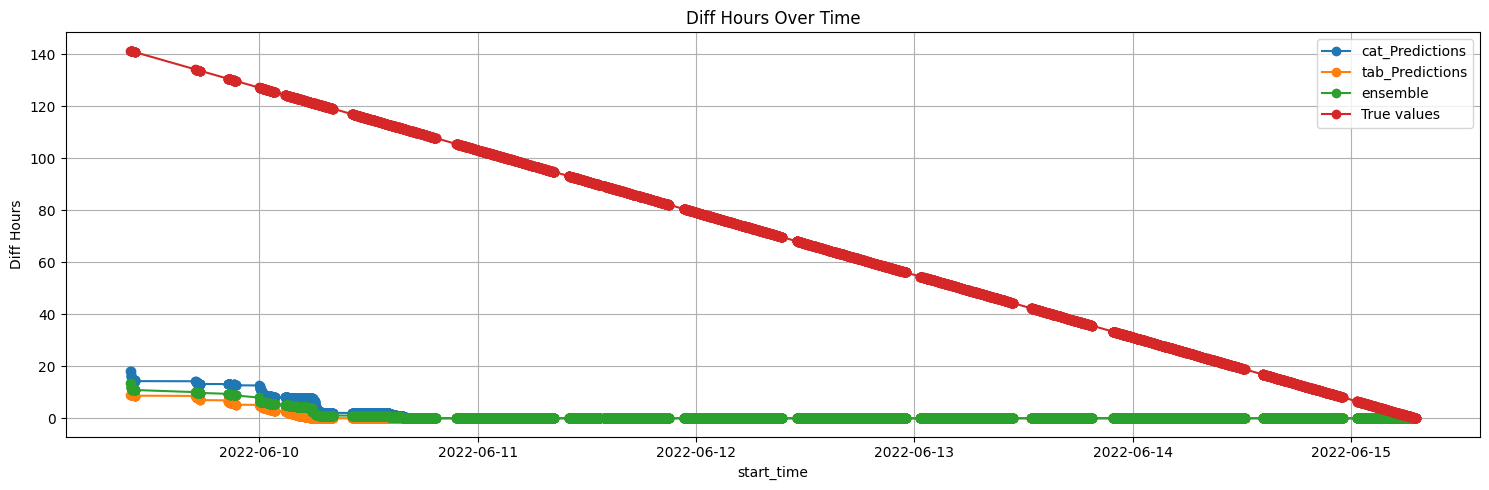

[11,16]
(14117, 33) (14117, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4138.28896| val_0_mse: 3787.76385|  0:00:00s
epoch 1  | loss: 2852.28293| val_0_mse: 1661.77978|  0:00:01s
epoch 2  | loss: 1361.19381| val_0_mse: 752.66228|  0:00:02s
epoch 3  | loss: 580.72977| val_0_mse: 695.64738|  0:00:03s
epoch 4  | loss: 396.1089| val_0_mse: 399.95389|  0:00:04s
epoch 5  | loss: 280.2991| val_0_mse: 373.56257|  0:00:05s
epoch 6  | loss: 237.87924| val_0_mse: 203.29518|  0:00:06s
epoch 7  | loss: 179.69073| val_0_mse: 132.09801|  0:00:07s
epoch 8  | loss: 144.78107| val_0_mse: 107.39348|  0:00:08s
epoch 9  | loss: 128.56625| val_0_mse: 70.10031|  0:00:09s
epoch 10 | loss: 91.6689 | val_0_mse: 61.5925 |  0:00:11s
epoch 11 | loss: 118.27274| val_0_mse: 51.17339|  0:00:12s
epoch 12 | loss: 75.29995| val_0_mse: 53.58795|  0:00:13s
epoch 13 | loss: 73.37748| val_0_mse: 40.39181|  0:00:14s
epoch 14 | loss: 64.35182| val_0_mse: 29.55744|  0:00:15s
epoch 15 | loss: 53.0873 | val_0_mse: 27.49906|  0:00:16s
epoch 16 | loss: 49.08195| val_0_mse: 21.04574|  

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
16
(2348, 33) (2348, 1)
cat_rmse: 310.56801576293407
cat_rmse1: 16.81500492340586
cat_rmse2: 20.162680325161926
tab_rmse: 331.68750661829034
tab_rmse1: 18.382755725249655
tab_rmse2: 17.611686636892898
ensemble_rmse1: 16.866514557390726
ensemble_rmse2: 17.46137784829938


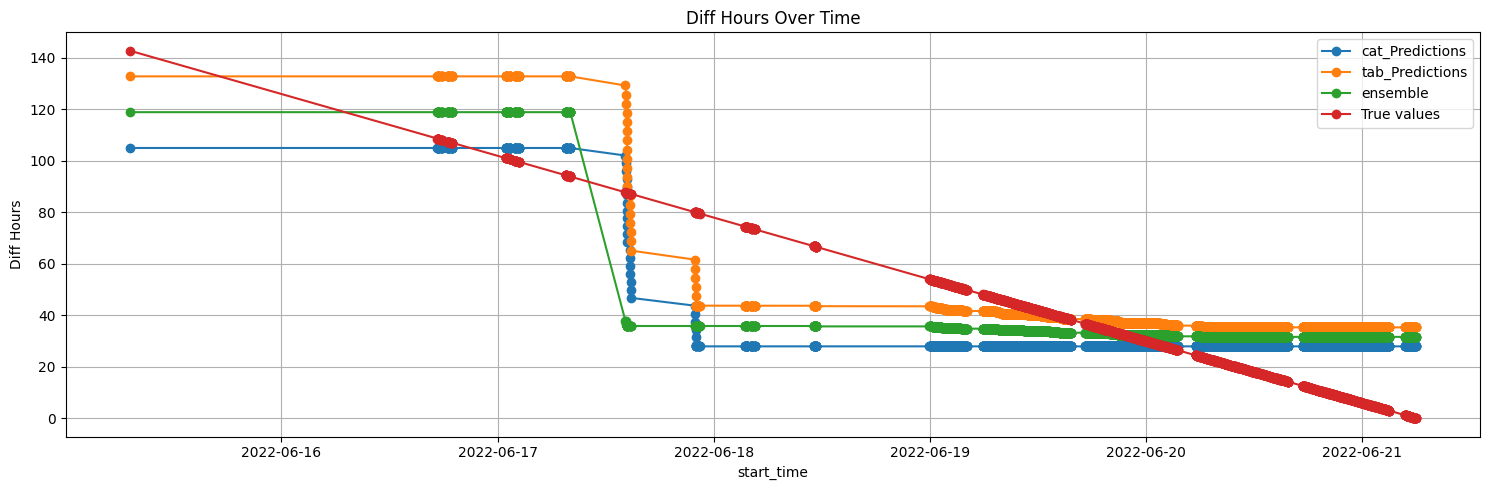

[12,17]
(15403, 33) (15403, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3890.0292| val_0_mse: 3255.88147|  0:00:01s
epoch 1  | loss: 2455.53909| val_0_mse: 1397.25703|  0:00:02s
epoch 2  | loss: 1022.42814| val_0_mse: 1111.40484|  0:00:03s
epoch 3  | loss: 594.41244| val_0_mse: 576.36097|  0:00:04s
epoch 4  | loss: 447.53424| val_0_mse: 527.11701|  0:00:05s
epoch 5  | loss: 343.24113| val_0_mse: 282.49389|  0:00:06s
epoch 6  | loss: 254.96632| val_0_mse: 164.41094|  0:00:07s
epoch 7  | loss: 210.97855| val_0_mse: 131.42995|  0:00:08s
epoch 8  | loss: 172.7149| val_0_mse: 603.20058|  0:00:09s
epoch 9  | loss: 149.78515| val_0_mse: 123.16839|  0:00:11s
epoch 10 | loss: 155.74055| val_0_mse: 110.72328|  0:00:12s
epoch 11 | loss: 119.00116| val_0_mse: 68.65149|  0:00:13s
epoch 12 | loss: 109.10304| val_0_mse: 64.6602 |  0:00:14s
epoch 13 | loss: 82.57802| val_0_mse: 31.27516|  0:00:15s
epoch 14 | loss: 81.8273 | val_0_mse: 46.00397|  0:00:17s
epoch 15 | loss: 75.91073| val_0_mse: 41.77975|  0:00:18s
epoch 16 | loss: 62.77071| val_0_mse: 31.745

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
17
(199, 33) (199, 1)
cat_rmse: 2716.3188753962063
cat_rmse1: 51.55726920668152
cat_rmse2: 53.508229541992655
tab_rmse: 9.973454173764408
tab_rmse1: 3.0645144065290553
tab_rmse2: 3.382739564604677
ensemble_rmse1: 27.027182005546674
ensemble_rmse2: 27.1961723069671


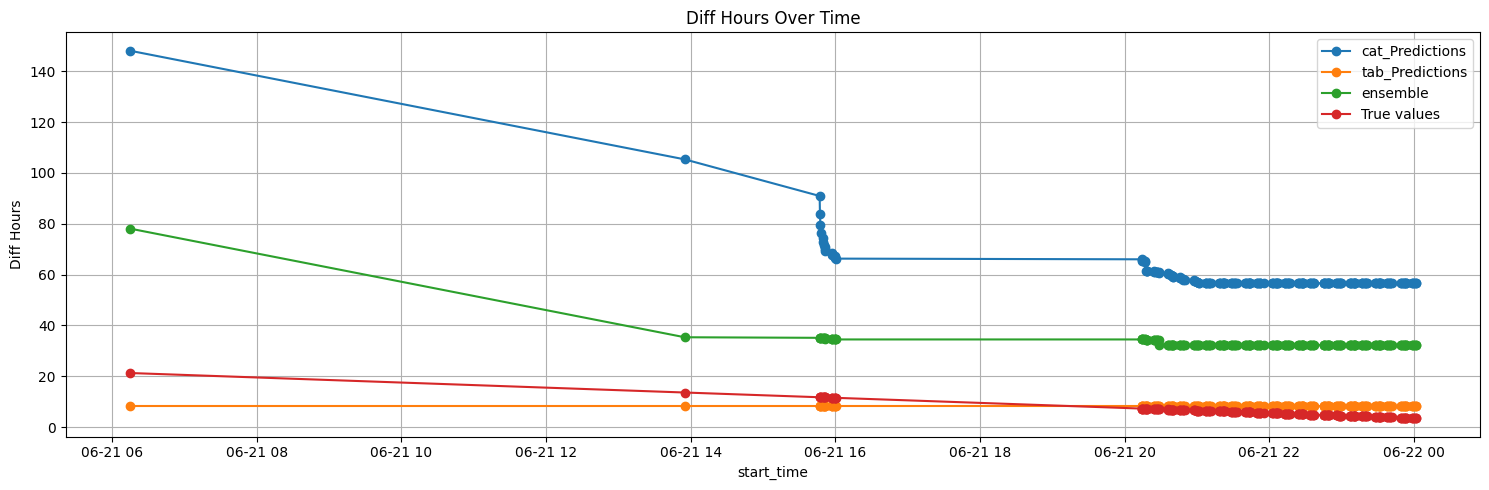

[13,18]
(14934, 33) (14934, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4002.1633| val_0_mse: 3206.84915|  0:00:01s
epoch 1  | loss: 2461.50037| val_0_mse: 1364.46308|  0:00:02s
epoch 2  | loss: 1072.65347| val_0_mse: 738.25738|  0:00:03s
epoch 3  | loss: 604.78049| val_0_mse: 477.31515|  0:00:04s
epoch 4  | loss: 445.59641| val_0_mse: 331.06151|  0:00:05s
epoch 5  | loss: 339.96558| val_0_mse: 244.03738|  0:00:06s
epoch 6  | loss: 254.85525| val_0_mse: 236.92544|  0:00:07s
epoch 7  | loss: 231.29115| val_0_mse: 113.43625|  0:00:08s
epoch 8  | loss: 182.57951| val_0_mse: 107.49891|  0:00:09s
epoch 9  | loss: 149.11119| val_0_mse: 79.14453|  0:00:10s
epoch 10 | loss: 146.93501| val_0_mse: 104.67057|  0:00:12s
epoch 11 | loss: 115.90295| val_0_mse: 74.2863 |  0:00:13s
epoch 12 | loss: 99.02075| val_0_mse: 57.8925 |  0:00:14s
epoch 13 | loss: 89.4314 | val_0_mse: 49.61499|  0:00:15s
epoch 14 | loss: 75.74497| val_0_mse: 36.88252|  0:00:16s
epoch 15 | loss: 77.73173| val_0_mse: 45.72849|  0:00:17s
epoch 16 | loss: 61.18526| val_0_mse: 41.86299

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
18
(267, 33) (267, 1)
cat_rmse: 3.228424010214242
cat_rmse1: 1.5962123271172872
cat_rmse2: 1.975513909660294
tab_rmse: 7.47468695848813
tab_rmse1: 3.4872757388644575
tab_rmse2: 1.6827535249999175
ensemble_rmse1: 2.4458875911950346
ensemble_rmse2: 1.5649157380518894


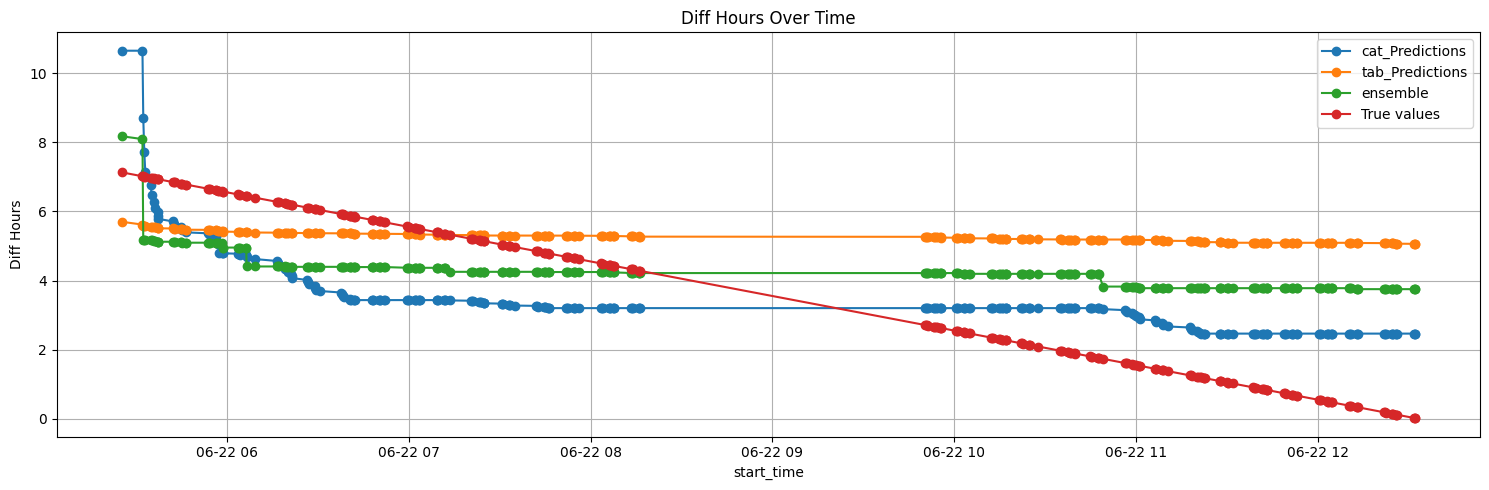

[14,19]
(9959, 33) (9959, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2937.68009| val_0_mse: 2624.76985|  0:00:00s
epoch 1  | loss: 2224.11417| val_0_mse: 1818.60068|  0:00:01s
epoch 2  | loss: 1499.59055| val_0_mse: 1065.75501|  0:00:01s
epoch 3  | loss: 885.46453| val_0_mse: 736.76219|  0:00:02s
epoch 4  | loss: 654.07521| val_0_mse: 576.80462|  0:00:03s
epoch 5  | loss: 563.40211| val_0_mse: 536.54067|  0:00:04s
epoch 6  | loss: 449.03843| val_0_mse: 391.2599|  0:00:05s
epoch 7  | loss: 358.44773| val_0_mse: 300.97486|  0:00:06s
epoch 8  | loss: 307.46217| val_0_mse: 249.5254|  0:00:06s
epoch 9  | loss: 214.99935| val_0_mse: 306.13333|  0:00:07s
epoch 10 | loss: 174.39817| val_0_mse: 133.50442|  0:00:08s
epoch 11 | loss: 123.11414| val_0_mse: 94.82452|  0:00:09s
epoch 12 | loss: 125.52084| val_0_mse: 96.54775|  0:00:09s
epoch 13 | loss: 94.82932| val_0_mse: 62.49257|  0:00:10s
epoch 14 | loss: 99.51685| val_0_mse: 128.11059|  0:00:10s
epoch 15 | loss: 82.70423| val_0_mse: 51.77704|  0:00:11s
epoch 16 | loss: 74.08903| val_0_mse: 91.26

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
19
(3443, 33) (3443, 1)
cat_rmse: 300.28764275428387
cat_rmse1: 15.649065373870203
cat_rmse2: 19.972903099440618
tab_rmse: 998.5819044711195
tab_rmse1: 24.04675415560576
tab_rmse2: 41.796955107766706
ensemble_rmse1: 17.943325003212163
ensemble_rmse2: 30.57741345388339


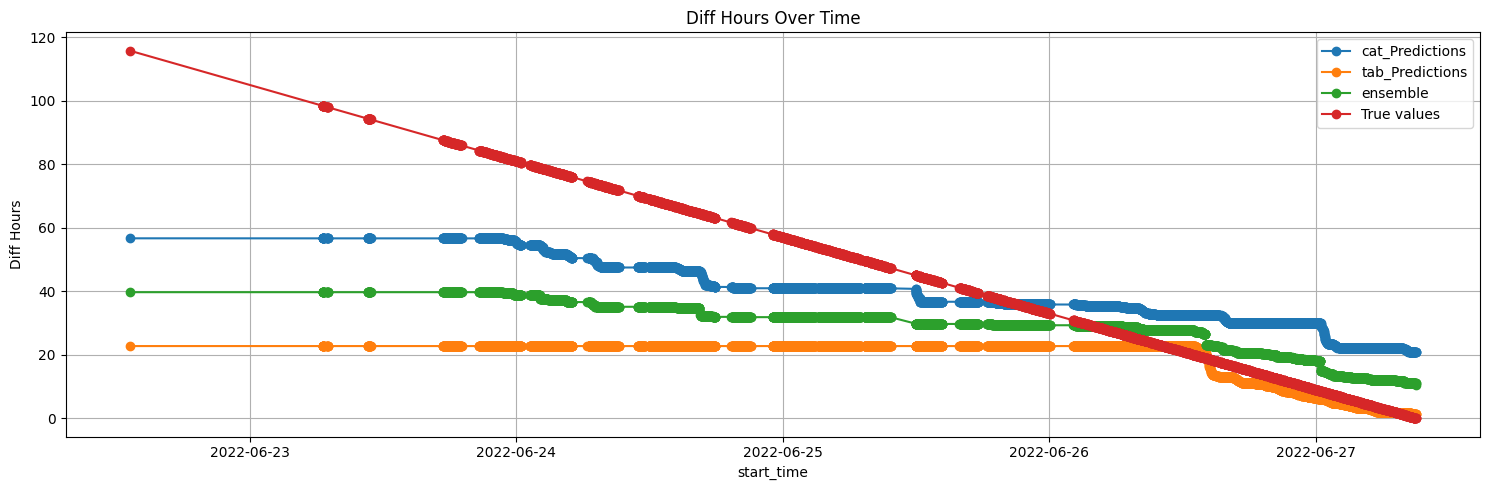

[15,20]
(12074, 33) (12074, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2872.85193| val_0_mse: 2413.72528|  0:00:00s
epoch 1  | loss: 1960.22703| val_0_mse: 1395.00472|  0:00:01s
epoch 2  | loss: 1078.69448| val_0_mse: 697.22545|  0:00:02s
epoch 3  | loss: 580.52346| val_0_mse: 679.03855|  0:00:03s
epoch 4  | loss: 478.15255| val_0_mse: 420.11609|  0:00:03s
epoch 5  | loss: 385.16286| val_0_mse: 332.9645|  0:00:04s
epoch 6  | loss: 325.29453| val_0_mse: 279.61739|  0:00:05s
epoch 7  | loss: 274.23752| val_0_mse: 196.2002|  0:00:06s
epoch 8  | loss: 193.70859| val_0_mse: 120.91209|  0:00:07s
epoch 9  | loss: 158.80682| val_0_mse: 225.46182|  0:00:08s
epoch 10 | loss: 127.6252| val_0_mse: 54.11115|  0:00:09s
epoch 11 | loss: 79.28528| val_0_mse: 47.53853|  0:00:10s
epoch 12 | loss: 75.48795| val_0_mse: 42.89375|  0:00:11s
epoch 13 | loss: 40.0399 | val_0_mse: 24.04999|  0:00:12s
epoch 14 | loss: 39.09451| val_0_mse: 31.8643 |  0:00:13s
epoch 15 | loss: 35.87683| val_0_mse: 31.47984|  0:00:14s
epoch 16 | loss: 37.32114| val_0_mse: 15.27055|  

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
20
(3117, 33) (3117, 1)
cat_rmse: 3042.4522205277744
cat_rmse1: 43.00600567684103
cat_rmse2: 65.40278796124235
tab_rmse: 3044.654371581784
tab_rmse1: 42.34912589968079
tab_rmse2: 65.87909569528449
ensemble_rmse1: 42.66868811625048
ensemble_rmse2: 65.62442884526614


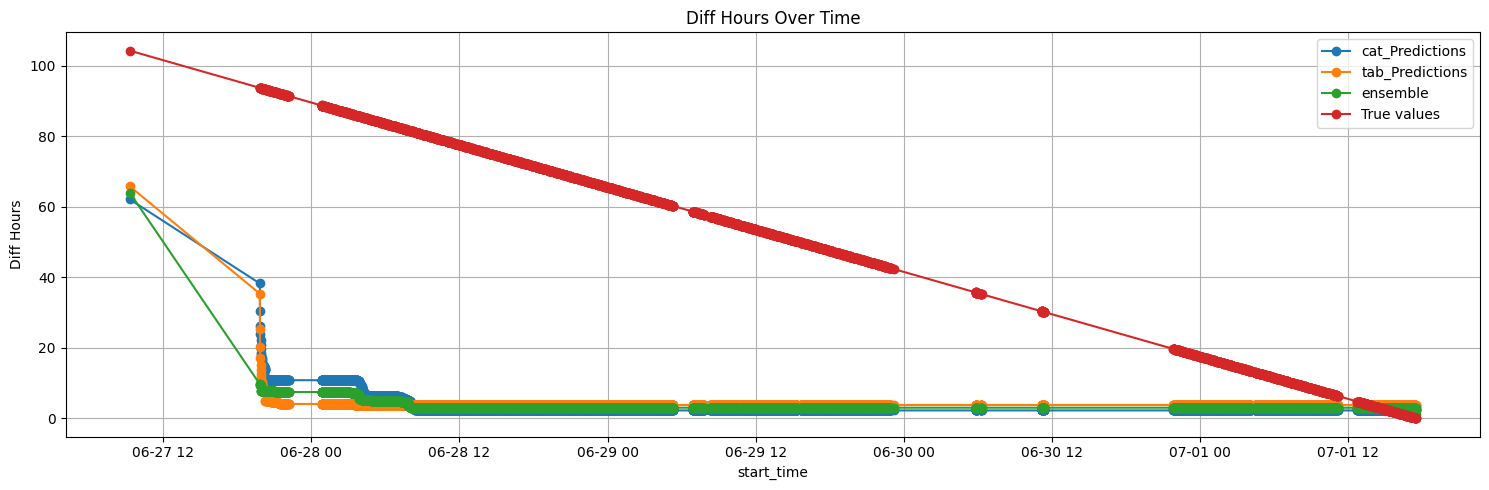

[16,21]
(14569, 33) (14569, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2855.56402| val_0_mse: 1957.87001|  0:00:00s
epoch 1  | loss: 1468.8699| val_0_mse: 599.70134|  0:00:01s
epoch 2  | loss: 408.85847| val_0_mse: 279.09974|  0:00:02s
epoch 3  | loss: 171.12389| val_0_mse: 94.59253|  0:00:03s
epoch 4  | loss: 76.56811| val_0_mse: 46.92427|  0:00:04s
epoch 5  | loss: 47.96801| val_0_mse: 34.71768|  0:00:05s
epoch 6  | loss: 38.75109| val_0_mse: 23.67074|  0:00:06s
epoch 7  | loss: 35.94935| val_0_mse: 22.16791|  0:00:08s
epoch 8  | loss: 29.29232| val_0_mse: 15.43371|  0:00:09s
epoch 9  | loss: 25.18763| val_0_mse: 9.19265 |  0:00:10s
epoch 10 | loss: 20.66717| val_0_mse: 9.39755 |  0:00:11s
epoch 11 | loss: 19.51069| val_0_mse: 10.7088 |  0:00:12s
epoch 12 | loss: 17.10385| val_0_mse: 7.7994  |  0:00:13s
epoch 13 | loss: 16.39722| val_0_mse: 10.13034|  0:00:14s
epoch 14 | loss: 14.13511| val_0_mse: 15.40232|  0:00:15s
epoch 15 | loss: 16.00826| val_0_mse: 6.3234  |  0:00:16s
epoch 16 | loss: 13.56588| val_0_mse: 4.8385  |  0:00:17s
epoch

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
21
(1, 33) (1, 1)
[17,22]
(9375, 33) (9375, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2088.86635| val_0_mse: 1869.75083|  0:00:00s
epoch 1  | loss: 1411.42333| val_0_mse: 862.5839|  0:00:01s
epoch 2  | loss: 712.38005| val_0_mse: 373.89116|  0:00:02s
epoch 3  | loss: 247.89666| val_0_mse: 182.82806|  0:00:03s
epoch 4  | loss: 104.11467| val_0_mse: 62.57557|  0:00:04s
epoch 5  | loss: 54.94291| val_0_mse: 97.21291|  0:00:05s
epoch 6  | loss: 34.09513| val_0_mse: 17.06673|  0:00:05s
epoch 7  | loss: 24.86734| val_0_mse: 24.77684|  0:00:06s
epoch 8  | loss: 24.75379| val_0_mse: 15.78733|  0:00:06s
epoch 9  | loss: 19.56828| val_0_mse: 18.32378|  0:00:07s
epoch 10 | loss: 19.25574| val_0_mse: 8.53392 |  0:00:08s
epoch 11 | loss: 16.71355| val_0_mse: 12.75264|  0:00:08s
epoch 12 | loss: 14.89413| val_0_mse: 9.99555 |  0:00:09s
epoch 13 | loss: 15.46102| val_0_mse: 9.47447 |  0:00:10s
epoch 14 | loss: 13.60121| val_0_mse: 8.99235 |  0:00:10s
epoch 15 | loss: 13.50629| val_0_mse: 28.21025|  0:00:11s
epoch 16 | loss: 12.2439 | val_0_mse: 7.09856 |  0:00:11s
epo

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab train finish
22
(340, 33) (340, 1)
cat_rmse: 90.0140278014726
cat_rmse1: 9.329046652461106
cat_rmse2: 9.744995632478085
tab_rmse: 22.819404612381987
tab_rmse1: 3.673125951972592
tab_rmse2: 6.188768728793205
ensemble_rmse1: 3.4078449974260323
ensemble_rmse2: 2.2492065639962147


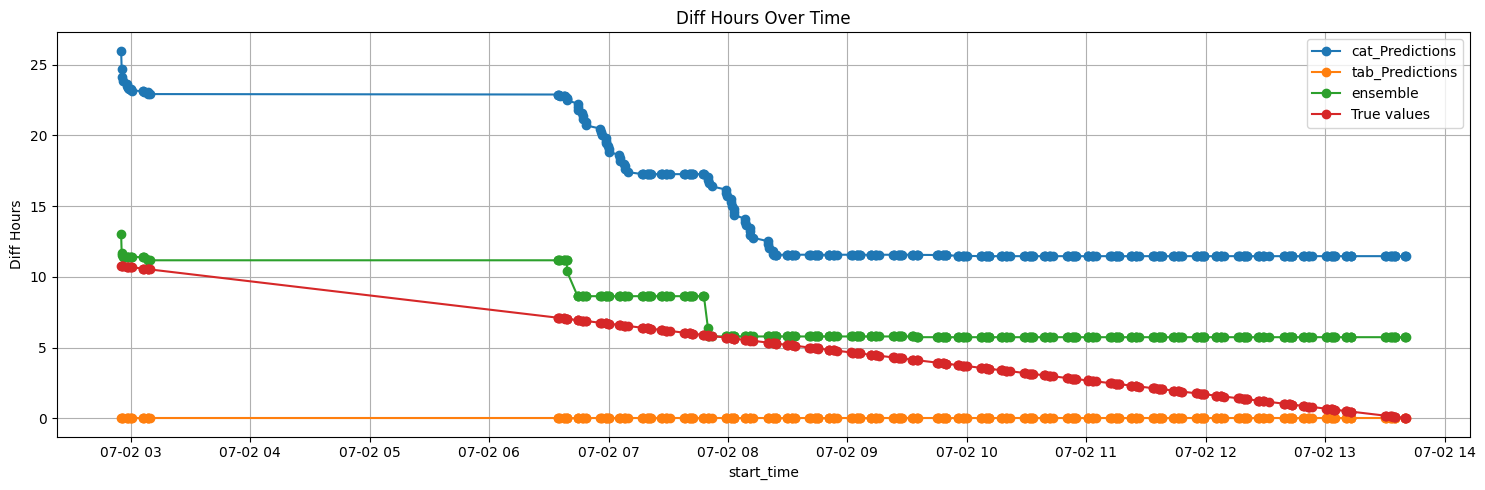

[18,23]
(7367, 33) (7367, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2353.58199| val_0_mse: 2236.27744|  0:00:00s
epoch 1  | loss: 1900.15421| val_0_mse: 1637.41741|  0:00:01s
epoch 2  | loss: 1348.30574| val_0_mse: 917.39526|  0:00:01s
epoch 3  | loss: 833.81536| val_0_mse: 594.3143|  0:00:02s
epoch 4  | loss: 444.10401| val_0_mse: 350.77596|  0:00:03s
epoch 5  | loss: 275.74472| val_0_mse: 218.20983|  0:00:04s
epoch 6  | loss: 180.65179| val_0_mse: 134.59157|  0:00:04s
epoch 7  | loss: 110.29791| val_0_mse: 95.44516|  0:00:05s
epoch 8  | loss: 72.8984 | val_0_mse: 157.2917|  0:00:06s
epoch 9  | loss: 47.66952| val_0_mse: 72.0374 |  0:00:06s
epoch 10 | loss: 34.20793| val_0_mse: 13.70239|  0:00:07s
epoch 11 | loss: 20.02711| val_0_mse: 24.8812 |  0:00:07s
epoch 12 | loss: 17.13558| val_0_mse: 13.17719|  0:00:08s
epoch 13 | loss: 18.24532| val_0_mse: 9.28212 |  0:00:08s
epoch 14 | loss: 18.52683| val_0_mse: 24.10963|  0:00:09s
epoch 15 | loss: 17.58793| val_0_mse: 6.43458 |  0:00:09s
epoch 16 | loss: 11.21673| val_0_mse: 6.16072 |  0:00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


tab_rmse: 495.9270048029538
tab_rmse1: 20.938730107630196
tab_rmse2: 22.84840718258286
ensemble_rmse1: 6.601186960664173
ensemble_rmse2: 6.7758373113651915


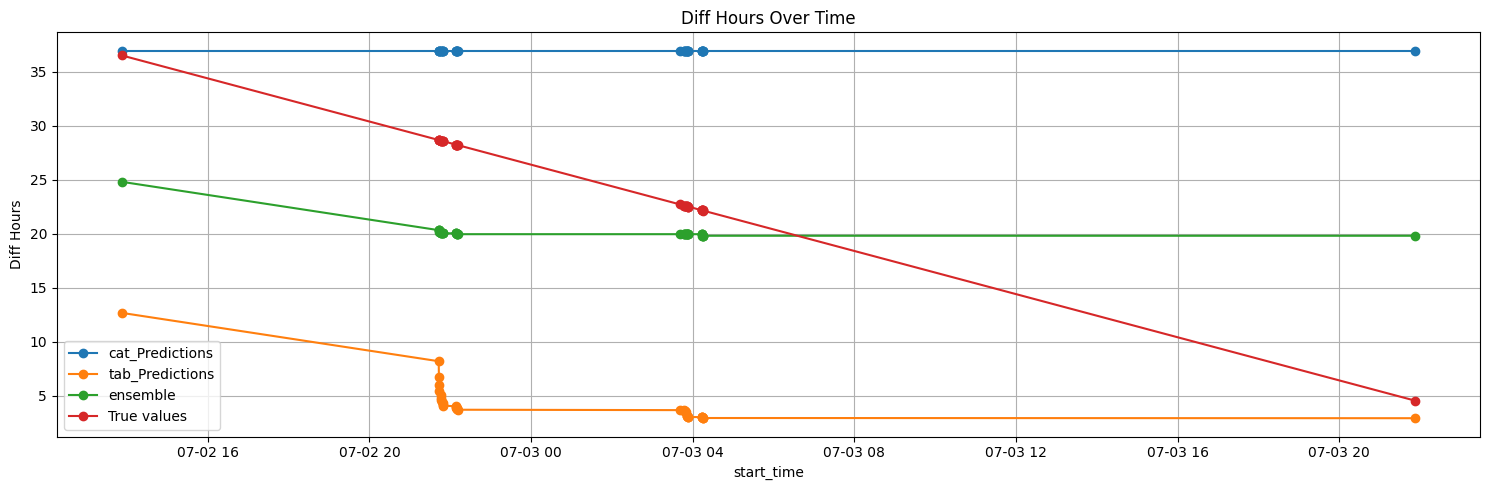

[19,24]
(7207, 33) (7207, 1)
cat train start
cat train finish
tab train start


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2411.59719| val_0_mse: 2330.7764|  0:00:00s
epoch 1  | loss: 1964.96128| val_0_mse: 1758.07593|  0:00:01s
epoch 2  | loss: 1443.51326| val_0_mse: 996.55444|  0:00:01s
epoch 3  | loss: 849.4506| val_0_mse: 577.1152|  0:00:02s
epoch 4  | loss: 434.87969| val_0_mse: 336.64491|  0:00:03s
epoch 5  | loss: 251.9292| val_0_mse: 163.20578|  0:00:03s
epoch 6  | loss: 154.06332| val_0_mse: 151.707 |  0:00:04s
epoch 7  | loss: 110.31705| val_0_mse: 119.07866|  0:00:05s
epoch 8  | loss: 74.67441| val_0_mse: 82.54671|  0:00:06s
epoch 9  | loss: 63.26725| val_0_mse: 60.50121|  0:00:06s
epoch 10 | loss: 55.52581| val_0_mse: 41.73093|  0:00:07s
epoch 11 | loss: 39.00093| val_0_mse: 21.69531|  0:00:07s
epoch 12 | loss: 31.67332| val_0_mse: 23.16112|  0:00:08s
epoch 13 | loss: 31.5964 | val_0_mse: 36.97327|  0:00:08s
epoch 14 | loss: 25.29559| val_0_mse: 18.54513|  0:00:09s
epoch 15 | loss: 21.90493| val_0_mse: 24.28634|  0:00:09s
epoch 16 | loss: 23.66925| val_0_mse: 14.09893|  0:00:10

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

params = {'border_count': 8,
 'depth': 10,
 'learning_rate': 0.01,
 'l2_leaf_reg': 9,
 'iterations': 6000}

params_tab = {
    'n_d': 10,
    'n_a': 10,
    'n_steps': 3,
    'gamma': 1.3,
    'cat_dims': [],  # 범주형 변수가 없음을 나타냄
    'cat_emb_dim': 1,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': "entmax",
    'scheduler_params': dict(mode="min",
                             patience=5,
                             min_lr=1e-5,
                             factor=0.9,),
    'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
    'verbose': 1
}

def ml_model(train_size):
    X, y = xy_split(df)
    for x in range(X['TA_tm_before'].nunique() - 1):
        scaler = StandardScaler()
        k = x - train_size
        if k <= 0:
            k = 0
        print(f'[{k},{x}]')
        X_Train = X.loc[X[X['TA_tm_before'] == X['TA_tm_before'].unique()[k]].head(1).index.item():X[X['TA_tm_before'] == X['TA_tm_before'].unique()[x]].tail(1).index.item(), :]
        train_drop = X_Train[drop_col]
        X_Train = X_Train.drop(columns=drop_col)
        X_Train[standard_li] = scaler.fit_transform(X_Train[standard_li])
        Y_Train = y[y.index.isin(X_Train.index)]
        X_Train.reset_index(drop=True, inplace=True)
        Y_Train.reset_index(drop=True, inplace=True)
        print(X_Train.shape, Y_Train.shape)
        if len(X_Train) > 1:
            cat_f = CatBoostRegressor(**params)
            print('cat train start')
            cat_f.fit(X_Train, Y_Train, verbose=0)
            print('cat train finish')
            print('tab train start')
            model = TabNetRegressor(**params_tab)
            model.fit(
                X_Train.values,
                Y_Train.values,
                eval_set=[(X_Train.values, Y_Train.values)],
                eval_metric=['mse'],
                max_epochs=300,
                patience=20,
                batch_size=1024,
                virtual_batch_size=128,
                num_workers=0,
                drop_last=False,
                from_unsupervised=None,
            )
            print('tab train finish')

        print(x)
        X_Test = X[X['TA_tm_before'] == X['TA_tm_before'].unique()[x + 1]]
        test_drop = X_Test[drop_col]
        X_Test = X_Test.drop(columns=drop_col)
        test_drop.reset_index(drop=True, inplace=True)
        X_Test[standard_li] = scaler.transform(X_Test[standard_li])
        Y_Test = y[y.index.isin(X_Test.index)]

        X_Test.reset_index(drop=True, inplace=True)
        Y_Test.reset_index(drop=True, inplace=True)
        print(X_Test.shape, Y_Test.shape)
        if len(X_Test) > 25:
            catf_pred = cat_f.predict(X_Test)
            Y_Test_series = Y_Test['diff_hours']
            catf_pred_series = pd.Series(catf_pred)
            for i in range(0, len(catf_pred_series) - 1):
                if catf_pred_series[i + 1] > catf_pred_series[i]:
                    catf_pred_series[i + 1] = catf_pred_series[i]
            catf_pred_series[catf_pred_series < 0] = 0
            catf_rmse1 = mm_adj_rmse(Y_Test_series, catf_pred_series)
            catf_rmse2 = mm_adj_rmse2(Y_Test_series, catf_pred_series)
            catf_rmse = mean_squared_error(Y_Test_series, catf_pred_series)

            print('cat_rmse:', catf_rmse)
            print('cat_rmse1:', catf_rmse1)
            print('cat_rmse2:', catf_rmse2)
            tab_pred = model.predict(X_Test.values)
            Y_Test_series = Y_Test['diff_hours']
            tab_pred_series = pd.Series(tab_pred.flatten())
            for i in range(0, len(tab_pred_series) - 1):
                if tab_pred_series[i + 1] > tab_pred_series[i]:
                    tab_pred_series[i + 1] = tab_pred_series[i]
            tab_pred_series[tab_pred_series < 0] = 0
            tab_rmse1 = mm_adj_rmse(Y_Test_series, tab_pred_series)
            tab_rmse2 = mm_adj_rmse2(Y_Test_series, tab_pred_series)
            tab_rmse = mean_squared_error(Y_Test_series, tab_pred_series)

            # final_pred_series should be initialized correctly
            final_pred_series = (catf_pred_series + tab_pred_series) / 2
            final_pred_series = pd.Series(final_pred_series)
            final_pred_series[final_pred_series < 0] = 0
            ml_ensemble_rmse1 = mm_adj_rmse(Y_Test_series, final_pred_series)
            ml_ensemble_rmse2 = mm_adj_rmse2(Y_Test_series, final_pred_series)

            print('tab_rmse:', tab_rmse)
            print('tab_rmse1:', tab_rmse1)
            print('tab_rmse2:', tab_rmse2)
            print('ensemble_rmse1:', ml_ensemble_rmse1)
            print('ensemble_rmse2:', ml_ensemble_rmse2)

            test_drop['start_dt_tm'] = pd.to_datetime(test_drop['start_dt_tm'])
            test_drop.sort_values('start_dt_tm', inplace=True)
            plt.figure(figsize=(15, 5))
            catf_pred_series = catf_pred_series.rolling(window=25, min_periods=1).mean()
            tab_pred_series = tab_pred_series.rolling(window=25, min_periods=1).mean()
            plt.plot(test_drop.loc[:, 'start_dt_tm'], catf_pred_series[:], marker='o', linestyle='-', label='cat_Predictions')
            plt.plot(test_drop.loc[:, 'start_dt_tm'], tab_pred_series[:], marker='o', linestyle='-', label='tab_Predictions')
            plt.plot(test_drop.loc[:, 'start_dt_tm'], final_pred_series[:], marker='o', linestyle='-', label='ensemble')
            plt.plot(test_drop.loc[:, 'start_dt_tm'], Y_Test_series[:], marker='o', linestyle='-', label='True values')
            plt.title(f'Diff Hours Over Time')
            plt.xlabel('start_time')
            plt.ylabel('Diff Hours')

            plt.grid(True)
            plt.legend()

            plt.tight_layout()
            plt.show()

ml_model(5)
